In [1]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter

In [2]:
# helper to make command to get files

c = 'scp -T -i id_rsa_abba agdmt@hai.uni-bremen.de:"'

for i in range(0, 79):
    c_new = '~/bias/xai_priming/0_' + str(i) + '.csv '
    c += c_new

c = c[:-1]
c += '" /Users/laura/Programming/Projects/xai_priming/data_analysis'

print(c)

scp -T -i id_rsa_abba agdmt@hai.uni-bremen.de:"~/bias/xai_priming/0_0.csv ~/bias/xai_priming/0_1.csv ~/bias/xai_priming/0_2.csv ~/bias/xai_priming/0_3.csv ~/bias/xai_priming/0_4.csv ~/bias/xai_priming/0_5.csv ~/bias/xai_priming/0_6.csv ~/bias/xai_priming/0_7.csv ~/bias/xai_priming/0_8.csv ~/bias/xai_priming/0_9.csv ~/bias/xai_priming/0_10.csv ~/bias/xai_priming/0_11.csv ~/bias/xai_priming/0_12.csv ~/bias/xai_priming/0_13.csv ~/bias/xai_priming/0_14.csv ~/bias/xai_priming/0_15.csv ~/bias/xai_priming/0_16.csv ~/bias/xai_priming/0_17.csv ~/bias/xai_priming/0_18.csv ~/bias/xai_priming/0_19.csv ~/bias/xai_priming/0_20.csv ~/bias/xai_priming/0_21.csv ~/bias/xai_priming/0_22.csv ~/bias/xai_priming/0_23.csv ~/bias/xai_priming/0_24.csv ~/bias/xai_priming/0_25.csv ~/bias/xai_priming/0_26.csv ~/bias/xai_priming/0_27.csv ~/bias/xai_priming/0_28.csv ~/bias/xai_priming/0_29.csv ~/bias/xai_priming/0_30.csv ~/bias/xai_priming/0_31.csv ~/bias/xai_priming/0_32.csv ~/bias/xai_priming/0_33.csv ~/bias/xai_

In [3]:
# helper to make command to get files

c = 'scp -T -i id_rsa_abba agdmt@hai.uni-bremen.de:"'

for i in range(0, 80):
    c_new = '~/bias/xai_priming/1_' + str(i) + '.csv '
    c += c_new

c = c[:-1]
c += '" /Users/laura/Programming/Projects/xai_priming/data_analysis'

print(c)

scp -T -i id_rsa_abba agdmt@hai.uni-bremen.de:"~/bias/xai_priming/1_0.csv ~/bias/xai_priming/1_1.csv ~/bias/xai_priming/1_2.csv ~/bias/xai_priming/1_3.csv ~/bias/xai_priming/1_4.csv ~/bias/xai_priming/1_5.csv ~/bias/xai_priming/1_6.csv ~/bias/xai_priming/1_7.csv ~/bias/xai_priming/1_8.csv ~/bias/xai_priming/1_9.csv ~/bias/xai_priming/1_10.csv ~/bias/xai_priming/1_11.csv ~/bias/xai_priming/1_12.csv ~/bias/xai_priming/1_13.csv ~/bias/xai_priming/1_14.csv ~/bias/xai_priming/1_15.csv ~/bias/xai_priming/1_16.csv ~/bias/xai_priming/1_17.csv ~/bias/xai_priming/1_18.csv ~/bias/xai_priming/1_19.csv ~/bias/xai_priming/1_20.csv ~/bias/xai_priming/1_21.csv ~/bias/xai_priming/1_22.csv ~/bias/xai_priming/1_23.csv ~/bias/xai_priming/1_24.csv ~/bias/xai_priming/1_25.csv ~/bias/xai_priming/1_26.csv ~/bias/xai_priming/1_27.csv ~/bias/xai_priming/1_28.csv ~/bias/xai_priming/1_29.csv ~/bias/xai_priming/1_30.csv ~/bias/xai_priming/1_31.csv ~/bias/xai_priming/1_32.csv ~/bias/xai_priming/1_33.csv ~/bias/xai_

# Read and format data

## Sample DF

Get sample df to check correct decision and AI decision for each task.

In [5]:
df = pd.read_csv("sample_string.csv", index_col = "Index")
df

,Marital status,Application mode,University's position in preferences when applying,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem enrolled,Total exams across all classes in 2nd sem,Curricular units 2nd sem passed,Curricular units 2nd sem grade,Curricular units 2nd sem without exams,Unemployment rate at enrollment,Inflation rate at enrollment,GDP at enrollment,Target,AI prediction
Index,,,,,,,,,,,,,,,,,,,,,
648,Single,Change in course,2,Oral Hygiene,daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Basic Education 3rd Cycle (9th/10th/11th Year)...,Administrative staff,...,8,10,8,13.212500,0,10.8,1.4,1.74,Graduate,Graduate
2781,Single,1st phase—general contingent,1,Basic Education,daytime,Secondary education,Portuguese,2nd cycle of the general high school course,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,6,14,1,11.000000,0,10.8,1.4,1.74,Dropout,Dropout
2883,Married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,6,8,6,11.500000,0,8.9,1.4,3.51,Graduate,Graduate
266,Single,2nd phase—general contingent,4,Nursing,daytime,Secondary education,Portuguese,Higher Education—master’s degree,Secondary Education—12th Year of Schooling or ...,Specialists in Intellectual and Scientific Act...,...,8,8,7,14.828571,0,12.7,3.7,-1.70,Graduate,Graduate
2537,Single,1st phase—general contingent,1,Advertising and Marketing Management,daytime,Secondary education,Portuguese,General commerce course,Basic Education 3rd Cycle (9th/10th/11th Year)...,"Skilled Workers in Industry, Construction, and...",...,6,6,6,15.833333,0,12.4,0.5,1.79,Graduate,Graduate
2791,Single,1st phase—general contingent,1,Veterinary Nursing,daytime,Secondary education,Portuguese,Supplementary Accounting and Administration,Basic Education 3rd Cycle (9th/10th/11th Year)...,Unskilled Workers,...,6,8,6,14.142857,0,11.1,0.6,2.02,Graduate,Graduate
1576,Married,Over 23 years old,2,Advertising and Marketing Management,daytime,Basic education 3rd cycle (9th/10th/11th year)...,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,6,9,4,13.750000,0,12.4,0.5,1.79,Dropout,Dropout
988,Single,1st phase—general contingent,1,Social Service,daytime,Secondary education,Portuguese,Higher Education—bachelor’s degree,Higher Education—bachelor’s degree,Intermediate Level Technicians and Professions,...,6,12,2,10.000000,0,11.1,0.6,2.02,Dropout,Dropout
3232,Single,1st phase—general contingent,2,Journalism and Communication,daytime,Secondary education,Portuguese,General commerce course,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Intermediate Level Technicians and Professions,...,6,6,5,12.600000,0,12.7,3.7,-1.70,Graduate,Graduate


## Participants

**Overview**

There are 2x2 groups:

- w = w (with) explanations
- wo = w/o (without) explanations

and 

- 0 = no priming = participant gets to make a decision, then sees AI suggestion, then makes final decision
- 1 = yes priming = participant sees AI suggestion immediately

makes for the following four prefixes for participants indices: w_0_, w_1_, wo_0_, wo_1_.

**Next: Demographic Data**

Get demographic data from prolific into df, to check id and save total time taken to remove outliers.
If we want, we can also have a look at the demographic distribution, or do some exploratory analysis with this stuff. 

In [6]:
df_demo_wo = pd.read_csv("demo_data_wo.csv", index_col = "Participant id")
df_demo_w = pd.read_csv("demo_data_xai.csv", index_col = "Participant id")
df_demo = pd.concat([df_demo_wo, df_demo_w])
print(df_demo.shape)
df_demo

(300, 18)


,Submission id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
Participant id,,,,,,,,,,,,,,,,,,
642c63f27d35b896cfbc4976,64f78c3a1f128588d084b371,APPROVED,2023-09-05T20:14:59.894000Z,2023-09-05T20:38:33.071000Z,2023-09-06T07:33:44.327000,2023-09-05T20:38:40.316993Z,1414,642c63f27d35b896cfbc4976,92,19,Male,White,Netherlands,Netherlands,Netherlands,Dutch,Yes,Unemployed (and job seeking)
5e6f58ba2649e051077d8988,64f78c41b5cb4da7fe7aa0d3,APPROVED,2023-09-05T20:14:57.310000Z,2023-09-05T20:28:16.362000Z,2023-09-05T20:28:16.965000,2023-09-05T20:28:16.902221Z,800,C13E0WG5,411,37,Male,Mixed,South Africa,South Africa,South Africa,English,DATA_EXPIRED,DATA_EXPIRED
605da94ba47f45380a1c7d57,64f78c41d10237d1e4e3d939,APPROVED,2023-09-05T20:14:57.702000Z,2023-09-05T20:22:06.433000Z,2023-09-05T20:22:07.105000,2023-09-05T20:22:07.037274Z,429,C13E0WG5,232,30,Female,White,Poland,Poland,Poland,Polish,No,Full-Time
603ea08e7dc2aaf9eb6d9225,64f78c540fe28f8105ec57e3,APPROVED,2023-09-05T20:15:16.196000Z,2023-09-05T20:23:46.436000Z,2023-09-05T20:24:04.911000Z,2023-09-05T20:24:15.886731Z,511,C13E0WG5,196,21,Female,White,South Africa,South Africa,South Africa,English,Yes,Part-Time
60f672ca5ca3b52915f16c9d,64f78c54b3d1411f234fe43e,APPROVED,2023-09-05T20:15:16.605000Z,2023-09-05T20:30:30.224000Z,2023-09-05T20:30:31.099000,2023-09-05T20:30:31.031170Z,914,C13E0WG5,70,37,Female,Black,South Africa,South Africa,South Africa,English,DATA_EXPIRED,DATA_EXPIRED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5f1398cfb075423b3da590ce,64ff7d9c0599765e89854922,APPROVED,2023-09-11T20:50:40.802000Z,2023-09-11T21:04:50.186000Z,2023-09-11T21:04:50.883000,2023-09-11T21:04:50.815876Z,850,C13E0WG5,26,21,Male,White,Mexico,Mexico,Mexico,Spanish,Yes,Part-Time
64ecd34cb2a8b9bef9c78e6e,64ff7da3a2a075ec5fef6d08,APPROVED,2023-09-11T20:51:23.685000Z,2023-09-11T21:13:00.615000Z,2023-09-11T21:13:01.617000,2023-09-11T21:13:01.538351Z,1297,C13E0WG5,2,31,Male,White,Portugal,Portugal,Portugal,Portuguese,Yes,Full-Time
5ee24db25079946d034e6a37,64ff7f328b56869d058fbb9c,APPROVED,2023-09-11T20:57:22.614000Z,2023-09-11T21:07:40.564000Z,2023-09-11T21:07:41.526000,2023-09-11T21:07:41.433468Z,618,C13E0WG5,270,31,Female,White,Portugal,Portugal,Portugal,Portuguese,DATA_EXPIRED,DATA_EXPIRED


## Results files

Results files are read line by line and saved into three big dicts (see comments below).
First, lets have a look at one example to understand the structure:

In [7]:
def print_file(participant):
    
    filename = participant.replace("w_", "w/").replace("wo_", "wo/")
    filename = "explanations_" + filename + ".csv"

    with open(filename) as file:
        lines = file.readlines()
    pprint.pprint(lines)
    
print_file("w_0_3")

['Prolific ID,611bf41079ffca32db5a3080\n',
 '2781,DROPOUT,DROPOUT,1694415892.6133816,1694415896.2987952,1694415907.1762483\n',
 '2537,GRADUATE,GRADUATE,1694415973.0875223,1694415974.9286497,1694415982.622102\n',
 '2791,GRADUATE,GRADUATE,1694416033.243505,1694416034.9364398,1694416041.8506386\n',
 '3575,GRADUATE,DROPOUT,1694416084.2088904,1694416085.4903047,1694416123.1231546\n',
 '4096,GRADUATE,DROPOUT,1694416160.1438067,1694416161.2751198,1694416180.9886925\n',
 '131,GRADUATE,GRADUATE,1694416251.4282892,1694416252.4801354,1694416261.015837\n',
 '3053,DROPOUT,DROPOUT,1694416330.9089692,1694416332.829107,1694416342.2451599\n',
 '988,GRADUATE,GRADUATE,1694416418.6374807,1694416419.9399676,1694416431.6364324\n',
 '266,GRADUATE,GRADUATE,1694416465.861412,1694416467.154555,1694416469.714263\n',
 '3232,DROPOUT,DROPOUT,1694416514.1614063,1694416515.4007359,1694416530.5137973\n',
 '1576,DROPOUT,DROPOUT,1694416568.3268626,1694416569.3057497,1694416575.7579436\n',
 '648,DROPOUT,GRADUATE,16944166

In [8]:
# likert results are converted into numbers in order to calculate trust score
likert_calc = {"STRONGLY AGREE":2, "AGREE":1, "NEUTRAL":0, "DISAGREE":-1, "STRONGLY DISAGREE":-2}

In [9]:
participants_results = {}
participants_tasks = {}
participants_hct = {}
prolific_check = []

for x_group in ["wo", "w"]: 

    for group in range(2):

        for p in range(100):

            p_id = x_group + "_" + str(group) + "_" + str(p)
            test_file = "explanations_" + x_group + "/" + str(group) + "_" + str(p) + ".csv"
            
            try:
                with open(test_file) as file:
                    lines = file.readlines()
            except:
                #print("group done")
                continue

            # test if file is complete (should have 31 lines if questionnaire was completed)
            if not len(lines) == 31:
                print(p_id, "- unvollstaendig/falsch - ")
                continue
            print(p_id)

            # set up dicts
            # data is stored in three tables in the end, because otherwise it would have to multi-dimensional
            #     - results, which is the one we will mainly be looking at, with one line per participant
            #       here, results from htc are averaged and agreement, switch_ratio etc have been calculated
            #     - tasks is two dimensional: for each participant and student_id combo info about that task can be found
            #     - htc just holds the htc answers in one row per participant
            participant = {"file":test_file, "explanation_group":x_group, "priming_group":group, 
                           "participant_number":p, "final_accuracy":0, "ai_agreement":0, 
                           "n_na":0, "n_wt":0, "n_wmt":0, "n_ut":0, "n_ot":0}
            tasks = {}
            hct = {}

            for i, l in enumerate(lines):

                l = l.strip()
                line = l.split(",")

                # line 0: prolific ID
                if i == 0:
                    participant[line[0]] = line[1]
                    prolific_check.append(line[1])
                    # check if this person is missing from the prolific list
                    if not line[1] in list(df_demo.index): 
                        print("!!! not in demo", line[1])
                        participant["time_taken"] = -1
                    else:
                        # get total time taken from prolific data
                        time_taken = int(df_demo.loc[line[1]]['Time taken'])
                        participant["time_taken"] = time_taken
                        participant["language"] = df_demo.loc[line[1]]['Language']
                        participant["total_approvals"] = df_demo.loc[line[1]]['Total approvals']

                # lines 1-15: tasks
                elif i < 16:

                    student_id = int(line[0])
                    correct_decision = df.loc[student_id]['Target'].upper()
                    AI_decision = df.loc[student_id]['AI prediction'].upper()

                    tasks[i] = {"student_id":student_id}

                    # group 0 - user first
                    if len(line) == 6: 

                        # check that length of lines corresponds with group that participant should be in
                        if not "priming" in participant:
                            participant["priming"] = False # meaning user gets to make decision first
                            assert participant["priming"] == participant["priming_group"]

                        # we will count how often user was correct, accuracy to be calculated later
                        if not "user_accuracy" in participant:
                            participant["user_accuracy"] = 0

                        # calculate times and decision correctness
                        user_time = float(line[4]) - float(line[3])
                        final_time = float(line[5]) - float(line[4])
                        user_decision = line[1]
                        final_decision = line[2]
                        user_correct = (correct_decision == user_decision)
                        if user_correct:
                            participant["user_accuracy"] += 1

                        tasks[i]["user_time"] = user_time
                        tasks[i]["user_decision"] = user_decision
                        tasks[i]["user_decision_correct"] = user_correct

                        # check what kind of trust there was
                        # this is only applicable if user decision differed from AI decision, otherwise "na"
                        # here we also count the number of each
                        if user_decision == AI_decision:
                            participant["n_na"] += 1
                        else:
                            if AI_decision == correct_decision:
                                if final_decision == AI_decision:
                                    participant["n_wt"] += 1 # warranted trust - AI correct, user switched
                                else:
                                    participant["n_ut"] += 1 # undertrust - AI correct, no switch
                            else:
                                if final_decision == AI_decision:
                                    participant["n_ot"] += 1 # overtrust - AI incorrect, user switched
                                else:
                                    participant["n_wmt"] += 1 # warranted mistrust - AI incorrect, no switch

                    # group one - AI priming, user doesn't get to make first decision on their own
                    else: 

                        if not "priming" in participant:
                            participant["priming"] = True # meaning user gets to make decision first
                            assert participant["priming"] == participant["priming_group"]

                        final_time = float(line[3]) - float(line[2])
                        final_decision = line[1]
                        
                        # check what kind of trust there was
                        # here we don't know if the user changed their mind or not, since we only have the final
                        # so we calculate warranted trust as "same as ai, was correct"
                        # undertrust as "differed from ai, ai was correct"
                        # overtrust as "same as ai, was incorrect"
                        participant["n_na"] = 0
                        if AI_decision == correct_decision:
                            if final_decision == AI_decision:
                                participant["n_wt"] += 1 # warranted trust - AI correct, user agreed
                            else:
                                participant["n_ut"] += 1 # undertrust - AI correct, disagreed
                        else:
                            if final_decision == AI_decision:
                                participant["n_ot"] += 1 # overtrust - AI incorrect, user agreed anyway
                            else:
                                participant["n_wmt"] += 1 # warranted mistrust - AI incorrect, user disagreed

                    # also count how often final decision was correct
                    final_decision_correct = (final_decision == correct_decision)
                    if final_decision_correct:
                        participant["final_accuracy"] += 1

                    # and count how often user agreed with AI
                    if final_decision == AI_decision:
                        participant["ai_agreement"] += 1

                    tasks[i]["final_decision"] = final_decision
                    tasks[i]["final_decision_correct"] = final_decision_correct
                    tasks[i]["final_time"] = final_time
                    tasks[i]["ai_agreement"] = (AI_decision == final_decision)

                # now come the questionnaire questions
                # line 16: AI knowledge
                elif i == 16: 

                    participant["AI_knowledge"] = line[1:]

                # line 17: perceived accuracy (given out of 15, calculated as percentage here)
                elif i == 17: # user perceived accuracy

                    participant["perceived_accuracy"] = int(line[1])/15

                # line 18: user perceived knowledge (likert)
                elif i == 18:

                    assert line[0] == "know"
                    participant["perceived_domain_knowledge"] = likert_calc[line[1]]

                # following lines: hct questionnaire likert questions
                else:

                    hct[line[0]] = likert_calc[line[1]]

            # for group 0, calculate switch ratio
            #participant["switch_ratio"] = 0
            #participant["switch_not_ratio"] = 0
            # for everyone, calculate:
            #participant["ot_ratio"] = 0 # overtrust out of all those where p should not have trusted
            #participant["ud_ratio"] = 0 # undertrust out of all those where p should have trusted
            #participant["wt_ratio"] = 0 # warranted trust out of same - should make 1 with undertrust
            if group == 0:
                participant["switch_ratio"] = (participant["n_wt"] + participant["n_ot"])/(15 - participant["n_na"])
                participant["switch_not_ratio"] = (participant["n_wmt"] + participant["n_ut"])/(15 - participant["n_na"])
            if not (participant["n_wmt"] + participant["n_ot"]) == 0:
                participant["ot_ratio"] = (participant["n_ot"])/(participant["n_wmt"] + participant["n_ot"])
            if not (participant["n_wt"] + participant["n_ut"]) == 0:
                participant["ut_ratio"] = (participant["n_ut"])/(participant["n_wt"] + participant["n_ut"])
                participant["wt_ratio"] = (participant["n_wt"])/(participant["n_wt"] + participant["n_ut"])

            # reformat results of hct, calculate averages and total trust value
            trust_values = list(hct.values())
            participant["total_trust"] = np.mean(trust_values)

            trust = {"fai":[], "com":[], "rel":[]}

            for key in hct:
                if "fai" in key:
                    trust["fai"].append(hct[key])
                if "com" in key:
                    trust["com"].append(hct[key])
                if "rel" in key:
                    trust["rel"].append(hct[key])

            participant["fai"] = np.mean(trust["fai"])
            participant["com"] = np.mean(trust["com"])
            participant["rel"] = np.mean(trust["rel"])

            # calculate accuracy (user and final) and ai agreement as percentage from counts collected above
            final_accuracy = participant["final_accuracy"]/15
            participant["final_accuracy"] = final_accuracy
            if "user_accuracy" in participant:
                user_accuracy = participant["user_accuracy"]/15
                participant["user_accuracy"] = user_accuracy
            ai_agreement = participant["ai_agreement"]
            participant["ai_agreement"] = ai_agreement/15

            # save everything in big dicts
            participants_results[p_id] = participant
            participants_tasks[p_id] = tasks
            participants_hct[p_id] = hct

            #pprint.pprint(participant)
            #pprint.pprint(tasks)
            #pprint.pprint(hct)

            #print("---")

print(len(participants_results))

print("\n Prolific check:")
print("In demo but not files:", [i for i in df_demo.index if not i in prolific_check])
print("In files but not demo:", [i for i in prolific_check if not i in df_demo.index])

wo_0_0
wo_0_1
wo_0_2 - unvollstaendig/falsch - 
wo_0_3
wo_0_4
wo_0_5
wo_0_6
wo_0_7
wo_0_8
wo_0_9
wo_0_10
wo_0_11
wo_0_12
wo_0_13
wo_0_14
wo_0_15
wo_0_16
wo_0_17
wo_0_18
wo_0_19
wo_0_20
wo_0_21
wo_0_22
wo_0_23
wo_0_24
wo_0_25
wo_0_26
wo_0_27
wo_0_28 - unvollstaendig/falsch - 
wo_0_29 - unvollstaendig/falsch - 
wo_0_30
wo_0_31 - unvollstaendig/falsch - 
wo_0_32 - unvollstaendig/falsch - 
wo_0_33
wo_0_34
wo_0_35
wo_0_36 - unvollstaendig/falsch - 
wo_0_37
wo_0_38
wo_0_39
wo_0_40
wo_0_41
wo_0_42
wo_0_43
wo_0_44
wo_0_45
wo_0_46
wo_0_47
wo_0_48
wo_0_49
wo_0_50
wo_0_51
wo_0_52 - unvollstaendig/falsch - 
wo_0_53
wo_0_54
wo_0_55
wo_0_56
wo_0_57
wo_0_58
wo_0_59
wo_0_60
wo_0_61
wo_0_62
wo_0_63 - unvollstaendig/falsch - 
wo_0_64
wo_0_65
wo_0_66
wo_0_67
wo_0_68
wo_0_69
wo_0_70
wo_0_71
wo_0_72
wo_0_73
wo_0_74
wo_0_75
wo_0_76
wo_0_77
wo_0_78 - unvollstaendig/falsch - 
wo_0_79
wo_0_80
wo_0_81
!!! not in demo 60ef2e52a188d9859f92bb58
wo_1_0
wo_1_1
wo_1_2
wo_1_3 - unvollstaendig/falsch - 
wo_1_4
wo_1_5
w

It looks like some participants unfortunately saw the same task twice. However, they all seem to have given the same answer for both, and there are no zero times, so we will simply count both of them. See e.g. here:

In [10]:
print_file("w_0_75")

['Prolific ID,5ee24db25079946d034e6a37\n',
 '3920,GRADUATE,GRADUATE,1694465964.2987678,1694465972.4428573,1694465997.92381\n',
 '2781,DROPOUT,DROPOUT,1694466026.0965338,1694466042.4076867,1694466049.5932975\n',
 '3575,GRADUATE,GRADUATE,1694466080.1626453,1694466080.8007703,1694466097.8315146\n',
 '266,GRADUATE,GRADUATE,1694466128.3971782,1694466129.4134681,1694466132.3757417\n',
 '266,GRADUATE,GRADUATE,1694466128.3971782,1694466129.4134681,1694466132.481573\n',
 '1576,DROPOUT,DROPOUT,1694466155.6928139,1694466156.077678,1694466158.0844827\n',
 '3232,GRADUATE,GRADUATE,1694466177.4290164,1694466177.6995273,1694466180.0901053\n',
 '2791,GRADUATE,GRADUATE,1694466203.3002257,1694466203.8319445,1694466205.1789238\n',
 '2883,GRADUATE,GRADUATE,1694466220.6021552,1694466221.1018984,1694466222.434552\n',
 '988,DROPOUT,DROPOUT,1694466240.6017182,1694466241.0751588,1694466244.0215578\n',
 '3053,GRADUATE,GRADUATE,1694466285.963679,1694466286.4812863,1694466287.7297528\n',
 '4096,GRADUATE,GRADUATE,1

In [12]:
results = pd.DataFrame.from_dict(participants_results, orient='index')
results = results[results["time_taken"] != -1]
print(results.shape)
results

(298, 29)


,file,explanation_group,priming_group,participant_number,final_accuracy,ai_agreement,n_na,n_wt,n_wmt,n_ut,...,perceived_domain_knowledge,switch_ratio,switch_not_ratio,ot_ratio,ut_ratio,wt_ratio,total_trust,fai,com,rel
wo_0_0,explanations_wo/0_0.csv,wo,0,0,0.466667,0.600000,7,0,1,5,...,1,0.250000,0.750000,0.666667,1.000000,0.000000,0.250000,-0.2,0.75,0.333333
wo_0_1,explanations_wo/0_1.csv,wo,0,1,0.800000,0.800000,9,2,2,1,...,0,0.500000,0.500000,0.333333,0.333333,0.666667,-0.250000,-1.0,0.25,0.333333
wo_0_3,explanations_wo/0_3.csv,wo,0,3,0.866667,0.733333,10,1,3,1,...,0,0.200000,0.800000,0.000000,0.500000,0.500000,-0.666667,-1.0,-0.50,-0.333333
wo_0_4,explanations_wo/0_4.csv,wo,0,4,1.000000,0.733333,10,1,4,0,...,1,0.200000,0.800000,0.000000,0.000000,1.000000,0.000000,-0.4,0.25,0.333333
wo_0_5,explanations_wo/0_5.csv,wo,0,5,0.800000,0.800000,8,3,2,1,...,2,0.571429,0.428571,0.333333,0.250000,0.750000,0.583333,0.8,0.50,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
w_1_74,explanations_w/1_74.csv,w,1,74,0.866667,0.733333,0,10,3,1,...,-1,NaN,NaN,0.250000,0.090909,0.909091,-1.500000,-0.8,-2.00,-2.000000
w_1_75,explanations_w/1_75.csv,w,1,75,0.733333,0.733333,0,9,2,2,...,0,NaN,NaN,0.500000,0.181818,0.818182,0.250000,0.2,0.25,0.333333
w_1_76,explanations_w/1_76.csv,w,1,76,0.800000,0.666667,0,9,3,2,...,1,NaN,NaN,0.250000,0.181818,0.818182,0.083333,-0.4,0.00,1.000000
w_1_77,explanations_w/1_77.csv,w,1,77,0.800000,0.800000,0,10,2,1,...,1,NaN,NaN,0.500000,0.090909,0.909091,-0.333333,-0.2,-0.25,-0.666667


# Remove Outliers/Bad Faith

## Find Outliers

As can be seen below, there are no participants who are extremely bad or who took extremely little time compared to others.

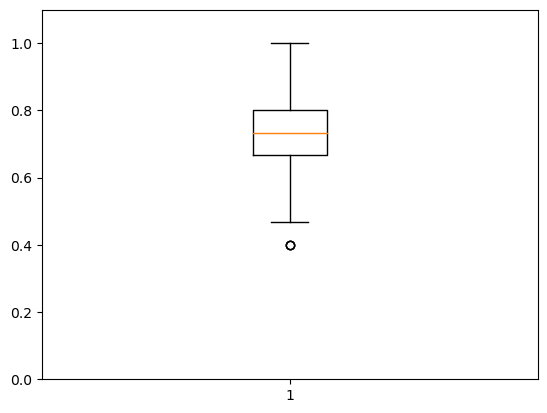

In [13]:
fig, ax = plt.subplots()
acc_data = results["final_accuracy"]#[~np.isnan(results["time_taken"])]
VP = ax.boxplot(acc_data)
ax.set_ylim(0,1.1)
plt.show()

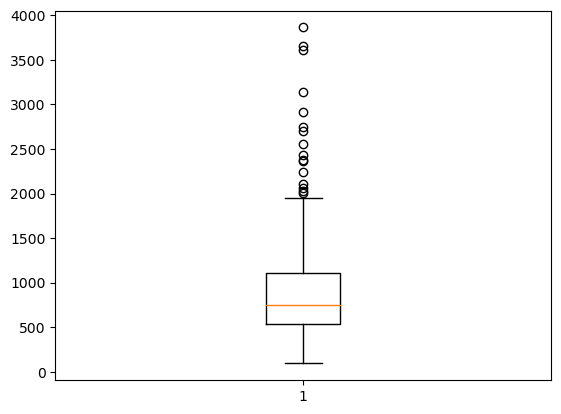

In [14]:
fig, ax = plt.subplots()
time_data = results["time_taken"][~np.isnan(results["time_taken"])]
VP = ax.boxplot(time_data)
plt.show()

In [15]:
np.mean(time_data)

904.0872483221476

I also checked if anything obviously changes if we e.g. remove everybody who took less than ten minutes in total. The result is that this doesn't change anything - there does not seem to be a qualitative difference in the data of the people who took longer or less long.

Next idea: lets look at the time taken for each task, and see if there are any super low outliers there.
First we will check the average time a participant took across all tasks (and save this into the results file), then we will look at the agerage time a specific task took across all participants.

Group 0, user time
mean: 3.1265373964158316
min: 0.4609909693400065
Group 0, final time
mean: 8.030167176880262
min: 1.4918359438578288
Group 0, total time
mean: 11.156704573296093
min: 2.32427716255188
Group 1
mean: 3.0186921580944186
min: 0.7953094323476155


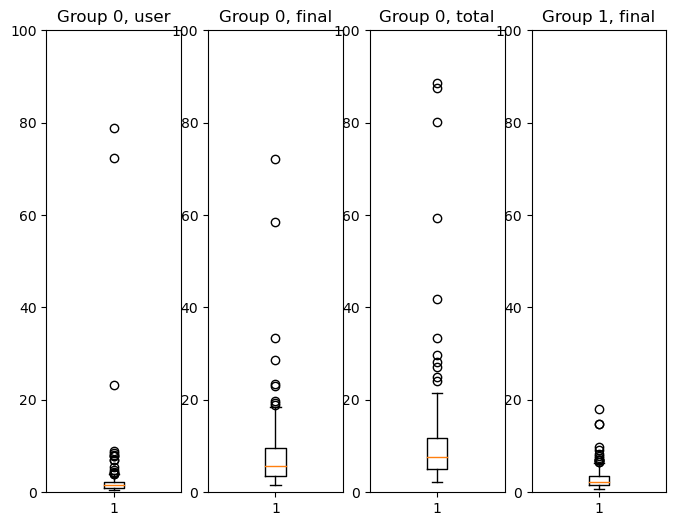

In [16]:
wo_0_user = {}
wo_0_final = {}
wo_1_final = {}
w_0_user = {}
w_0_final = {}
w_1_final = {}

time_per_p_0 = {"user":{}, "final":{}, "total":{}}
time_per_p_1 = {}

for p in participants_tasks:
    
    if p[3] == "0" or p[2] == "0":
        time_per_p_0["user"][p] = []
        time_per_p_0["final"][p] = []
        time_per_p_0["total"][p] = []
    elif p[3] == "1" or p[2] == "1":
        time_per_p_1[p] = []
    else:
        print(p[2], p[3], "error")
    
    for task_number in participants_tasks[p]:
        
        t = task_number # participants_tasks[p][task_number]["order"]
                        # The old version was for when the dict was organized by task id. 
                        # This had to be changed since some people saw the same task twice.
                        # Therefore task_number and t are now the same number.
                        # However, I kept the code in case we want to change it to seperate between the two in the future.
        
        if not t in wo_0_user:
            wo_0_user[t] = []
        if not t in wo_0_final:
            wo_0_final[t] = []
        if not t in wo_1_final:
            wo_1_final[t] = []
        if not t in w_0_user:
            w_0_user[t] = []
        if not t in w_0_final:
            w_0_final[t] = []
        if not t in w_1_final:
            w_1_final[t] = []
            
        if p[:2] == "wo":
            if p[3] == "0":
                wo_0_user[t].append(participants_tasks[p][task_number]["user_time"])
                wo_0_final[t].append(participants_tasks[p][task_number]["final_time"])
                time_per_p_0["user"][p].append(participants_tasks[p][task_number]["user_time"])
                time_per_p_0["final"][p].append(participants_tasks[p][task_number]["final_time"])
                time_per_p_0["total"][p].append(participants_tasks[p][task_number]["user_time"] + participants_tasks[p][task_number]["final_time"])
            else:
                wo_1_final[t].append(participants_tasks[p][task_number]["final_time"])
                time_per_p_1[p].append(participants_tasks[p][task_number]["final_time"])
        else:
            if p[2] == "0":
                w_0_user[t].append(participants_tasks[p][task_number]["user_time"])
                w_0_final[t].append(participants_tasks[p][task_number]["final_time"])
                time_per_p_0["user"][p].append(participants_tasks[p][task_number]["user_time"])
                time_per_p_0["final"][p].append(participants_tasks[p][task_number]["final_time"])
                time_per_p_0["total"][p].append(participants_tasks[p][task_number]["user_time"] + participants_tasks[p][task_number]["final_time"])
            else:
                w_1_final[t].append(participants_tasks[p][task_number]["final_time"])
                time_per_p_1[p].append(participants_tasks[p][task_number]["final_time"])
                
#pprint.pprint(wo_0_user)
                
for t in wo_0_user:
    wo_0_user[t] = np.mean(wo_0_user[t])
    wo_0_final[t] = np.mean(wo_0_final[t])
    wo_1_final[t] = np.mean(wo_1_final[t])
    w_0_user[t] = np.mean(w_0_user[t])
    w_0_final[t] = np.mean(w_0_final[t])
    w_1_final[t] = np.mean(w_1_final[t])

data_wo_means = {"wo_0_user":list(wo_0_user.values()),
                 "wo_0_final":list(wo_0_final.values()),
                 "wo_1_final":list(wo_1_final.values())
                }

data_w_means = {"w_0_user":list(w_0_user.values()),
                 "w_0_final":list(w_0_final.values()),
                 "w_1_final":list(w_1_final.values())
                }

#time_per_p_0["user"] = {p:{"mean":np.mean(time_per_p_0["user"][p]), "median":np.median(time_per_p_0["user"][p])} 
#                        for p in time_per_p_0["user"]}

time_per_p_0["user"] = {"mean":{p:np.mean(time_per_p_0["user"][p]) for p in time_per_p_0["user"]},
                        "median":{p:np.median(time_per_p_0["user"][p]) for p in time_per_p_0["user"]}}
time_per_p_0["final"] = {"mean":{p:np.mean(time_per_p_0["final"][p]) for p in time_per_p_0["final"]},
                         "median":{p:np.median(time_per_p_0["final"][p]) for p in time_per_p_0["final"]}}
time_per_p_0["total"] = {"mean":{p:np.mean(time_per_p_0["total"][p]) for p in time_per_p_0["total"]},
                         "median":{p:np.median(time_per_p_0["total"][p]) for p in time_per_p_0["total"]}}
time_per_p_1 = {"mean":{p:np.mean(time_per_p_1[p]) for p in time_per_p_1},
                "median":{p:np.median(time_per_p_1[p]) for p in time_per_p_1}}


print("Group 0, user time")
print("mean:", np.mean(list(time_per_p_0["user"]["mean"].values())))
print("min:", min(list(time_per_p_0["user"]["mean"].values())))
print("Group 0, final time")
print("mean:", np.mean(list(time_per_p_0["final"]["mean"].values())))
print("min:", min(list(time_per_p_0["final"]["mean"].values())))
print("Group 0, total time")
print("mean:", np.mean(list(time_per_p_0["total"]["mean"].values())))
print("min:", min(list(time_per_p_0["total"]["mean"].values())))
print("Group 1")
print("mean:", np.mean(list(time_per_p_1["mean"].values())))
print("min:", min(list(time_per_p_1["mean"].values())))

time_mean_per_user_data_ = [list(time_per_p_0["user"]["mean"].values()), list(time_per_p_0["final"]["mean"].values()), 
                      list(time_per_p_0["total"]["mean"].values()), list(time_per_p_1["mean"].values())]
time_median_per_user_data = [list(time_per_p_0["user"]["median"].values()), list(time_per_p_0["final"]["median"].values()), 
                      list(time_per_p_0["total"]["median"].values()), list(time_per_p_1["median"].values())]
labels = ["Group 0, user", "Group 0, final", "Group 0, total", "Group 1, final"]

fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize=(8, 6))
for i in range(4):
    VP = axs[i].boxplot(time_mean_per_user_data_[i])
    axs[i].title.set_text(labels[i])
    axs[i].set_ylim(0, 100)
plt.show()

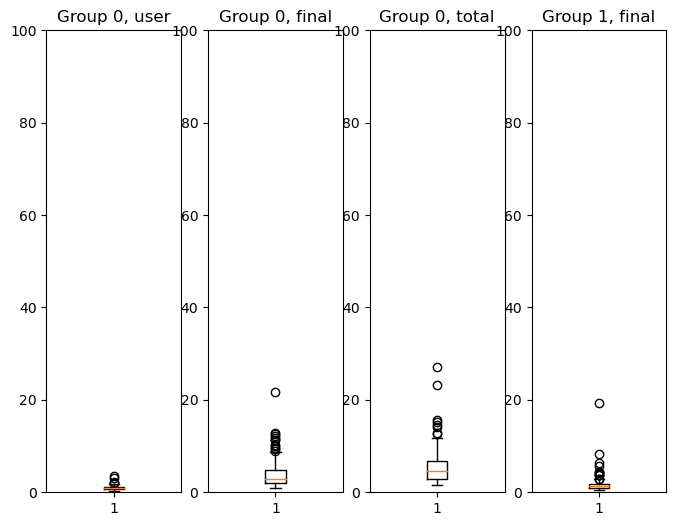

In [17]:
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize=(8, 6))
for i in range(4):
    VP = axs[i].boxplot(time_median_per_user_data[i])
    axs[i].title.set_text(labels[i])
    axs[i].set_ylim(0, 100)
plt.show()

In [18]:
results["time_per_task"] = pd.Series(time_per_p_0["total"]["mean"]|time_per_p_1["mean"])
results["time_per_task_user"] = pd.Series(time_per_p_0["user"]["mean"])
results["time_per_task_final"] = pd.Series(time_per_p_0["final"]["mean"])
results["time_per_task_median"] = pd.Series(time_per_p_0["total"]["median"]|time_per_p_1["median"])
results

,file,explanation_group,priming_group,participant_number,final_accuracy,ai_agreement,n_na,n_wt,n_wmt,n_ut,...,ut_ratio,wt_ratio,total_trust,fai,com,rel,time_per_task,time_per_task_user,time_per_task_final,time_per_task_median
wo_0_0,explanations_wo/0_0.csv,wo,0,0,0.466667,0.600000,7,0,1,5,...,1.000000,0.000000,0.250000,-0.2,0.75,0.333333,3.353436,0.725426,2.628010,3.149200
wo_0_1,explanations_wo/0_1.csv,wo,0,1,0.800000,0.800000,9,2,2,1,...,0.333333,0.666667,-0.250000,-1.0,0.25,0.333333,4.425740,1.346242,3.079498,2.602590
wo_0_3,explanations_wo/0_3.csv,wo,0,3,0.866667,0.733333,10,1,3,1,...,0.500000,0.500000,-0.666667,-1.0,-0.50,-0.333333,6.221536,1.325001,4.896535,3.184887
wo_0_4,explanations_wo/0_4.csv,wo,0,4,1.000000,0.733333,10,1,4,0,...,0.000000,1.000000,0.000000,-0.4,0.25,0.333333,8.652404,0.962349,7.690055,1.866513
wo_0_5,explanations_wo/0_5.csv,wo,0,5,0.800000,0.800000,8,3,2,1,...,0.250000,0.750000,0.583333,0.8,0.50,0.333333,6.889090,2.224270,4.664820,4.470461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
w_1_74,explanations_w/1_74.csv,w,1,74,0.866667,0.733333,0,10,3,1,...,0.090909,0.909091,-1.500000,-0.8,-2.00,-2.000000,2.174590,NaN,NaN,1.094533
w_1_75,explanations_w/1_75.csv,w,1,75,0.733333,0.733333,0,9,2,2,...,0.181818,0.818182,0.250000,0.2,0.25,0.333333,3.138306,NaN,NaN,2.340623
w_1_76,explanations_w/1_76.csv,w,1,76,0.800000,0.666667,0,9,3,2,...,0.181818,0.818182,0.083333,-0.4,0.00,1.000000,2.032701,NaN,NaN,1.301402
w_1_77,explanations_w/1_77.csv,w,1,77,0.800000,0.800000,0,10,2,1,...,0.090909,0.909091,-0.333333,-0.2,-0.25,-0.666667,3.636001,NaN,NaN,2.098175


Again, the results show that there are no bottom outliers who took very much less time per task than everybody else. However, it is quite interesting how much longer people take to consider the task if they are given the option to make up their mind first and only then are shown the AI prediction!

Next, we plot the times per task. Here, there is not much of interest. Note that the task numbers in this version are the position at which a participant saw the task, so task 1 is the first task of each participant, but not the same exact task (nicht der selbe). 

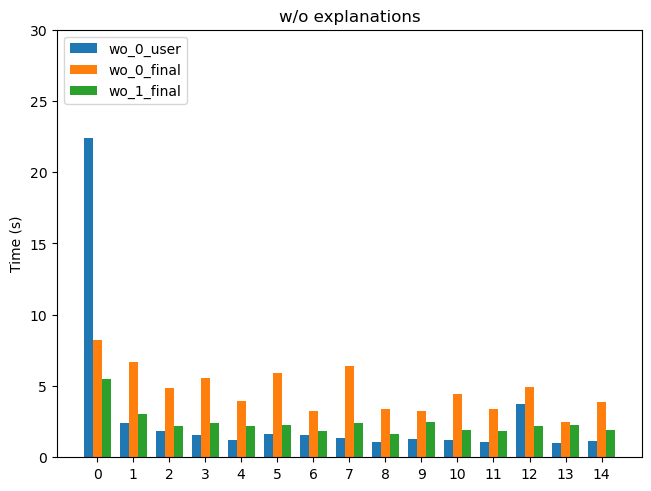

In [19]:
x = np.arange(15)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data_wo_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)')
ax.set_title('w/o explanations')
ax.set_xticks(x + width, range(15))
ax.legend(loc='upper left') #, ncols=3)
ax.set_ylim(0, 30)

plt.show()

In [29]:
x = np.arange(len(task_list))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data_w_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)')
ax.set_title('w/ explanations')
ax.set_xticks(x + width, task_list)
ax.legend(loc='upper left') #, ncols=3)
ax.set_ylim(0, 30)

plt.show()

NameError: name 'task_list' is not defined

## Find Bad Faith/Too Dumb/Too Fast

Additional ideas:

Were there any people who simply always answered the same thing? This would not be found if we remove people with extremely low accuracy, but is otherwise unlikely.

I also considered checking several things (overall accuracy, perceived domain knowledge, language skills, previous approvals of this participant, etc. 
Surprisingly, when rerunning some visualizations with a number of people removed on this basis, there was also no difference in the results. I don't think that simply combining these factors based on gut feeling is a good way to kick out bad faith participants.

In [30]:
grad_ratio = {}

for p in participants_tasks:
    final_decisions = [participants_tasks[p][t]["final_decision"] for t in participants_tasks[p]]
    final_decisions = Counter(final_decisions)
    ratio = final_decisions["GRADUATE"]/15
    if ratio == 1:
        print(p, final_decisions)
    grad_ratio[p] = ratio
    
results["grad_ratio"] = pd.Series(grad_ratio)
results

wo_1_43 Counter({'GRADUATE': 15})
wo_1_66 Counter({'GRADUATE': 15})


,file,explanation_group,priming_group,participant_number,final_accuracy,ai_agreement,n_na,n_wt,n_wmt,n_ut,...,wt_ratio,total_trust,fai,com,rel,time_per_task,time_per_task_user,time_per_task_final,time_per_task_median,grad_ratio
wo_0_0,explanations_wo/0_0.csv,wo,0,0,0.466667,0.600000,7,0,1,5,...,0.000000,0.250000,-0.2,0.75,0.333333,3.353436,0.725426,2.628010,3.149200,0.600000
wo_0_1,explanations_wo/0_1.csv,wo,0,1,0.800000,0.800000,9,2,2,1,...,0.666667,-0.250000,-1.0,0.25,0.333333,4.425740,1.346242,3.079498,2.602590,0.666667
wo_0_3,explanations_wo/0_3.csv,wo,0,3,0.866667,0.733333,10,1,3,1,...,0.500000,-0.666667,-1.0,-0.50,-0.333333,6.221536,1.325001,4.896535,3.184887,0.600000
wo_0_4,explanations_wo/0_4.csv,wo,0,4,1.000000,0.733333,10,1,4,0,...,1.000000,0.000000,-0.4,0.25,0.333333,8.652404,0.962349,7.690055,1.866513,0.733333
wo_0_5,explanations_wo/0_5.csv,wo,0,5,0.800000,0.800000,8,3,2,1,...,0.750000,0.583333,0.8,0.50,0.333333,6.889090,2.224270,4.664820,4.470461,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
w_1_74,explanations_w/1_74.csv,w,1,74,0.866667,0.733333,0,10,3,1,...,0.909091,-1.500000,-0.8,-2.00,-2.000000,2.174590,NaN,NaN,1.094533,0.866667
w_1_75,explanations_w/1_75.csv,w,1,75,0.733333,0.733333,0,9,2,2,...,0.818182,0.250000,0.2,0.25,0.333333,3.138306,NaN,NaN,2.340623,0.733333
w_1_76,explanations_w/1_76.csv,w,1,76,0.800000,0.666667,0,9,3,2,...,0.818182,0.083333,-0.4,0.00,1.000000,2.032701,NaN,NaN,1.301402,0.933333
w_1_77,explanations_w/1_77.csv,w,1,77,0.800000,0.800000,0,10,2,1,...,0.909091,-0.333333,-0.2,-0.25,-0.666667,3.636001,NaN,NaN,2.098175,0.800000


In [31]:
# save extended dataframe

results.to_csv("results.csv")


Okay, lets look at the time per task again for each group, and consider who needs to be kicked based on too little time taken. Lets calculate some percentiles:

In [32]:
# split into separate dataframes for easy access
results_0 = results[results["priming_group"] == 0]
results_1 = results[results["priming_group"] == 1]
results_w = results[results["explanation_group"] == "w"]
results_wo = results[results["explanation_group"] == "wo"]

In [33]:
task_times_0 = list(results_0["time_per_task"])

print("People in Group 0:", len(task_times_0))

for thresh in range(10):
    percent = len([t for t in task_times_0 if t<thresh])
    print(f"Under {thresh} seconds:", percent, "people in Group 0")

task_times_1 = list(results_1["time_per_task"])
print("---")
print("People in Group 1:", len(task_times_1))

for thresh in range(1, 10):
    percent = len([t for t in task_times_1 if t<thresh])
    print(f"Under {thresh} seconds:", percent, "people in of Group 1")

People in Group 0: 146
Under 0 seconds: 0 people in Group 0
Under 1 seconds: 0 people in Group 0
Under 2 seconds: 0 people in Group 0
Under 3 seconds: 5 people in Group 0
Under 4 seconds: 23 people in Group 0
Under 5 seconds: 33 people in Group 0
Under 6 seconds: 48 people in Group 0
Under 7 seconds: 60 people in Group 0
Under 8 seconds: 78 people in Group 0
Under 9 seconds: 93 people in Group 0
---
People in Group 1: 152
Under 1 seconds: 10 people in of Group 1
Under 2 seconds: 70 people in of Group 1
Under 3 seconds: 108 people in of Group 1
Under 4 seconds: 120 people in of Group 1
Under 5 seconds: 132 people in of Group 1
Under 6 seconds: 132 people in of Group 1
Under 7 seconds: 143 people in of Group 1
Under 8 seconds: 146 people in of Group 1
Under 9 seconds: 147 people in of Group 1


In [34]:
# Test: combine different exclusion criteria in different ways - no effect

#df_test_0 = pd.DataFrame([results_0["time_per_task"]<7, 
#                        results_0["user_accuracy"]<0.7,
#                        results_0["time_taken"]<450,
#                        results_0["perceived_domain_knowledge"]<1,
#                        results_0["total_approvals"]<10,
#                        results_0["language"]!="English"
#                       ])
#for c in df_test_0:
#    if sum(list(df_test_0[c]))>4:
#        print(c)
#        participants_to_kick.append(c)
#        
#df_test_1 = pd.DataFrame([results_1["time_per_task"]<7, 
#                        results_1["time_taken"]<450,
#                        results_1["perceived_domain_knowledge"]<1,
#                        results_1["total_approvals"]<10,
#                        results_1["language"]!="English"
#                       ])

#for c in df_test_1:
#    if sum(list(df_test_1[c]))>3:
#        print(c)
#        participants_to_kick.append(c)

So far, removing people based on these automatic criteria did not actually seem to affect any change in the data distribution. So we will try one final idea:

We will plot for each participant all their task times and whether they took the ai proposed option. Can we visually identify any people who seem to have "given up" at some point, and just clicked through after a few tasks?

In [35]:
p_times = {}
p_colors = {}
color_map = ["orange", "lightgreen"]

for p in participants_tasks:
    
    task_data = [[t, # participants_tasks[p][t]["order"] 
                  participants_tasks[p][t]["final_time"], 
                  color_map[participants_tasks[p][t]["ai_agreement"]]
                 ] 
                 for t in participants_tasks[p]]
    
    task_data = sorted(task_data, key = lambda x: x[0])
    times = [t[1] for t in task_data]
    colors = [t[2] for t in task_data]
    if not p in results.index:
        colors = ["red"] *15
    if len(times) == 15:
        p_times[p] = times
        p_colors[p] = colors
    
participants = sorted(list(p_times.keys()))
print(len(participants))

300


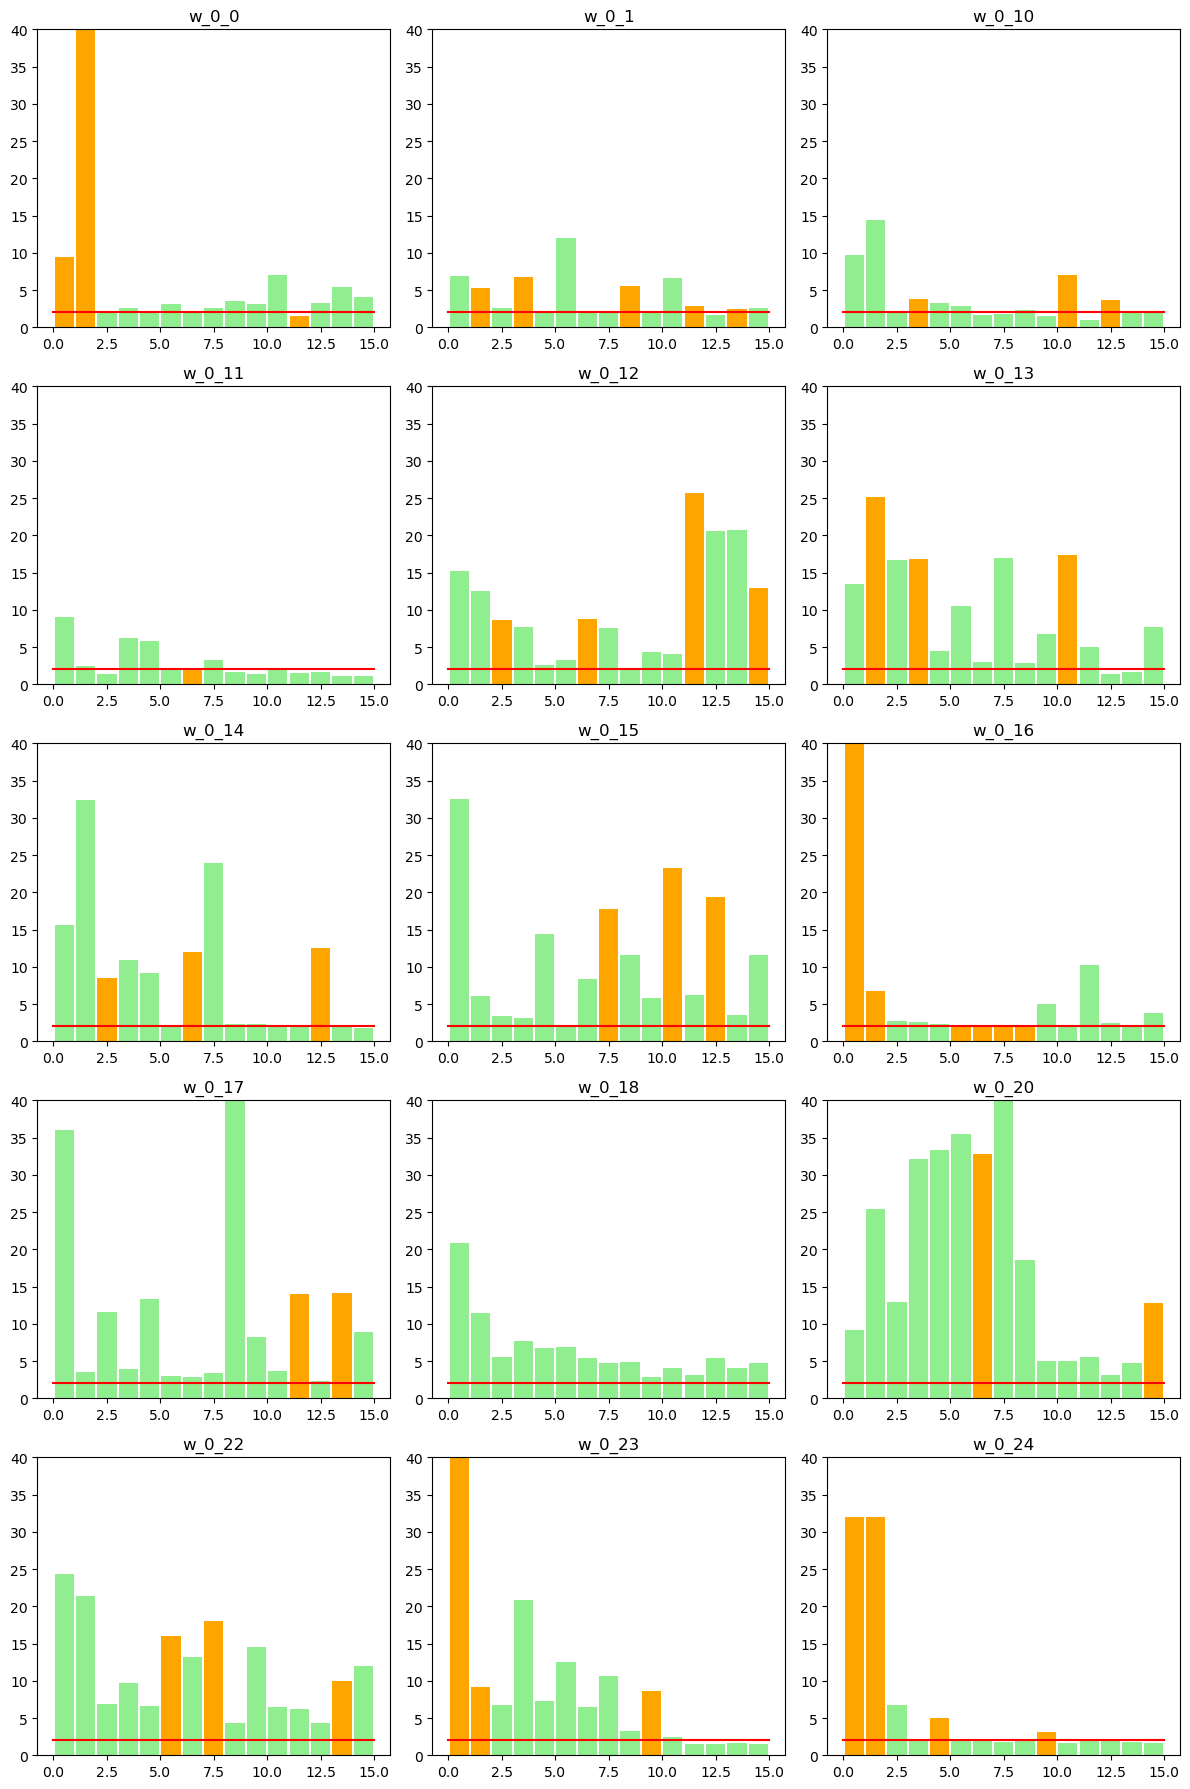

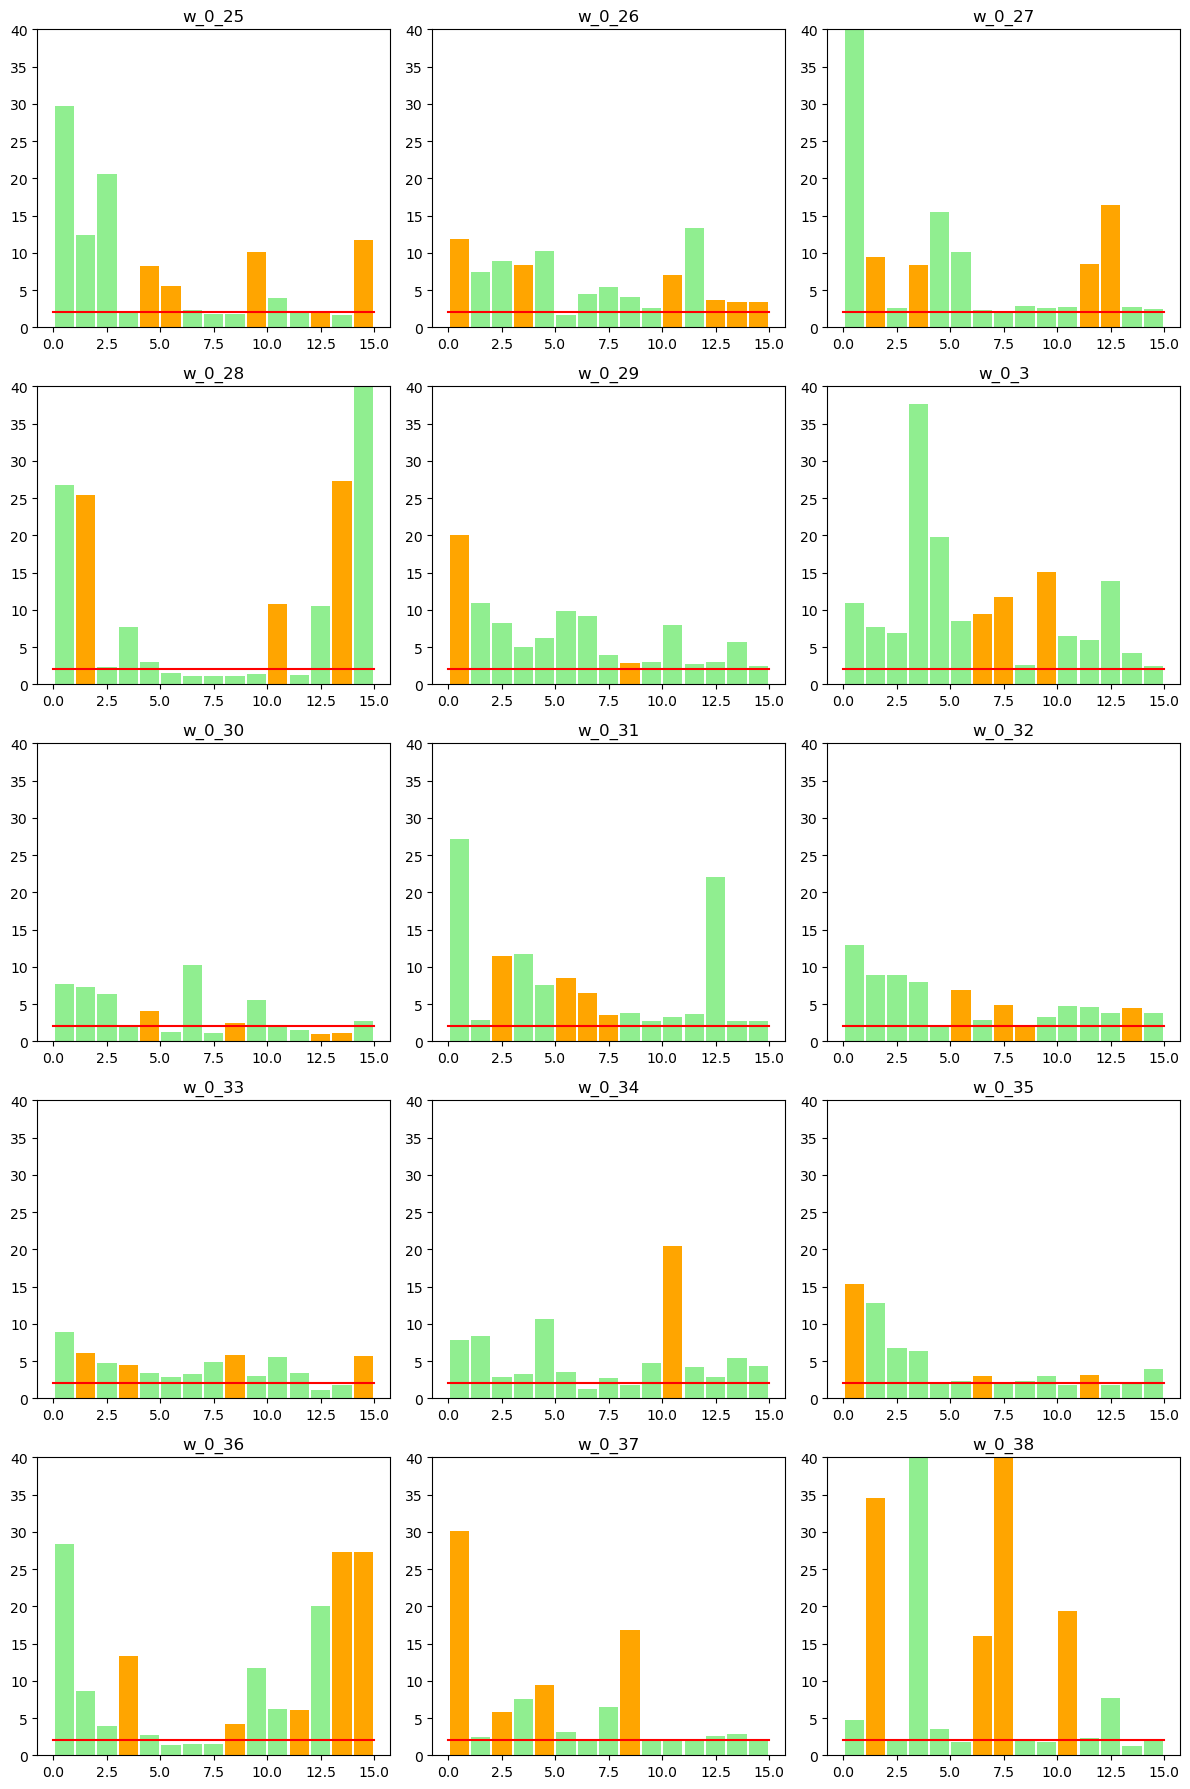

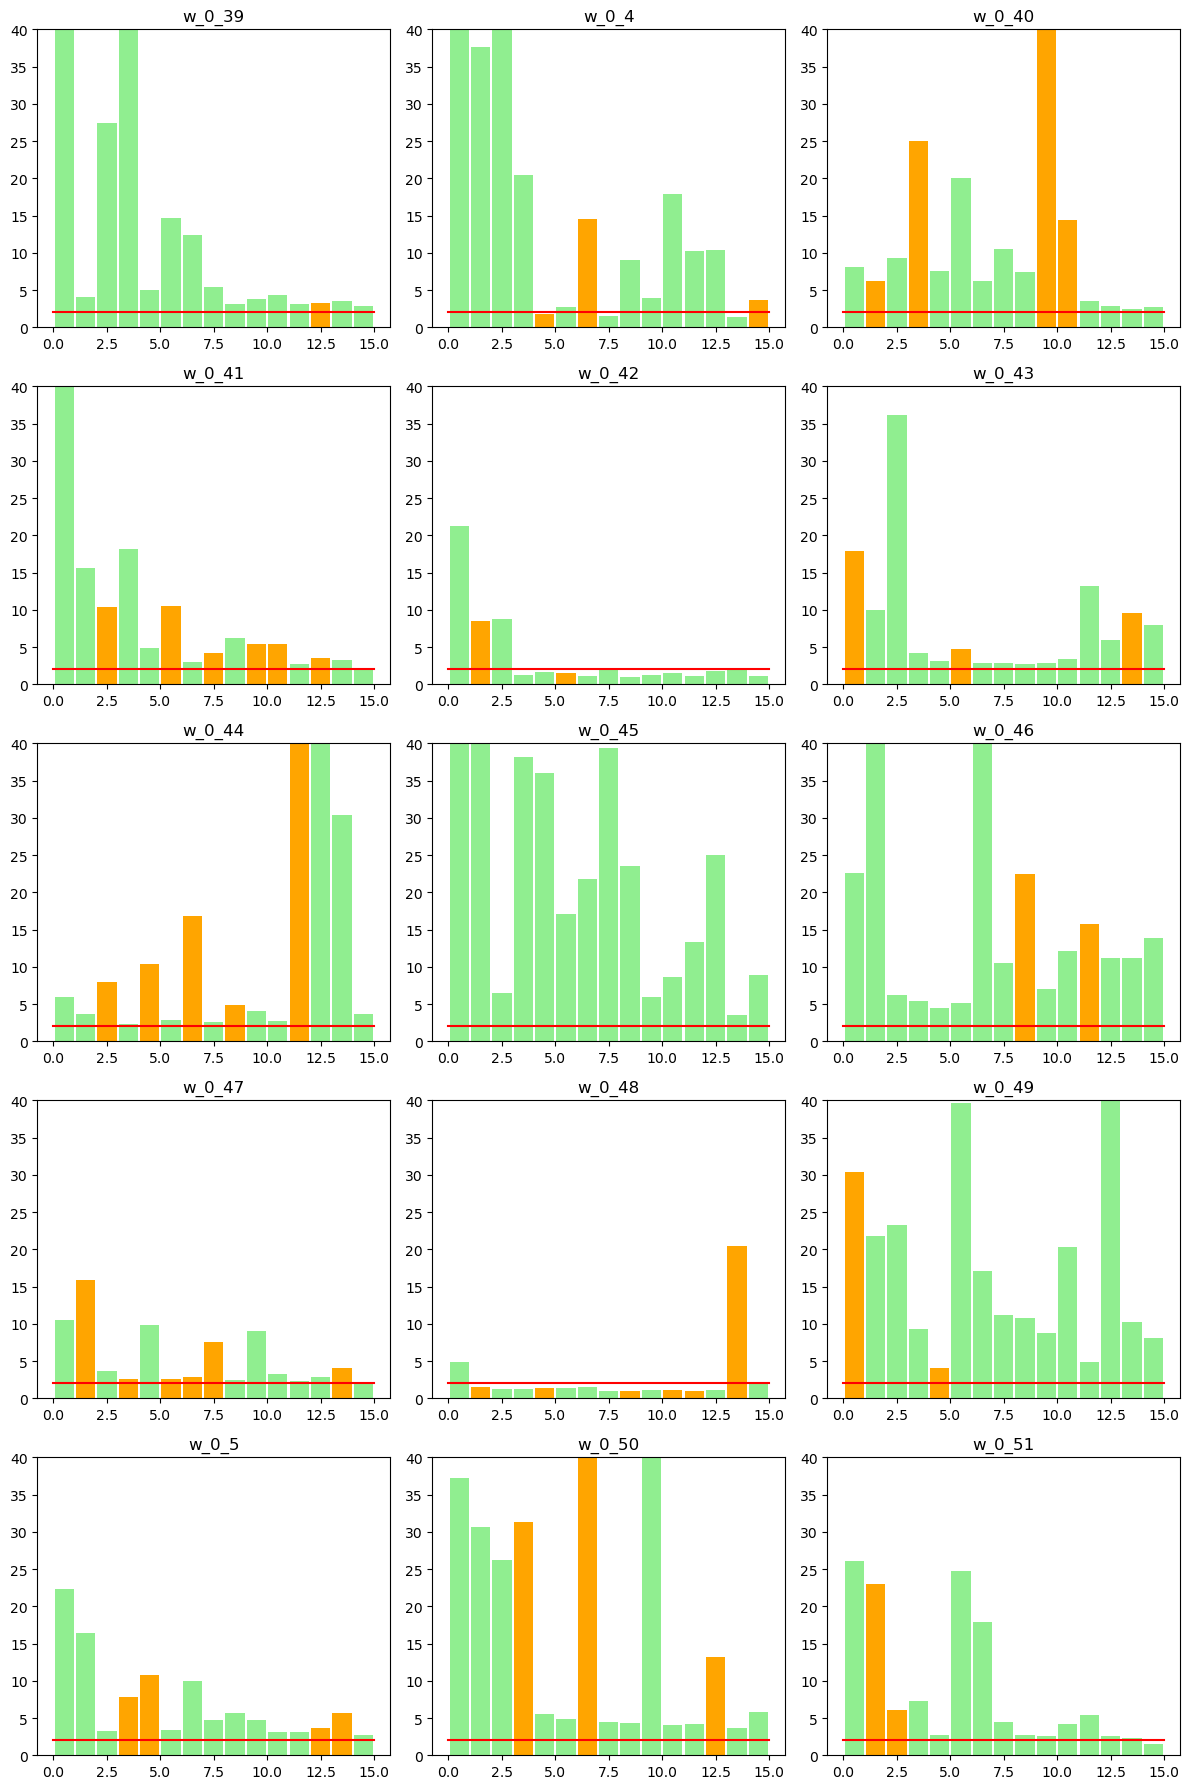

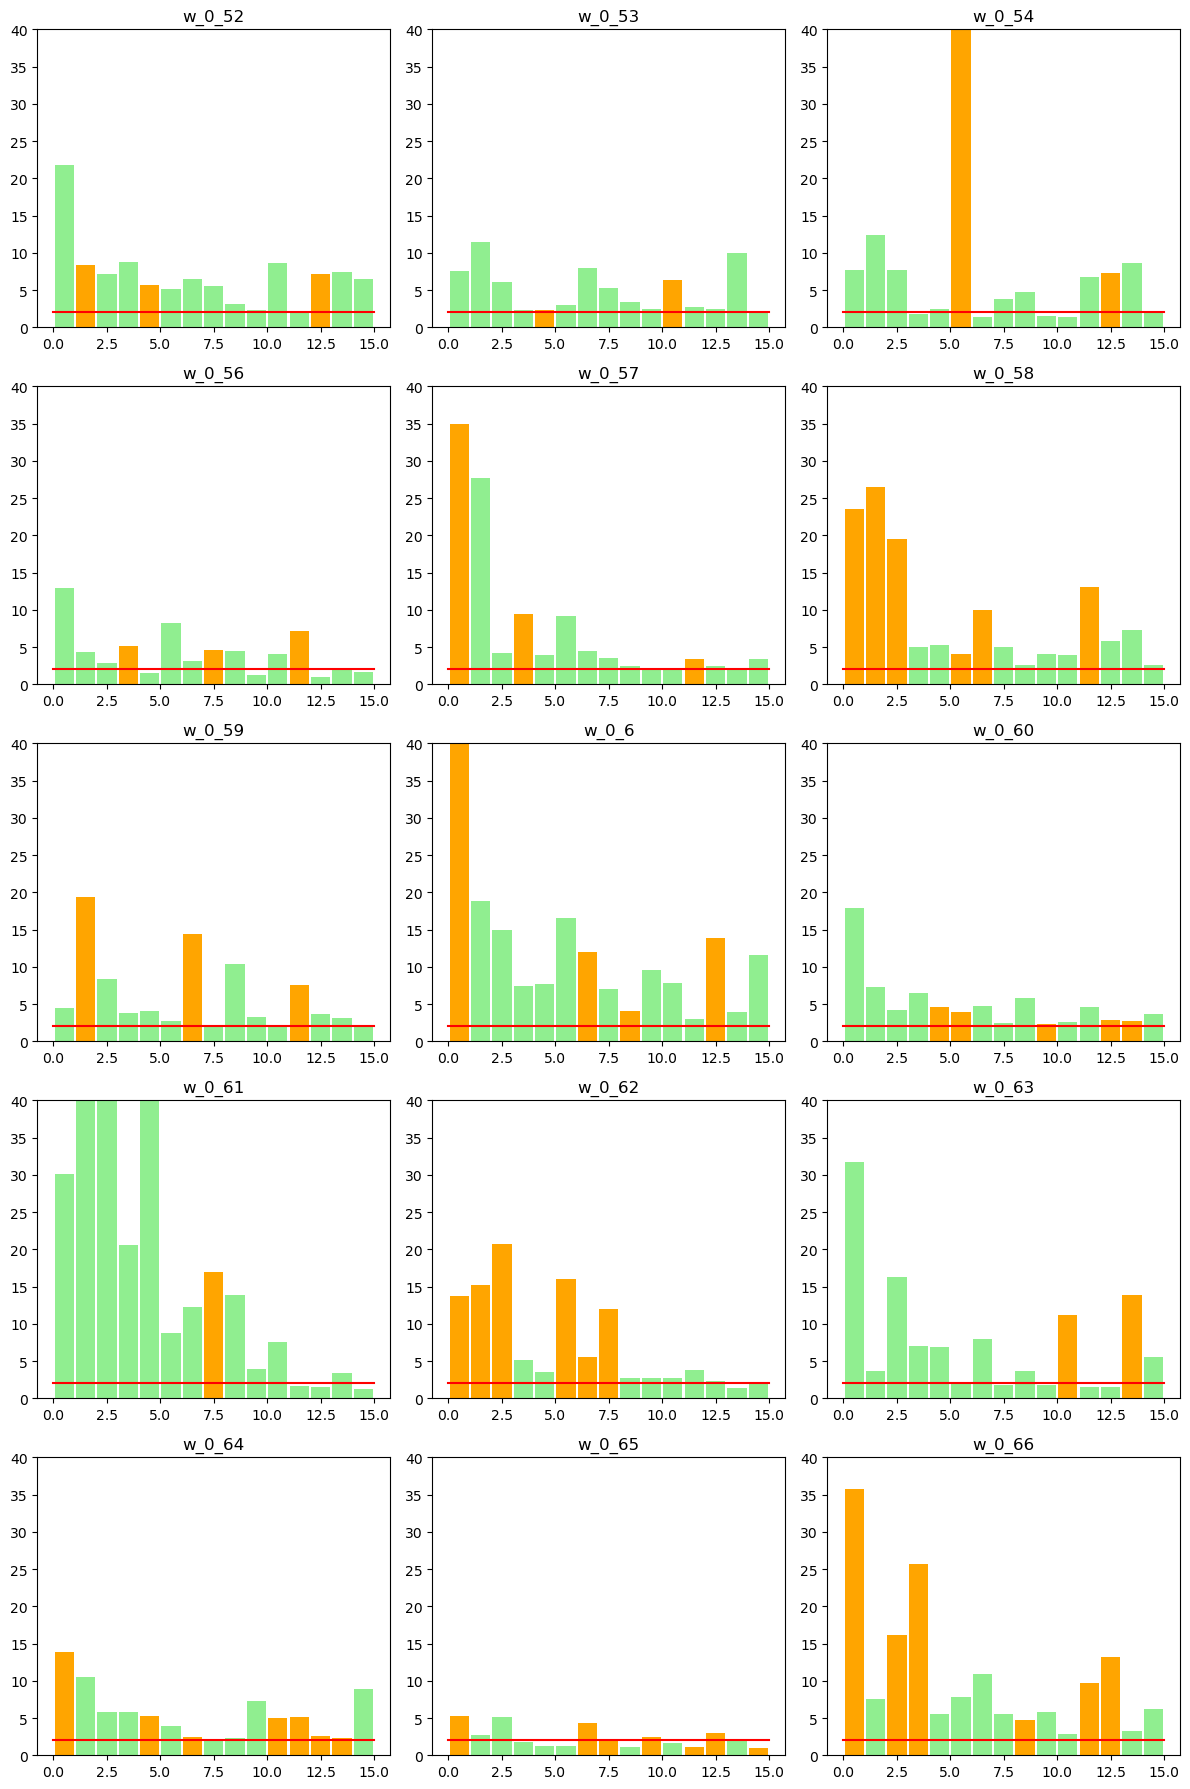

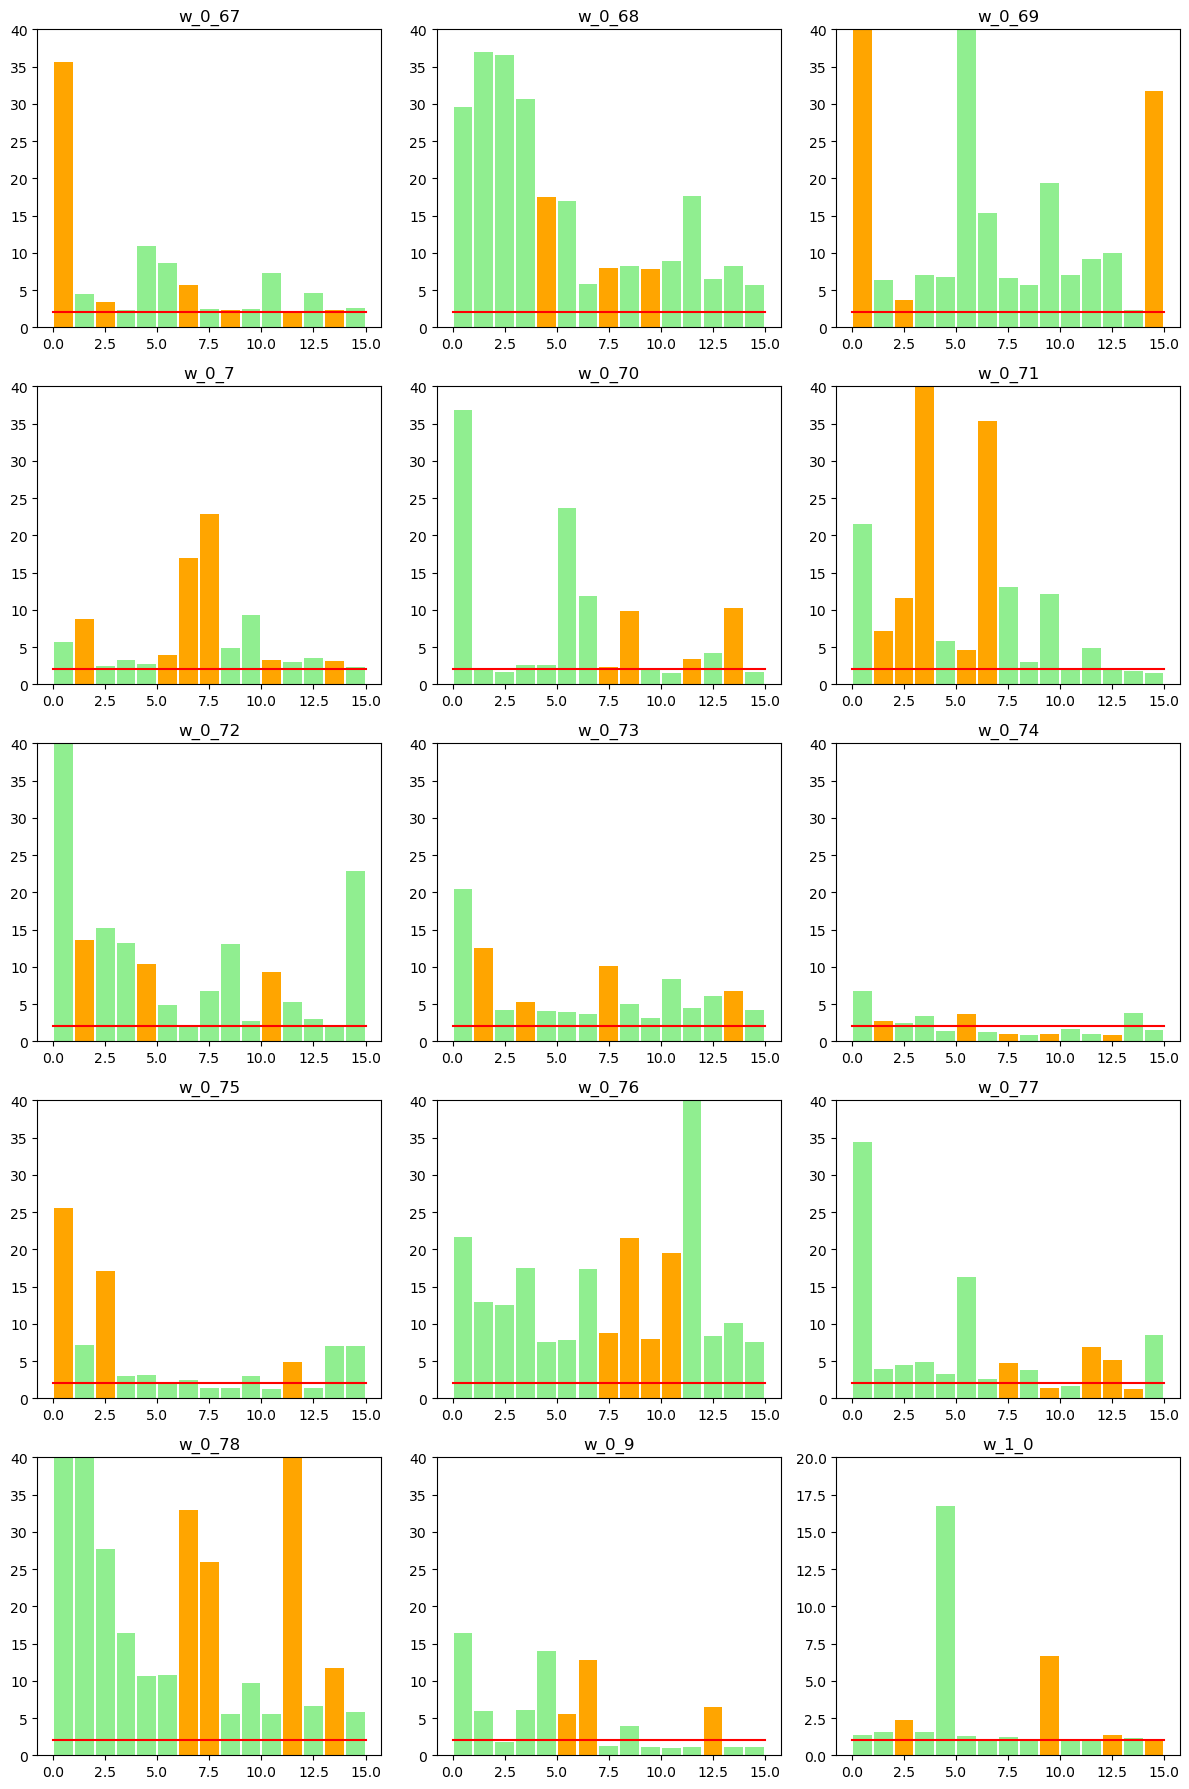

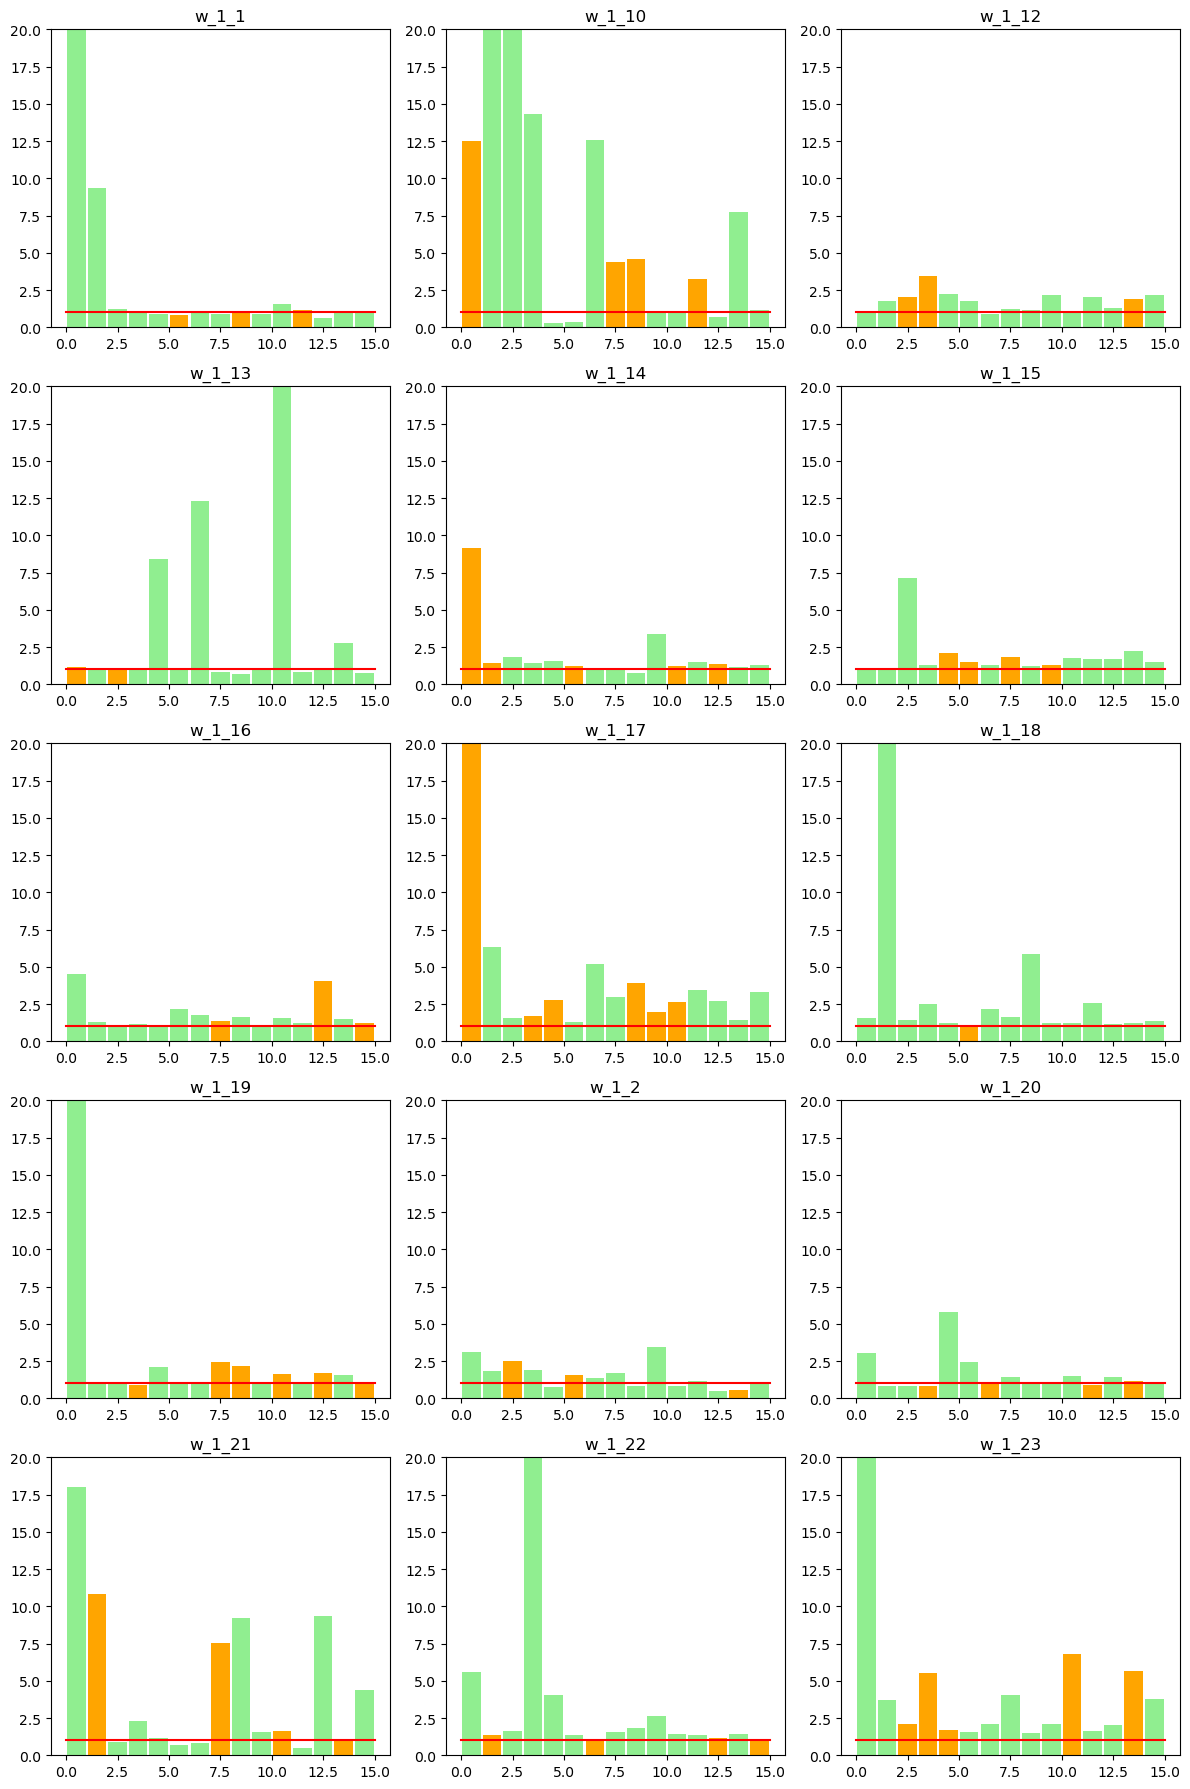

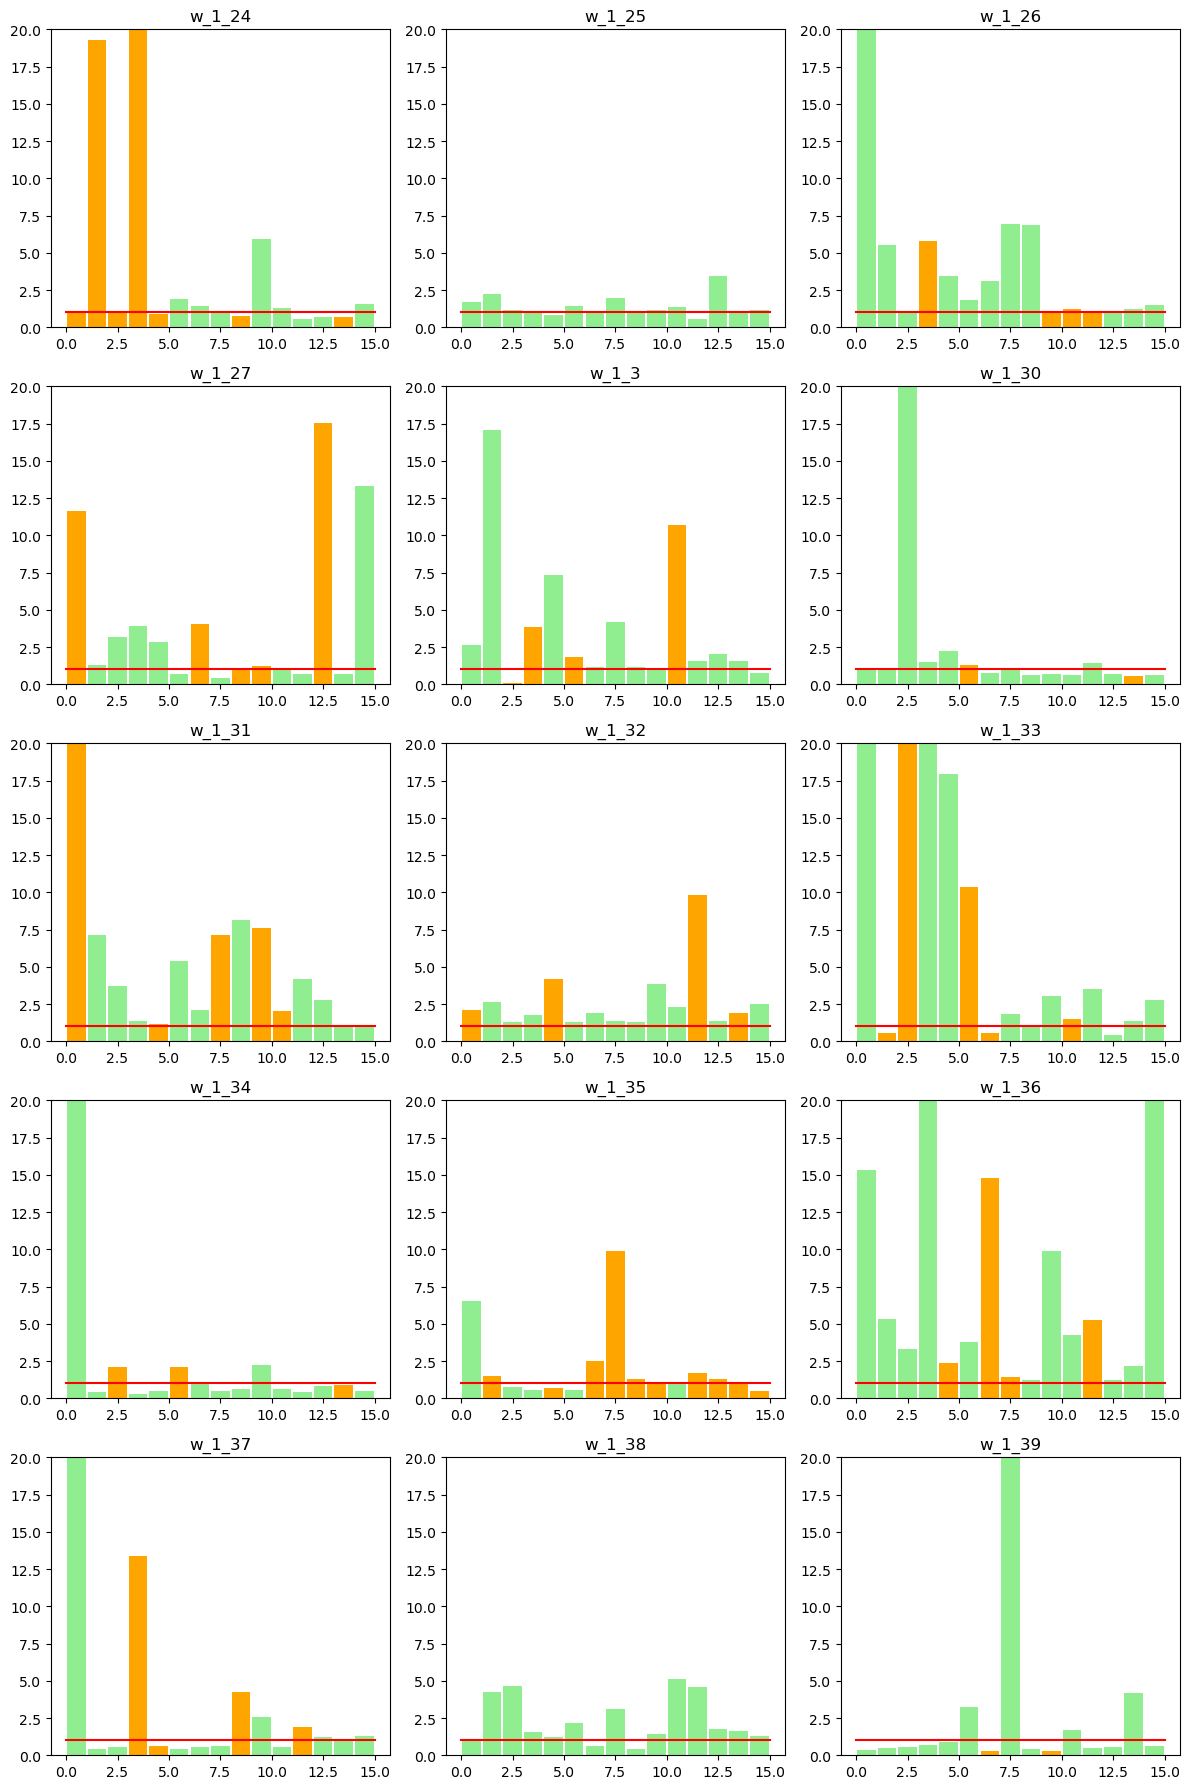

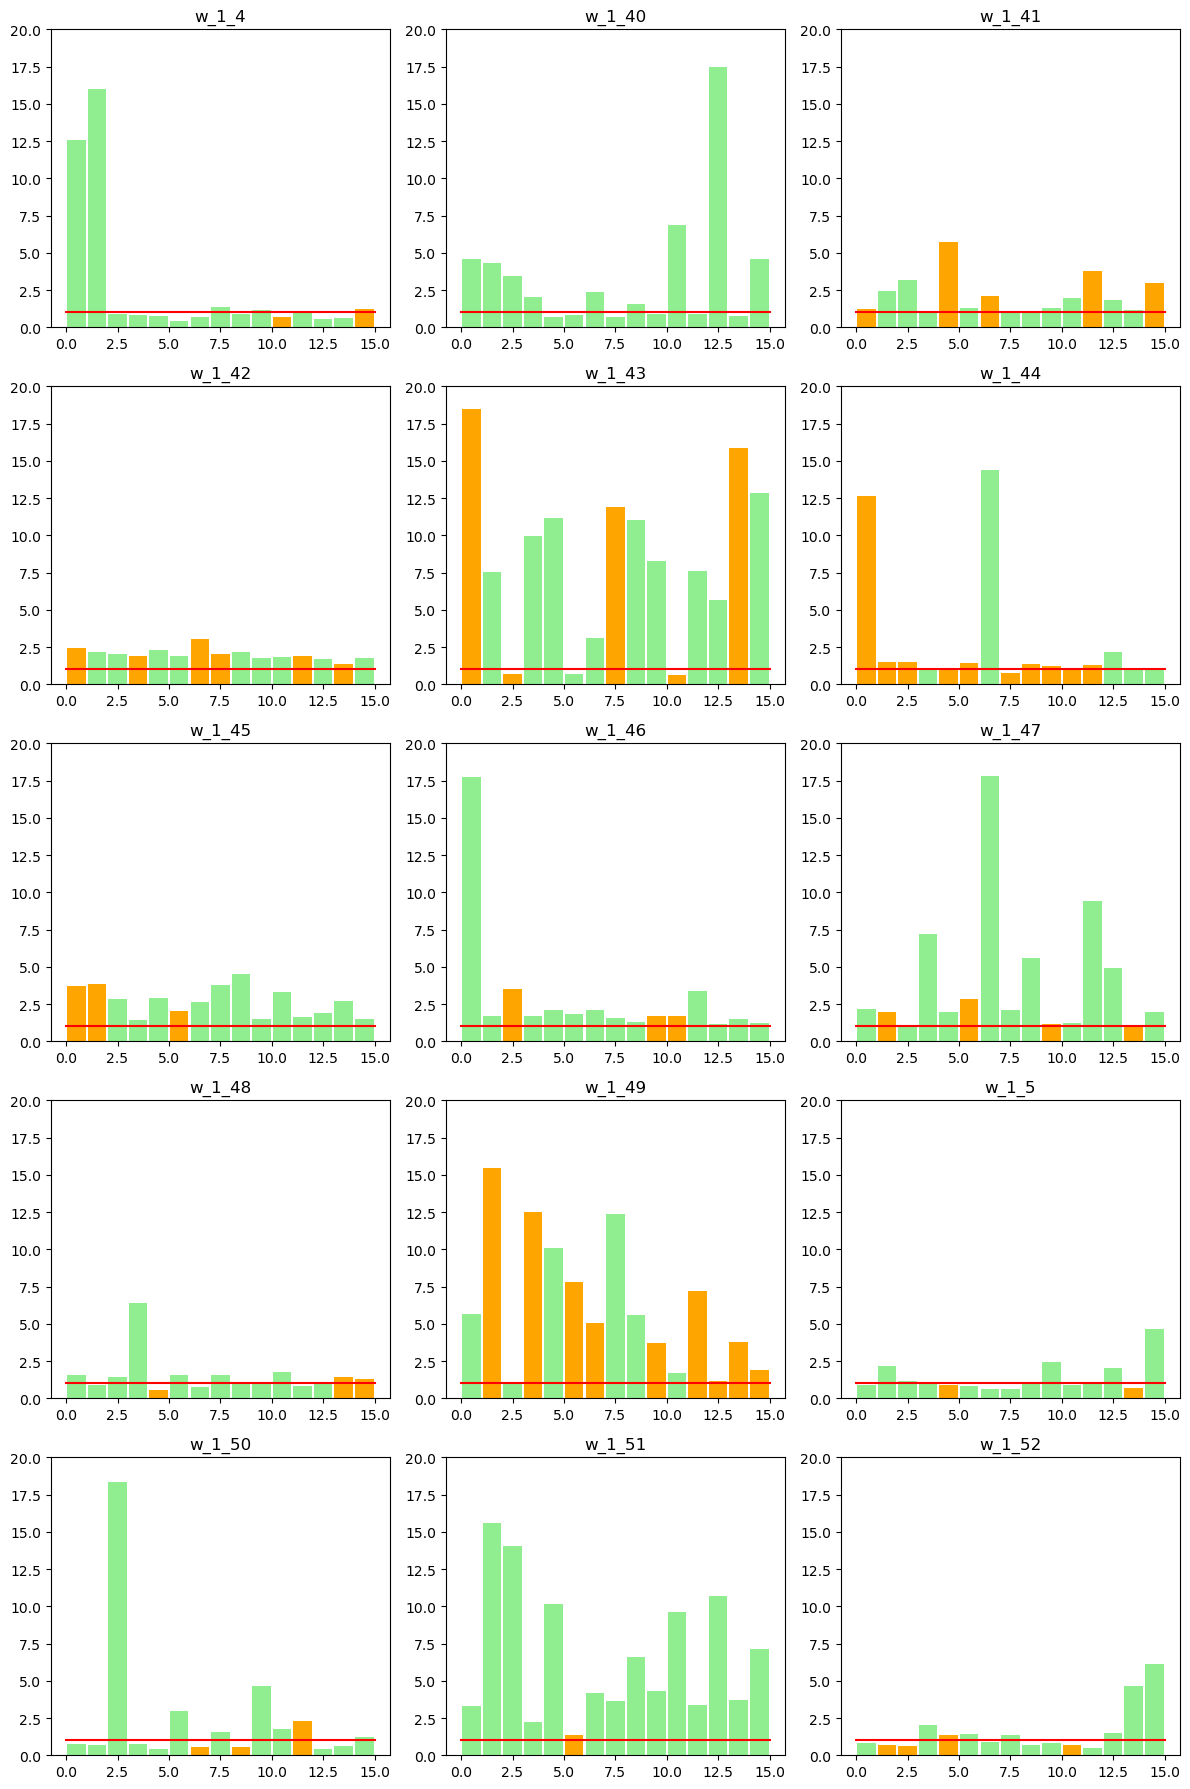

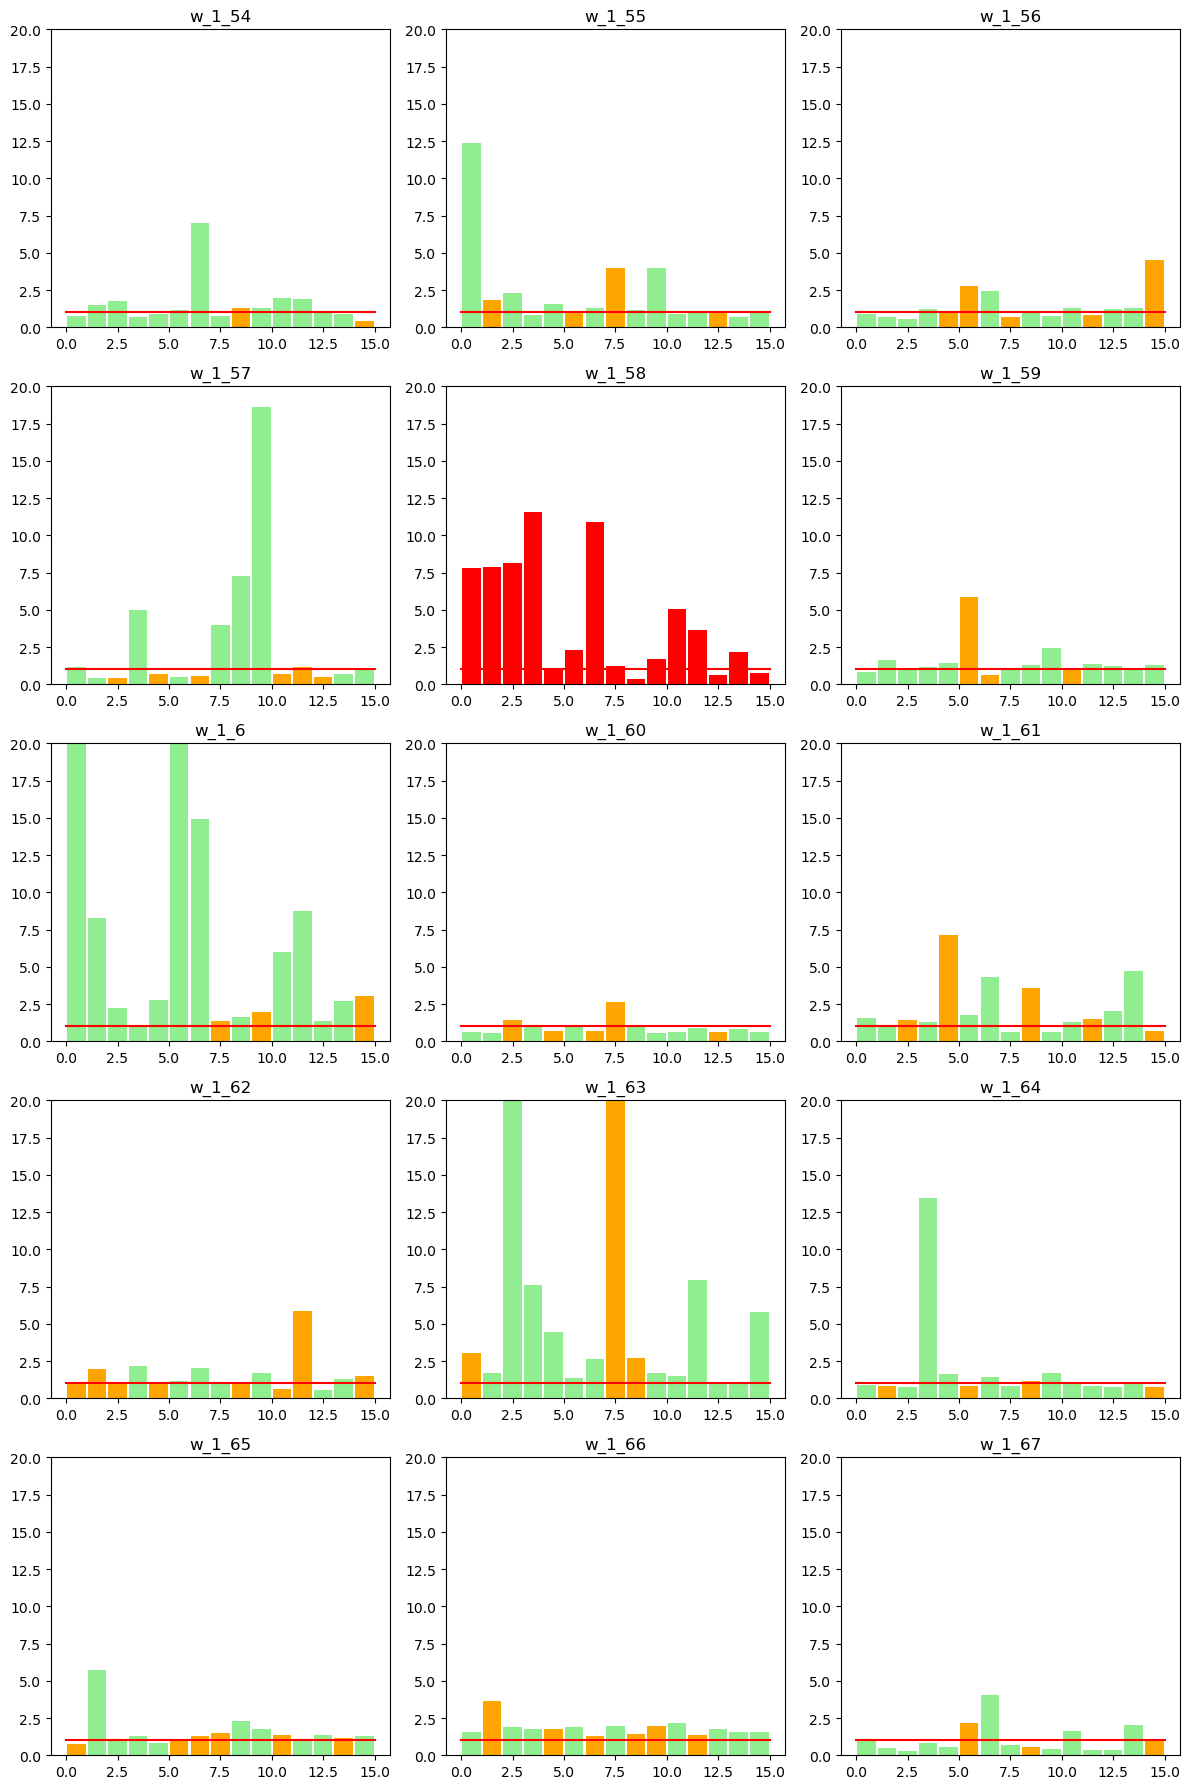

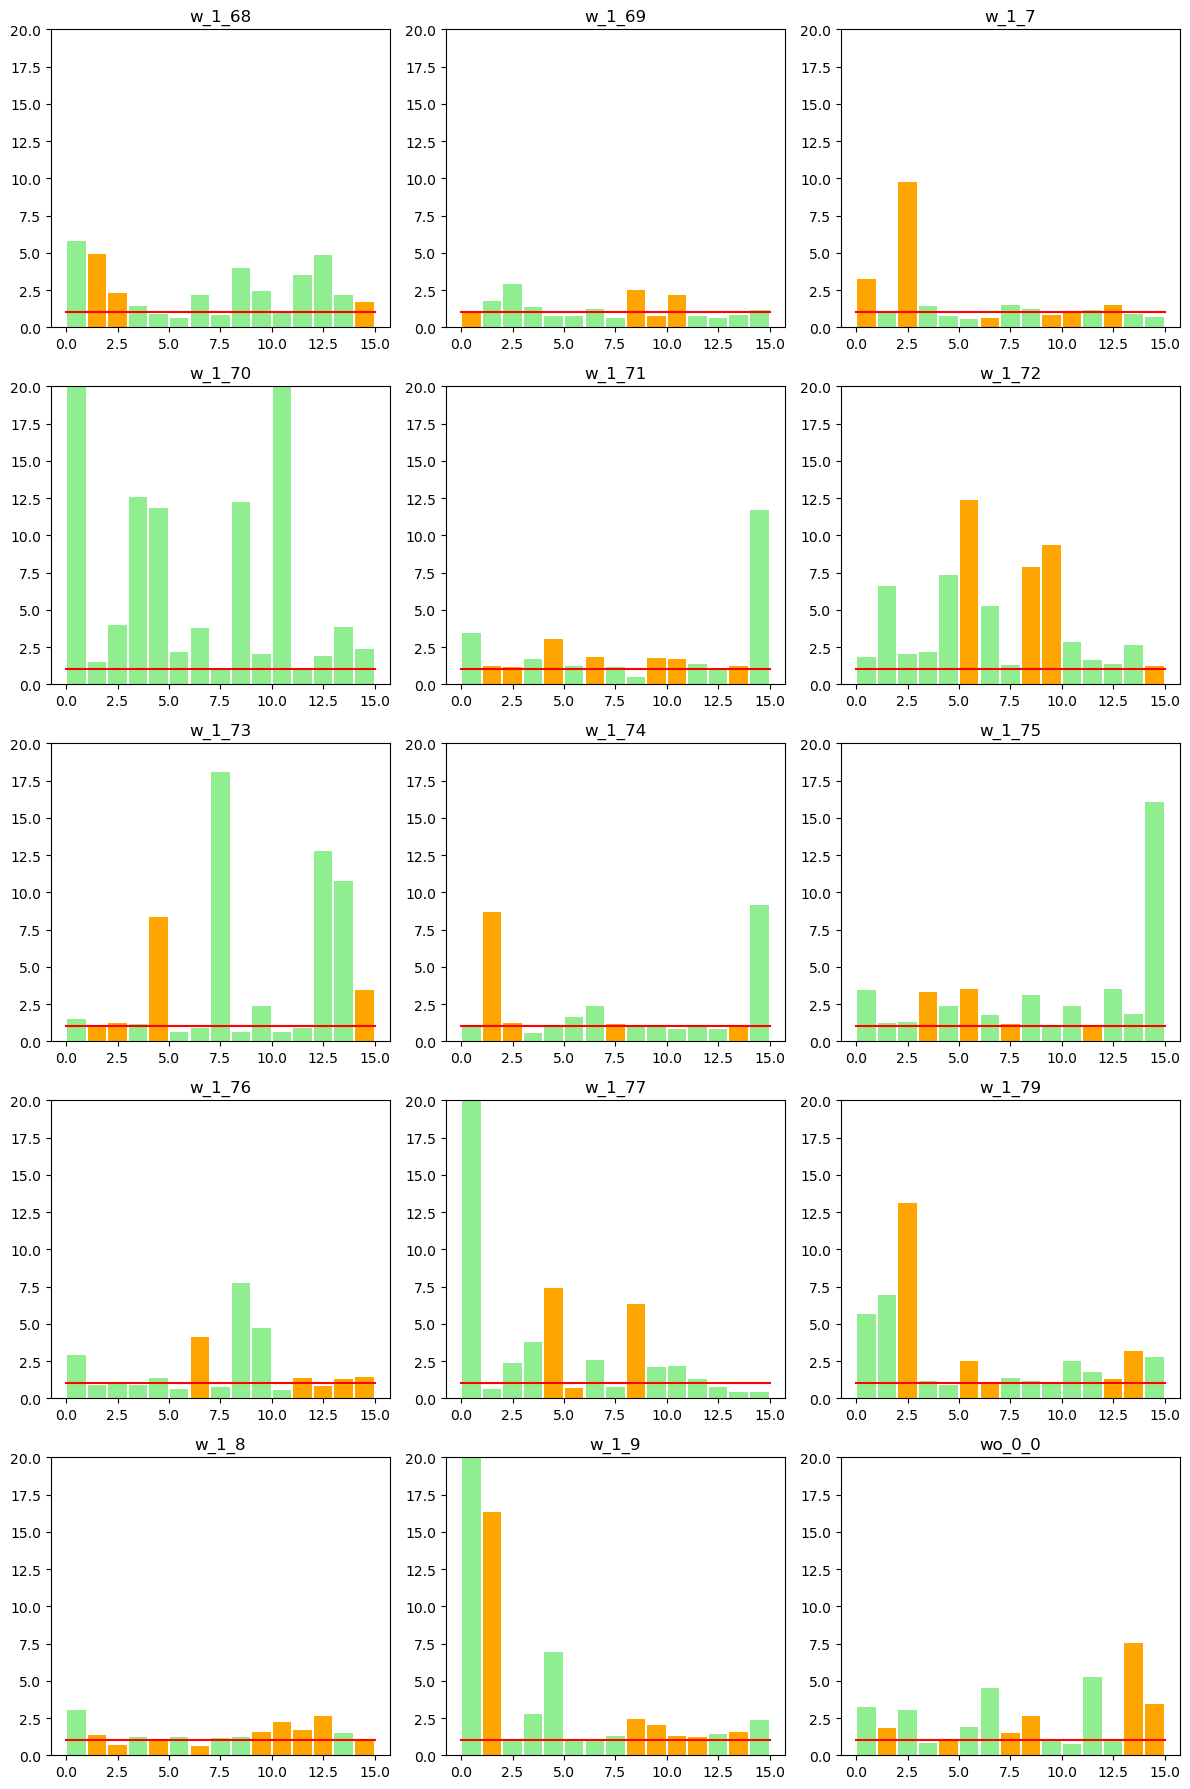

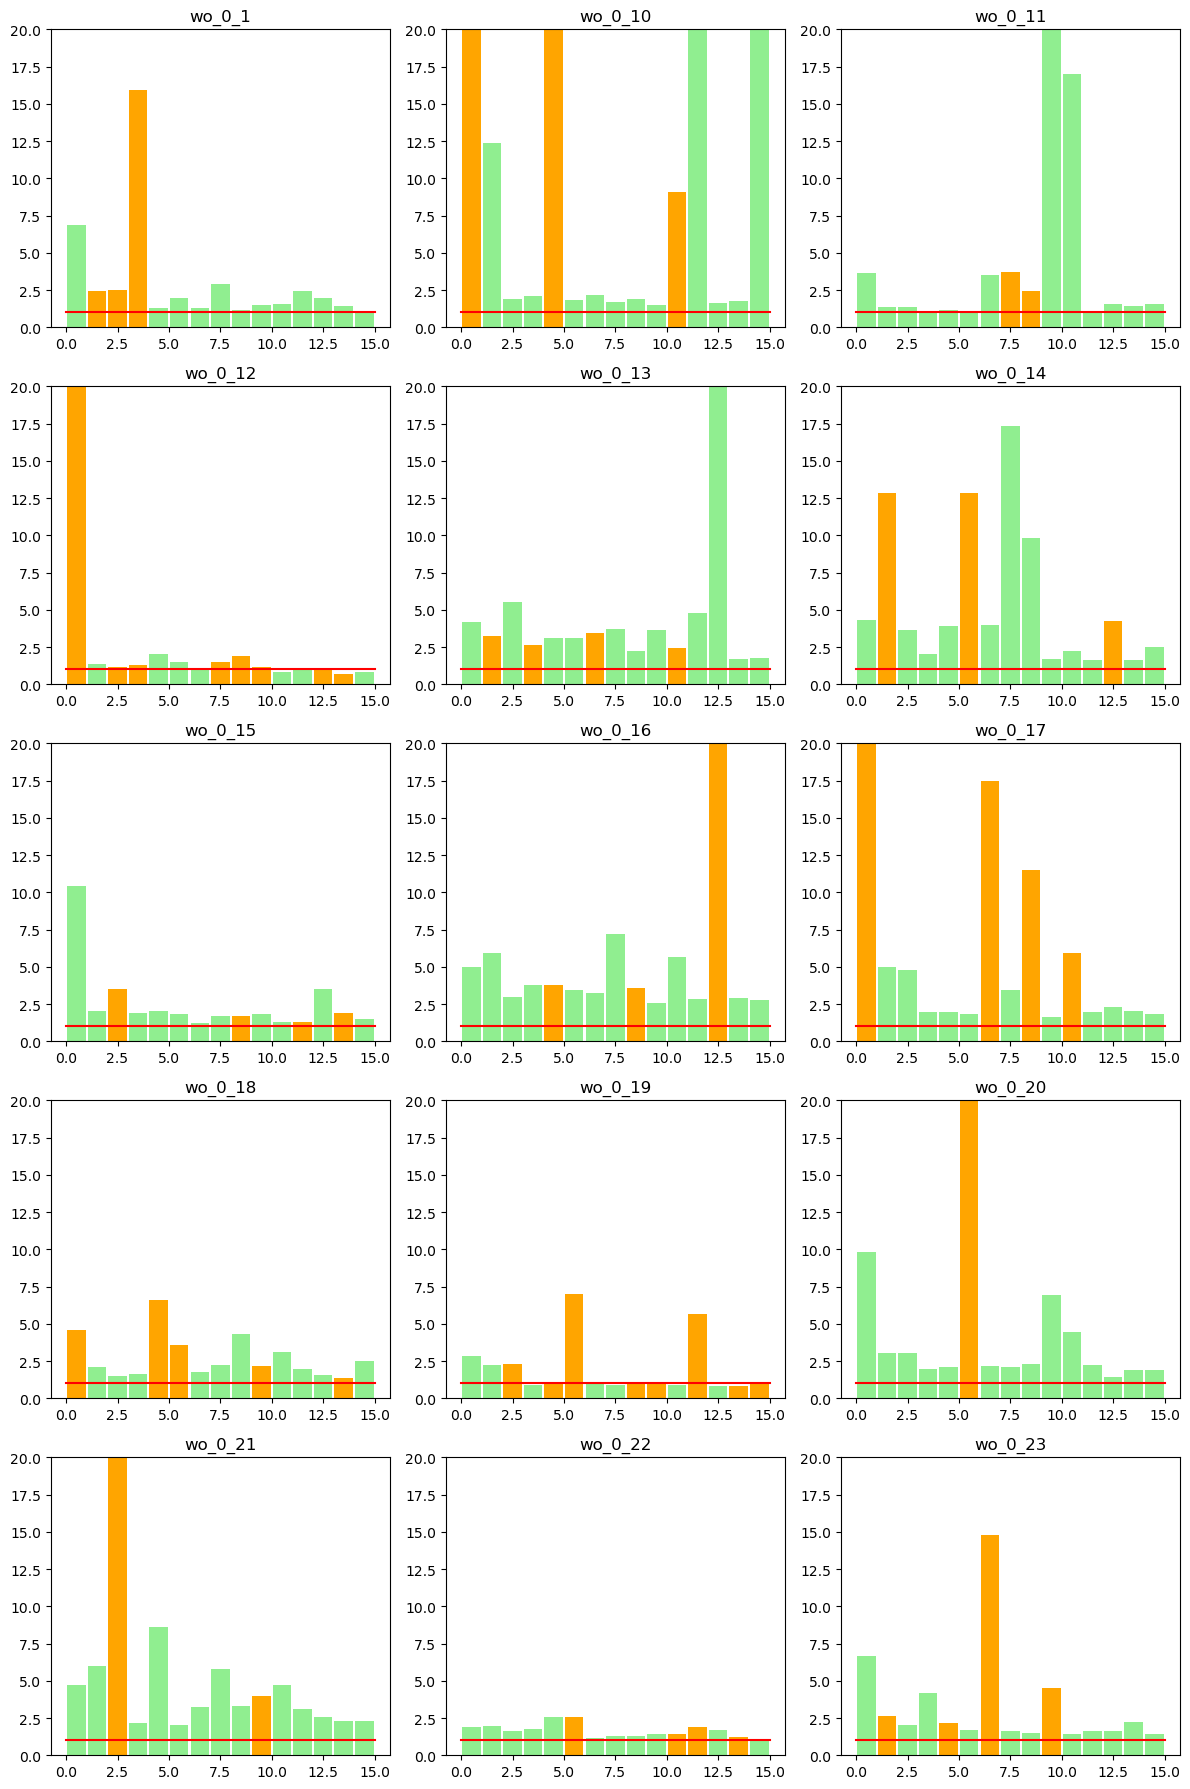

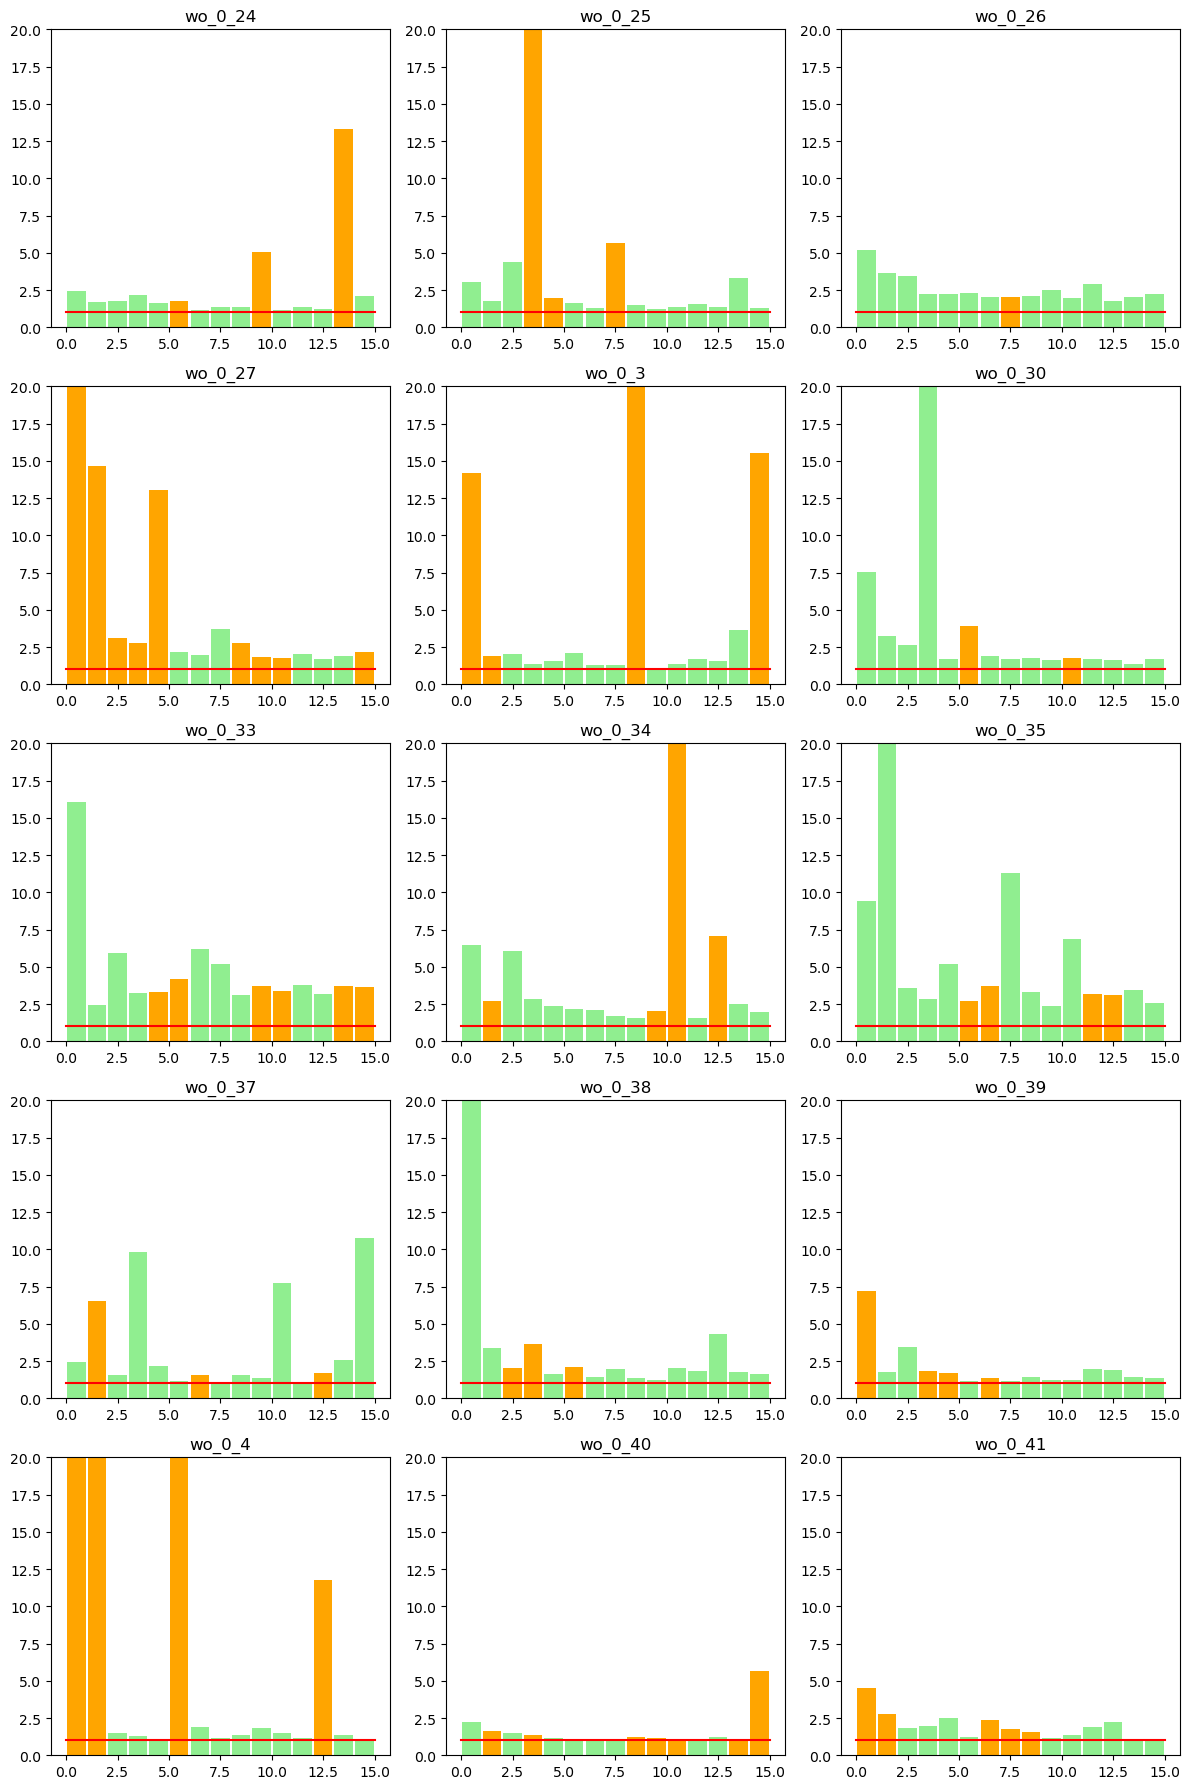

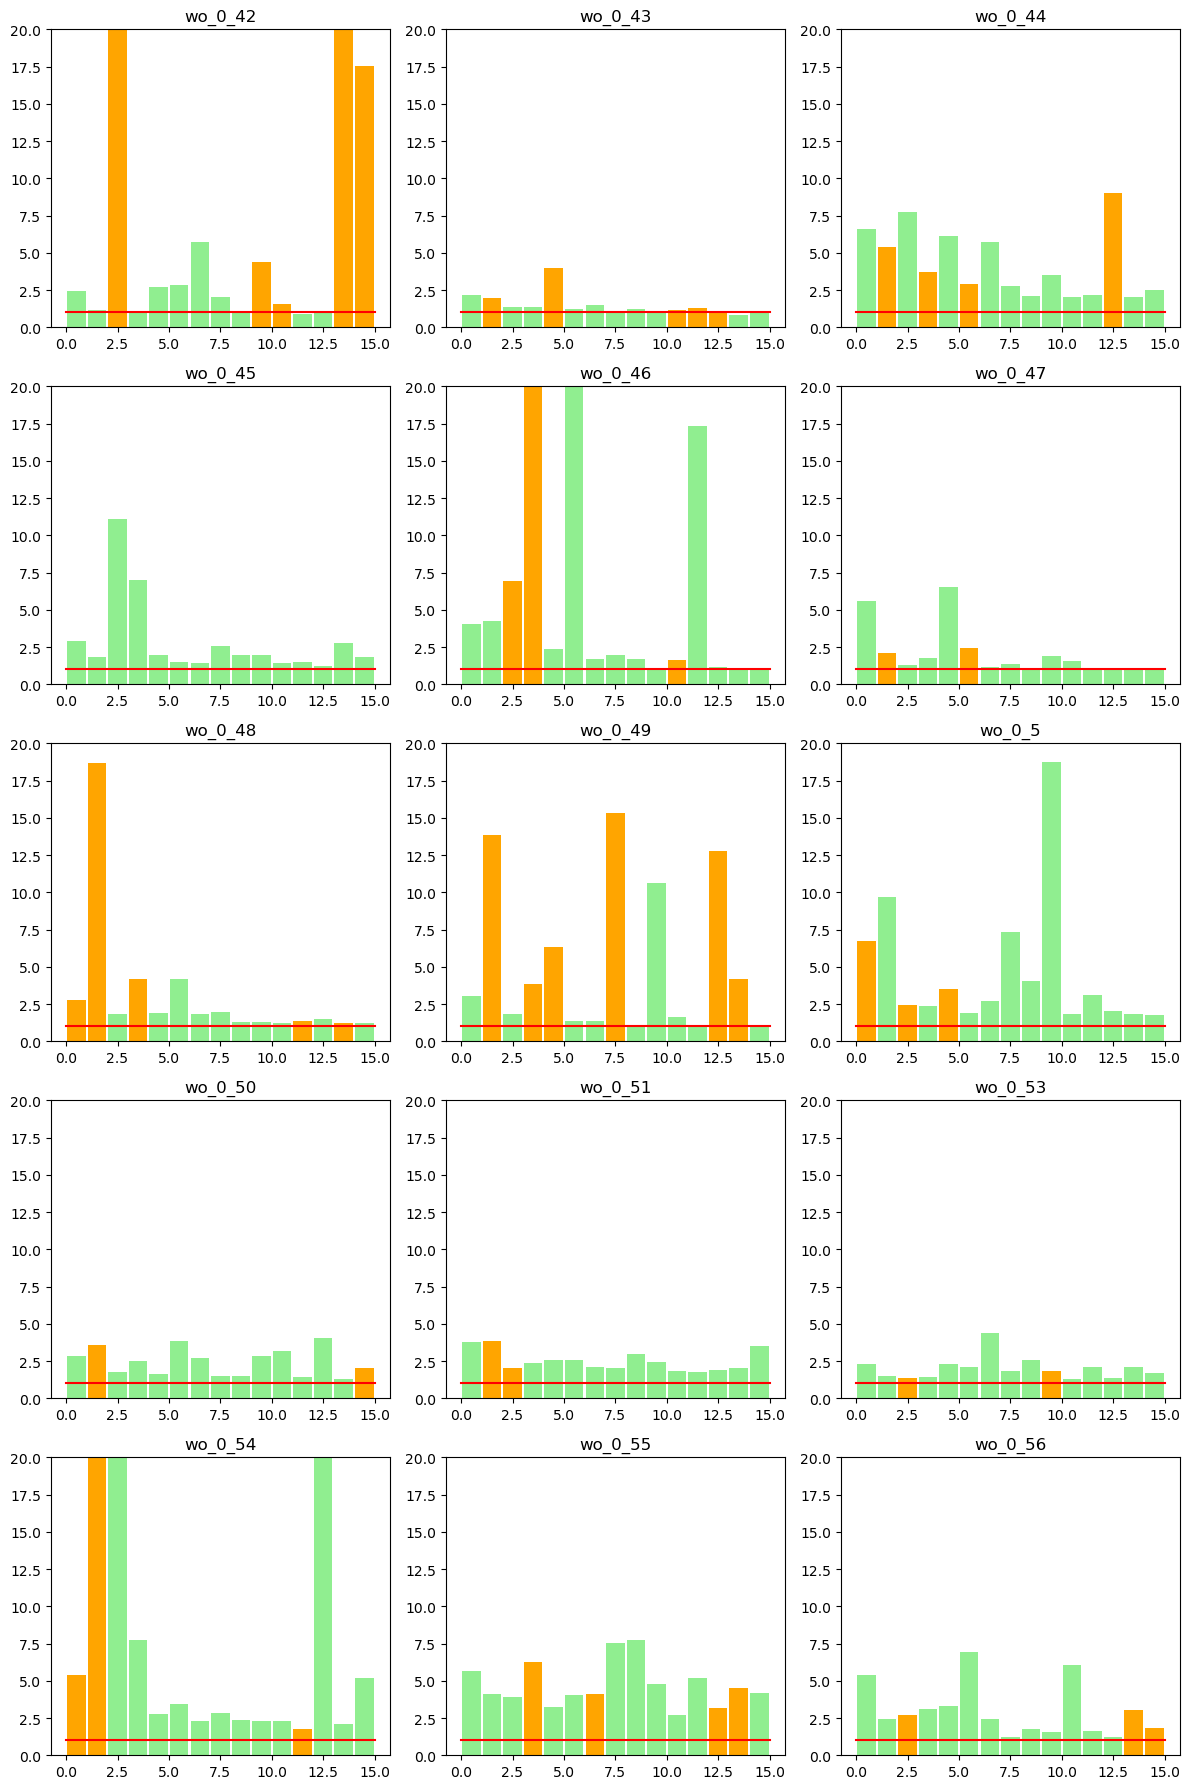

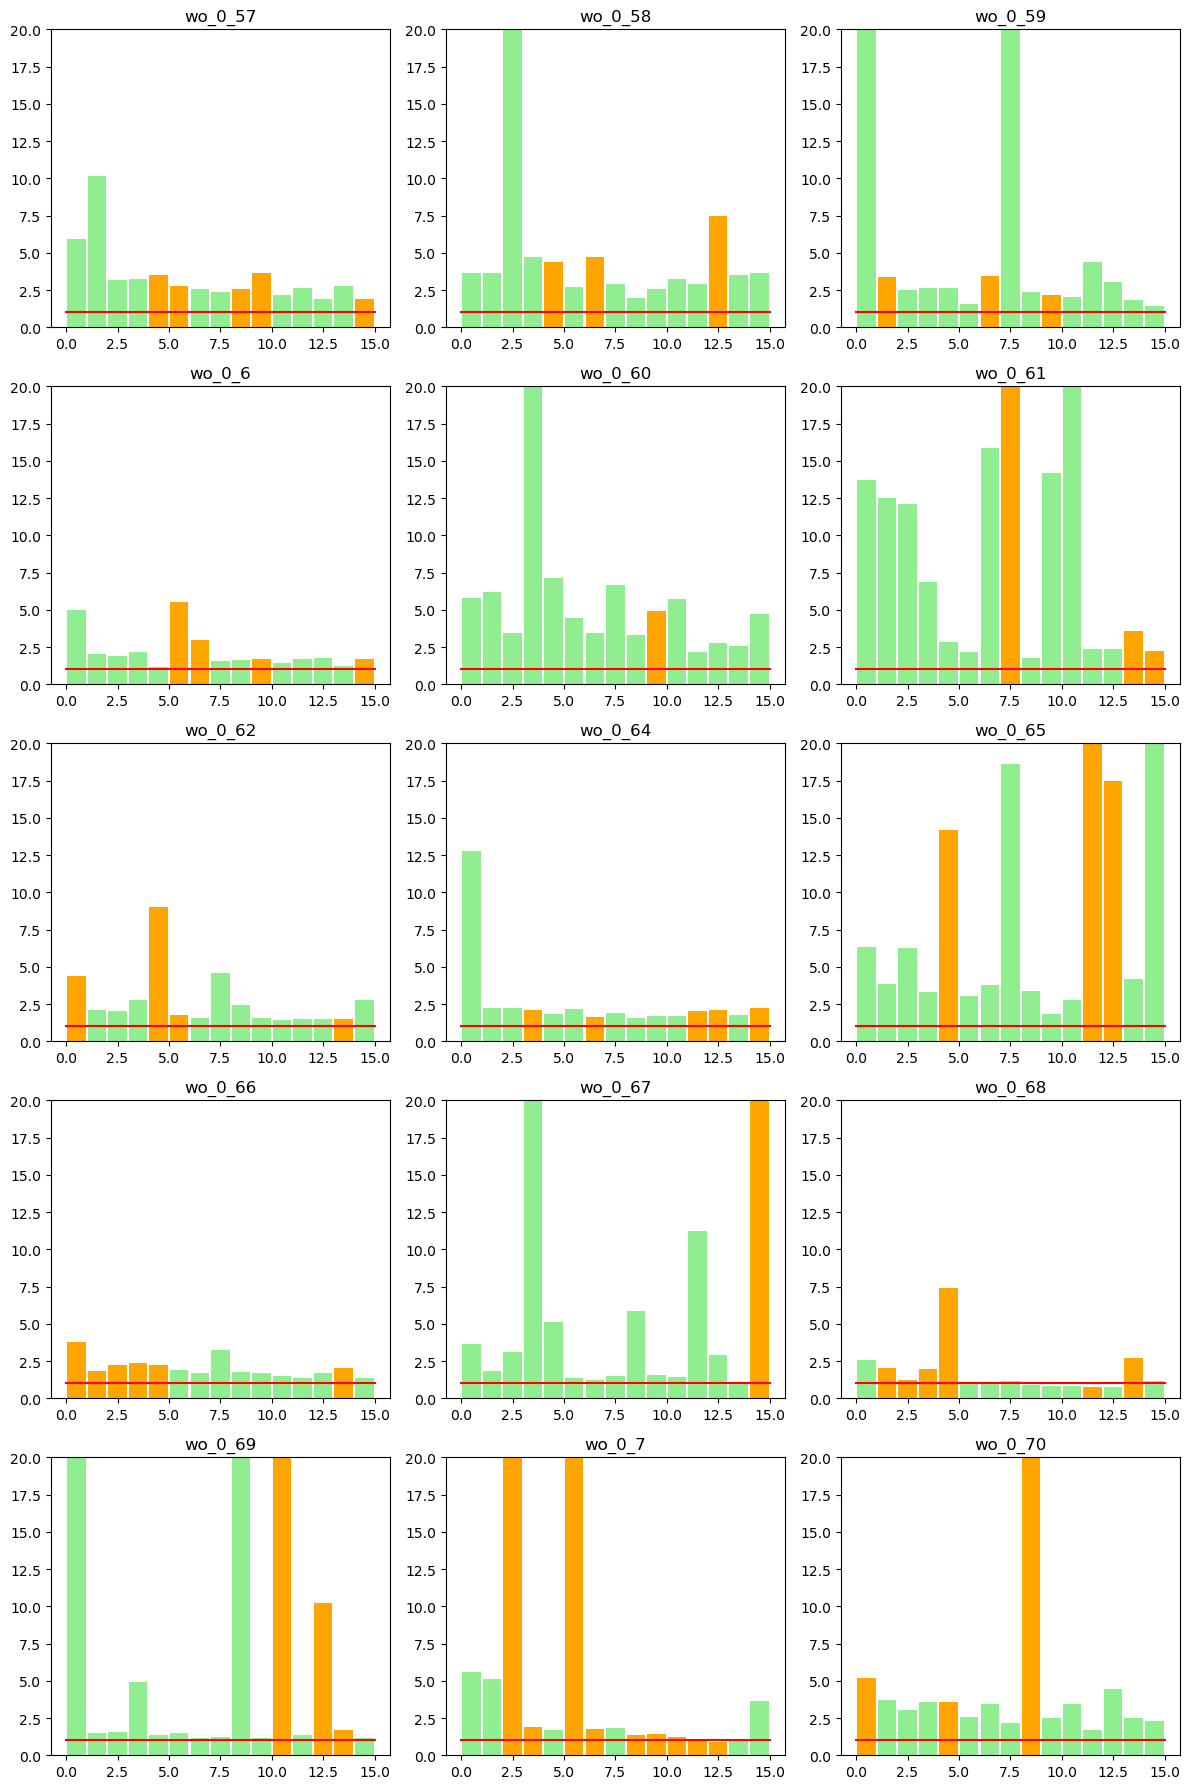

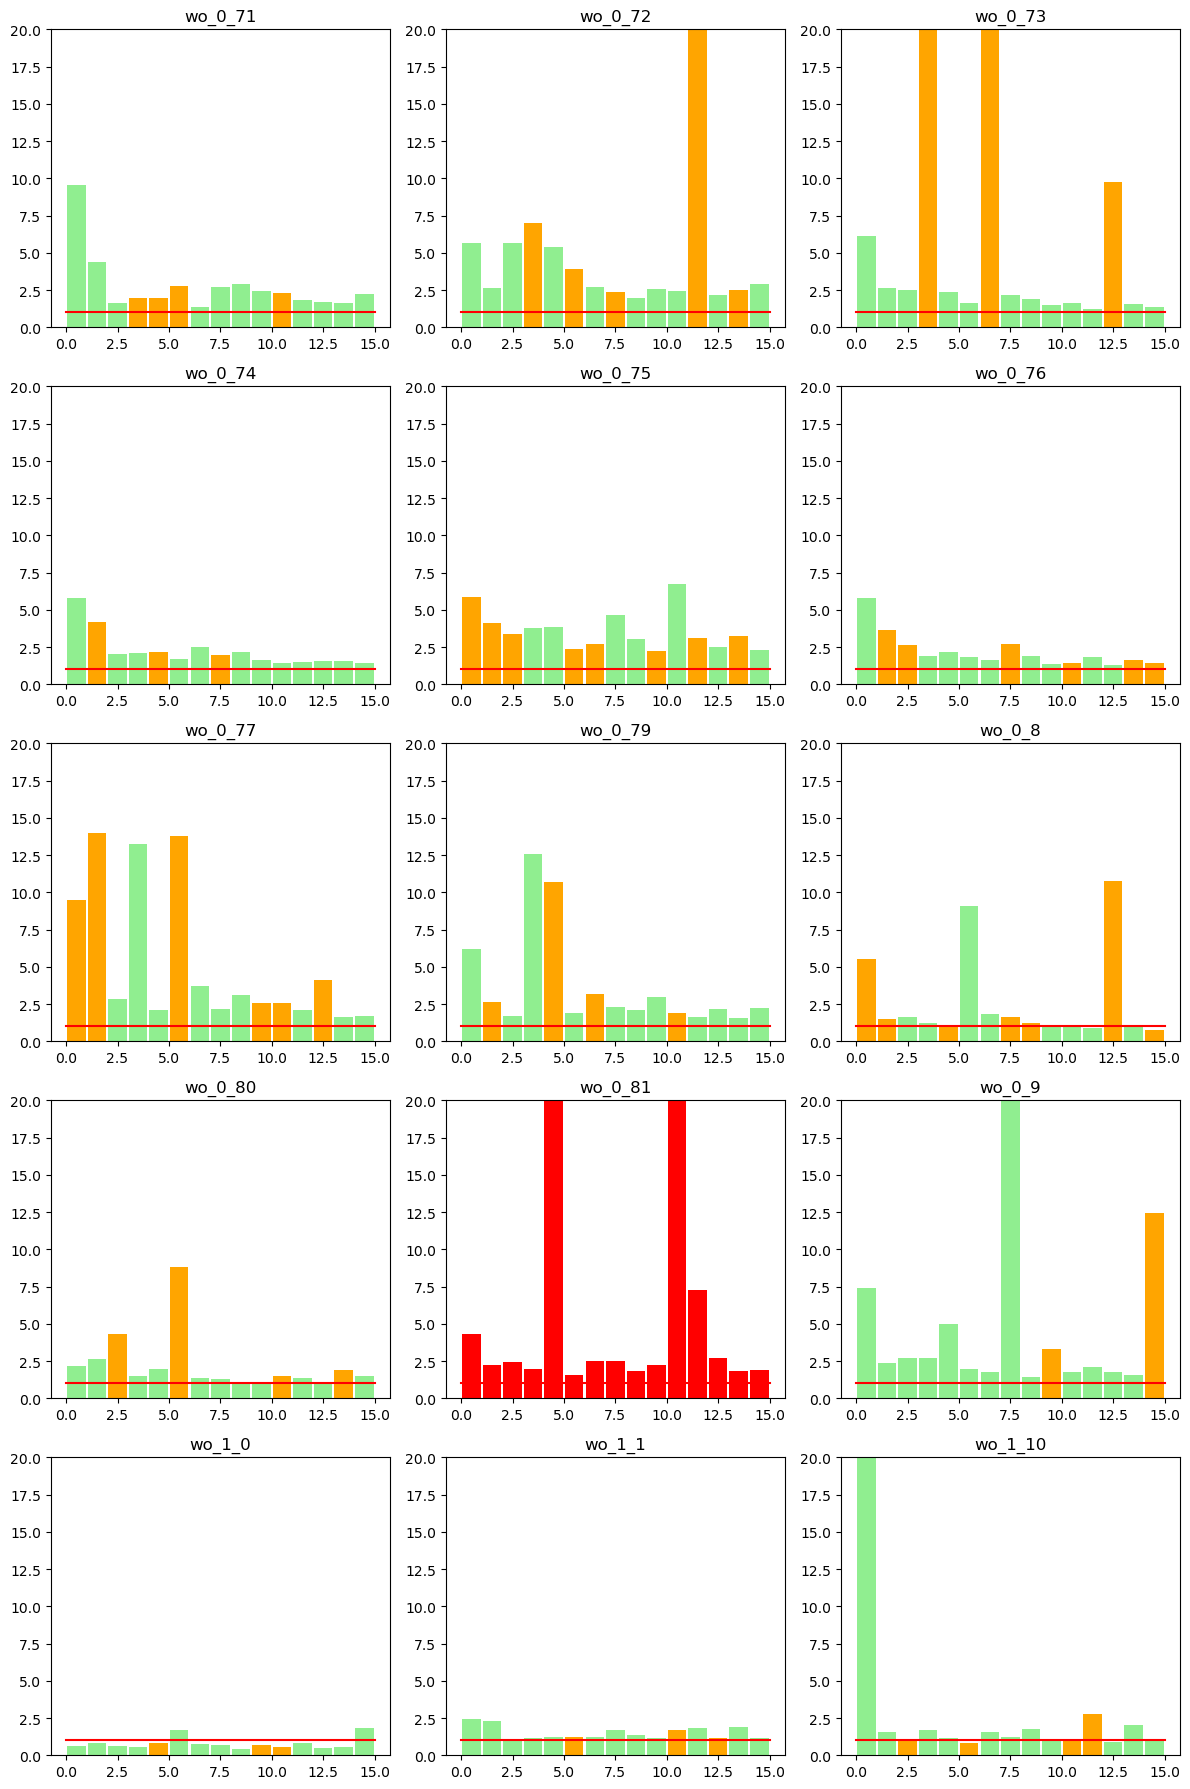

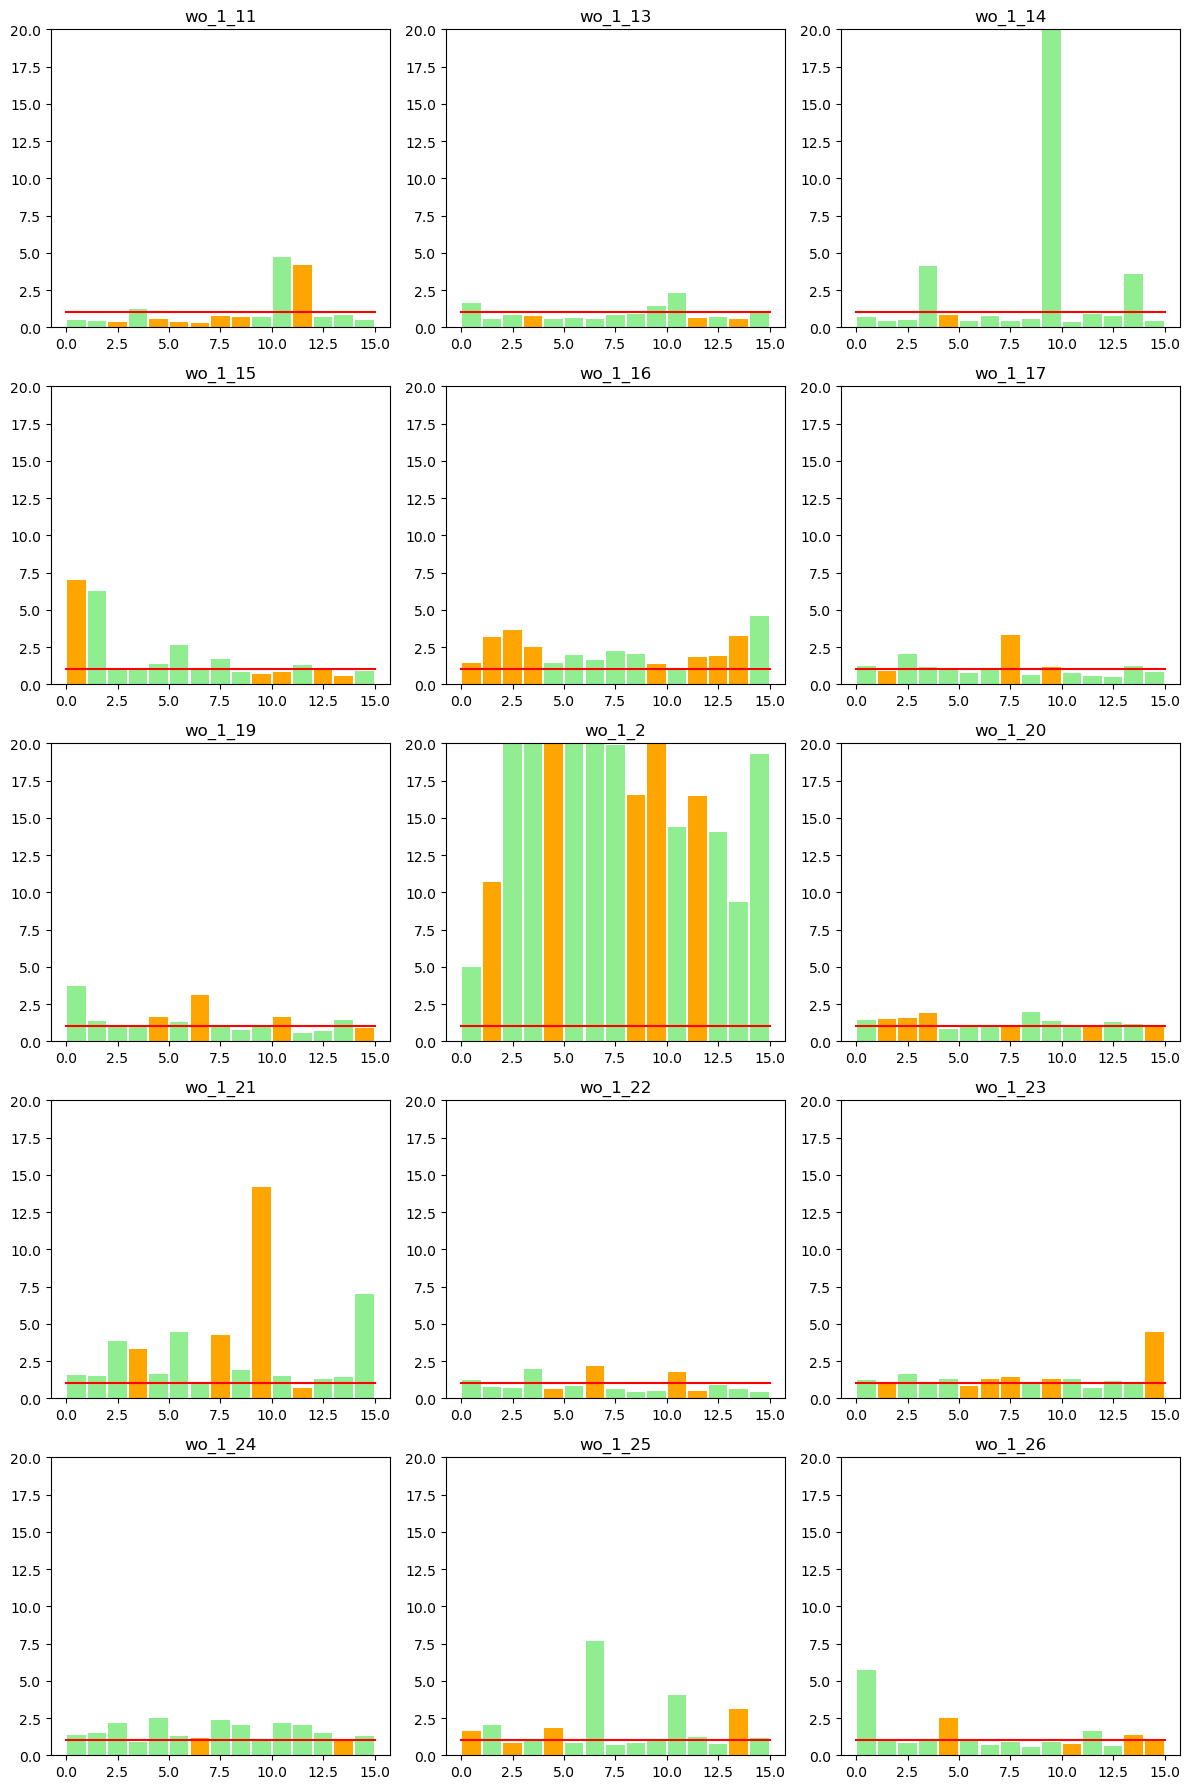

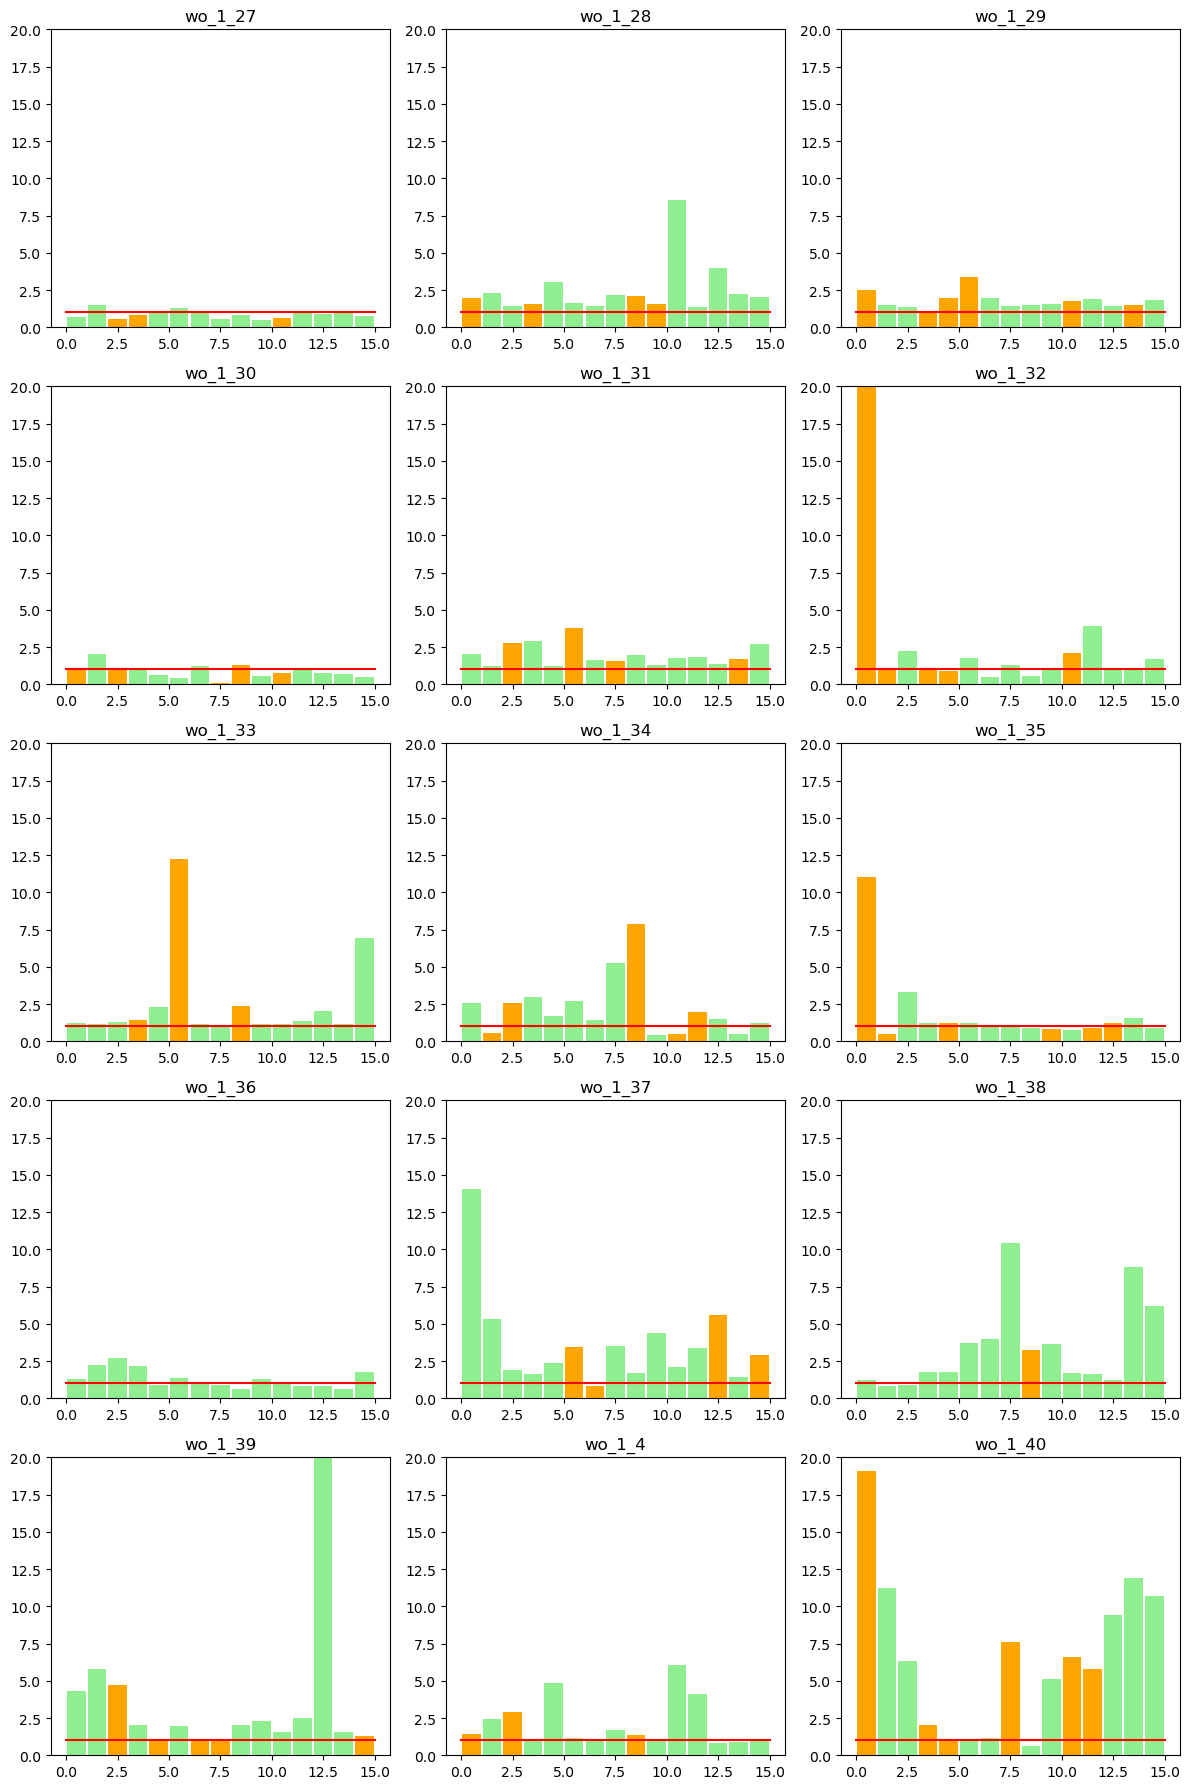

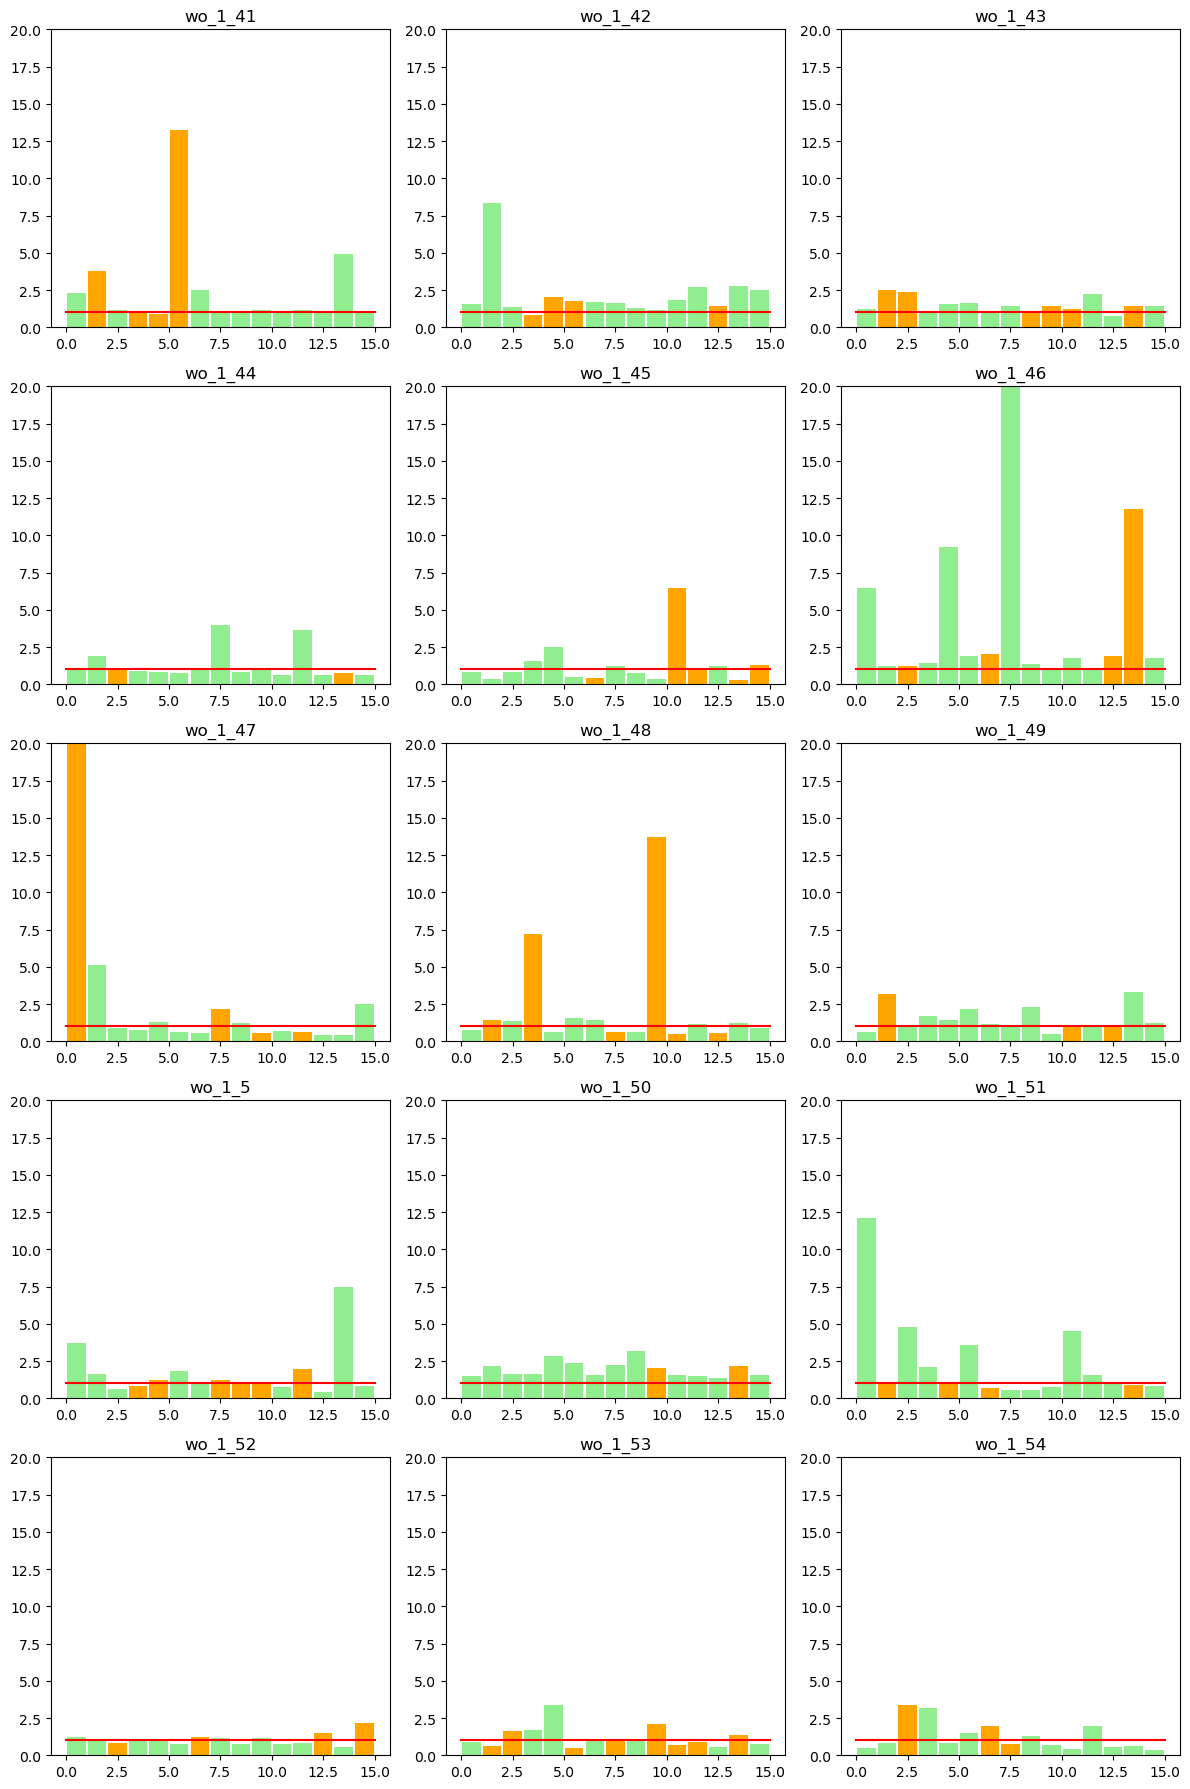

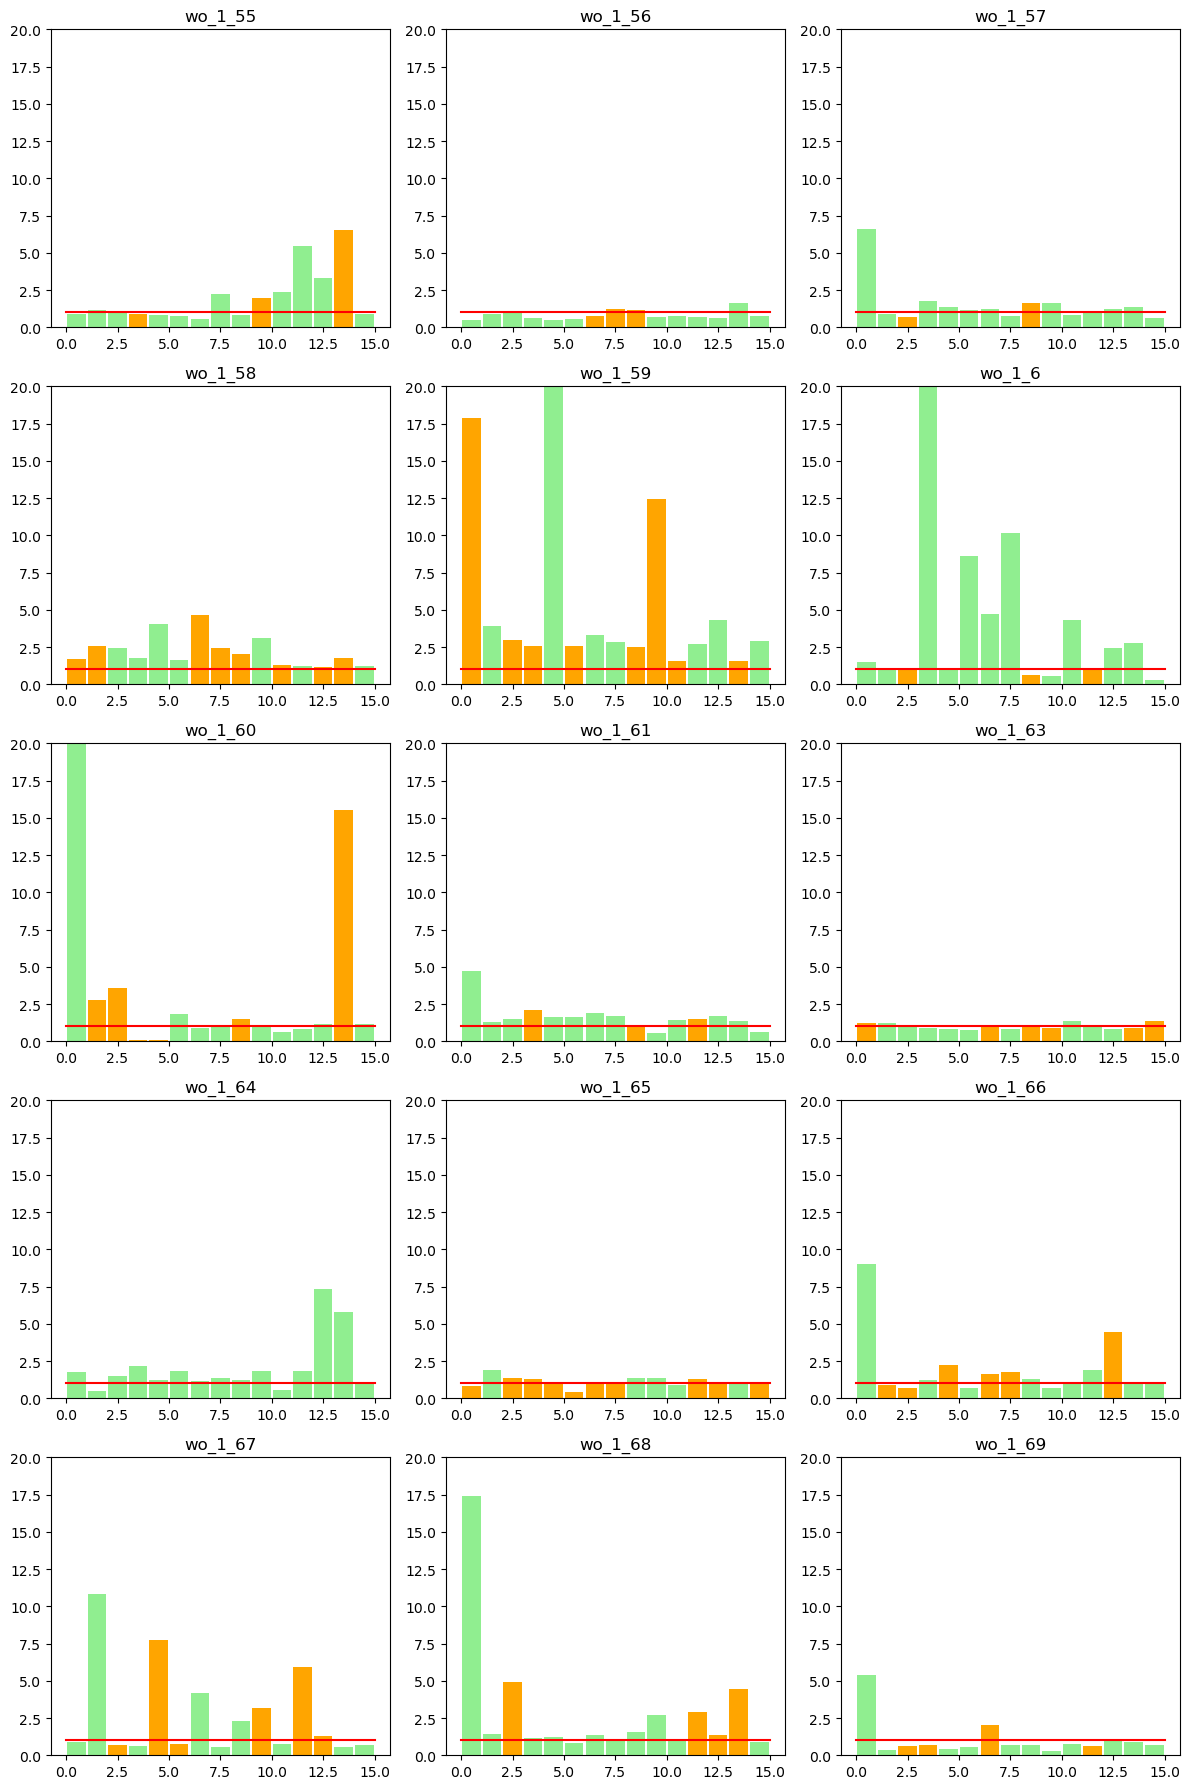

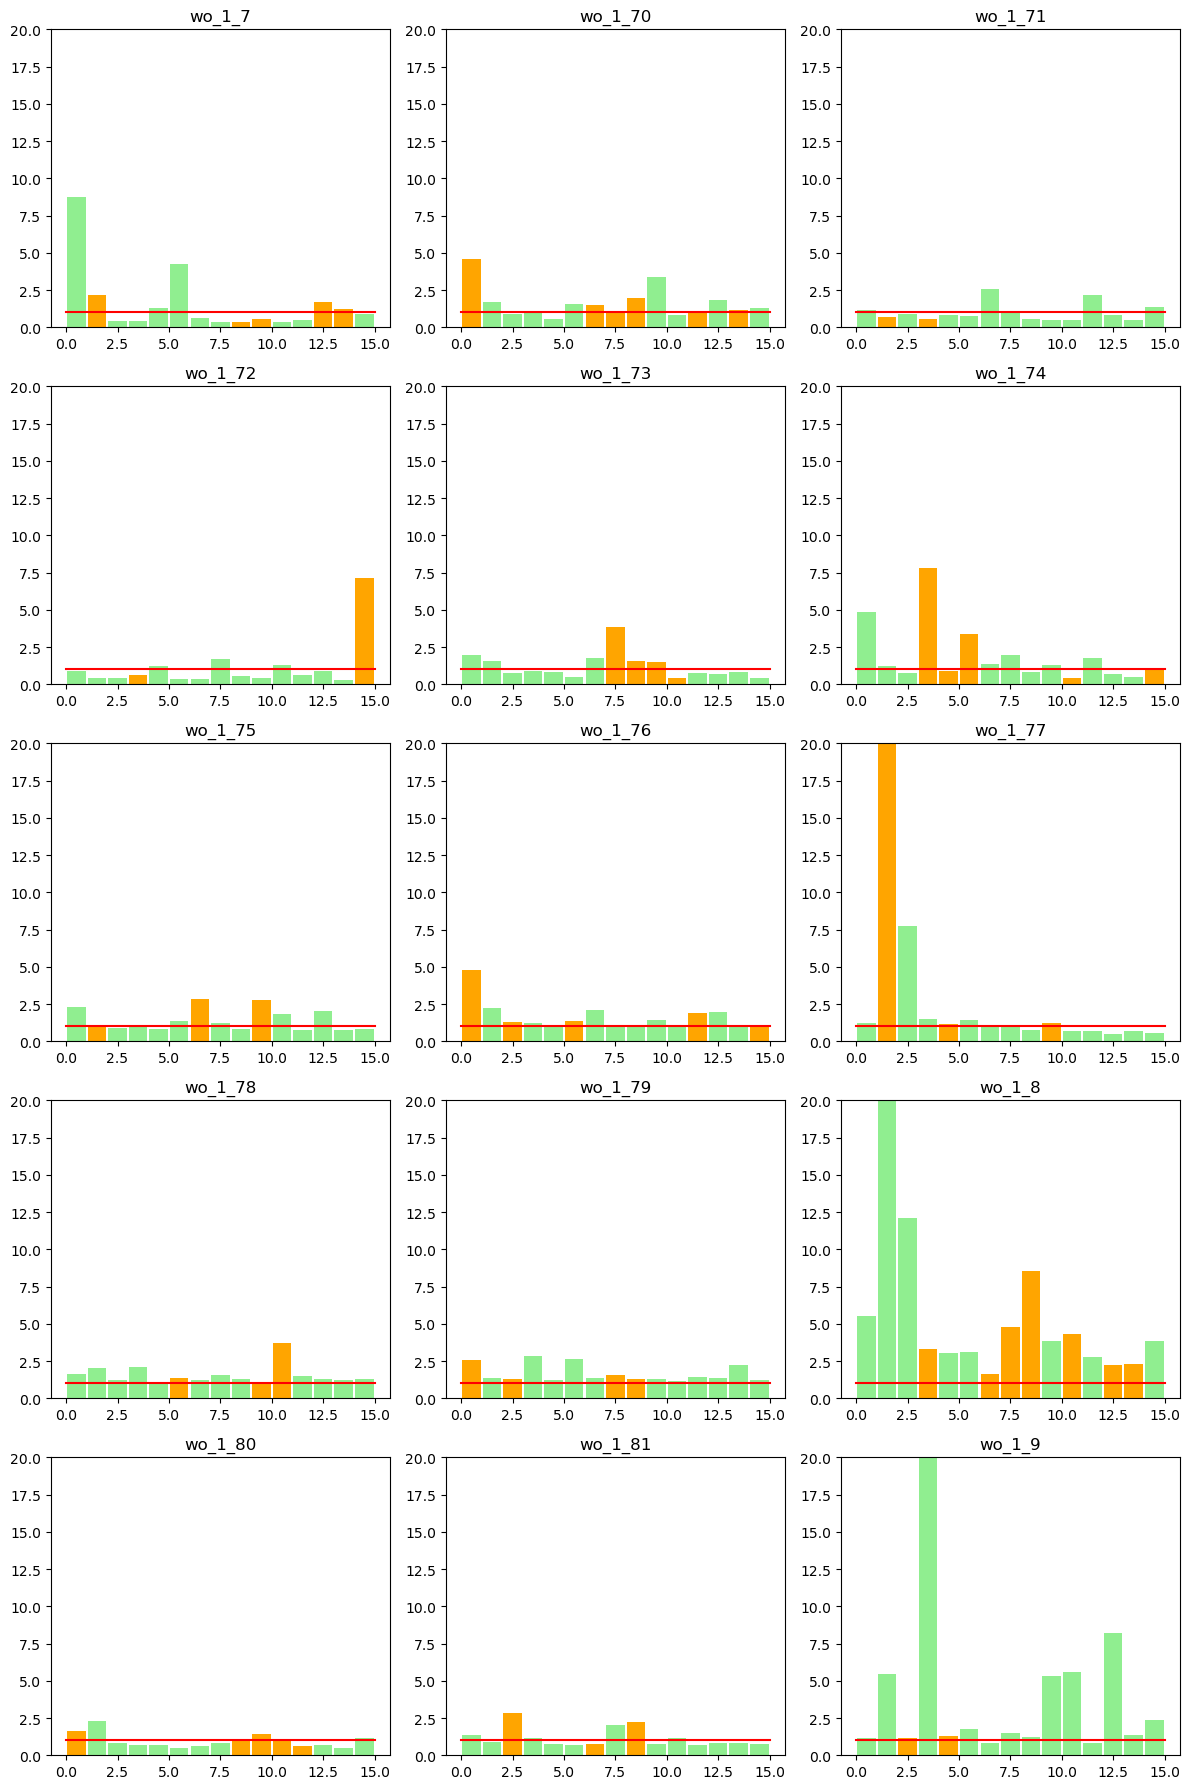

In [36]:
for batch in range(20):
    offset = batch*15
    fig, axs = plt.subplots(ncols = 3, nrows = 5, figsize = (12, 18))
    for row in range(5):
        for col in range(3):
            i = offset + (row*3)+col

            x = 0.5 + np.arange(15)
            y = p_times[participants[i]]
            if not len(y) == 15:
                continue
            
            if participants[i][2] == "0" or participants[i][3] == "i":
                axs[row, col].plot([0,15],[2,2], color = "red")
                axs[row, col].set_ylim(0,40)
            else:
                axs[row, col].plot([0,15],[1,1], color = "red")
                axs[row, col].set_ylim(0,20)
            
            axs[row, col].bar(x, y, width=0.9, color = p_colors[participants[i]])
            
            axs[row, col].set_title(participants[i])
    plt.tight_layout()
    plt.show()

Above we can see the data for all participants. Group 0 is shown in range 0-20s with a marker line at 2s; Group 1 in range 0 to 10s with a marker line at 1s. 

Green indicates same decision as AI, orange a different decision. 

Particpants in all red are those that are already removed from results because their demographic data didn't arrive correctly.

Can we identify any who should be removed based on their answer patterns? Add below:

In [37]:
weird_answer_patters = ["w_0_42", "w_0_48", "w_0_74", "w_1_30", "w_1_34", 
                        "w_1_71", "wo_1_14", "wo_1_60"]

## Removal

Now, lets see if there is any overlap between the people who always answered grad, who have visually weird answer patterns, or who have a very low median or mean task time.

In [38]:
print(weird_answer_patters)
print(list(results[results["grad_ratio"] == 1].index))

print("Group 0 low times:")
print(list(results[((results["priming_group"] == 0) & (results["time_per_task_median"]<3))].index))

print("Group 1 low times:")
print(list(results[((results["priming_group"] == 1) & (results["time_per_task_median"]<1))].index))

['w_0_42', 'w_0_48', 'w_0_74', 'w_1_30', 'w_1_34', 'w_1_71', 'wo_1_14', 'wo_1_60']
['wo_1_43', 'wo_1_66']
Group 0 low times:
['wo_0_1', 'wo_0_4', 'wo_0_6', 'wo_0_7', 'wo_0_8', 'wo_0_11', 'wo_0_12', 'wo_0_15', 'wo_0_19', 'wo_0_22', 'wo_0_23', 'wo_0_24', 'wo_0_25', 'wo_0_26', 'wo_0_30', 'wo_0_37', 'wo_0_38', 'wo_0_39', 'wo_0_40', 'wo_0_41', 'wo_0_43', 'wo_0_45', 'wo_0_47', 'wo_0_48', 'wo_0_53', 'wo_0_62', 'wo_0_66', 'wo_0_68', 'wo_0_69', 'wo_0_73', 'wo_0_74', 'wo_0_76', 'wo_0_80', 'w_0_11', 'w_0_24', 'w_0_30', 'w_0_42', 'w_0_48', 'w_0_65', 'w_0_74']
Group 1 low times:
['wo_1_0', 'wo_1_7', 'wo_1_11', 'wo_1_13', 'wo_1_14', 'wo_1_22', 'wo_1_26', 'wo_1_27', 'wo_1_30', 'wo_1_44', 'wo_1_45', 'wo_1_47', 'wo_1_52', 'wo_1_54', 'wo_1_55', 'wo_1_56', 'wo_1_63', 'wo_1_67', 'wo_1_69', 'wo_1_71', 'wo_1_72', 'wo_1_73', 'wo_1_80', 'wo_1_81', 'w_1_4', 'w_1_5', 'w_1_30', 'w_1_34', 'w_1_37', 'w_1_39', 'w_1_50', 'w_1_52', 'w_1_57', 'w_1_60', 'w_1_64', 'w_1_67']


The following participants have weird answer patterns and also really low median time:

In [39]:
#results_filtered = results[results["grad_ratio"] != 1]
#results_filtered = results_filtered[~((results_filtered["priming_group"] == 0) & (results_filtered["time_per_task"]<3))]
#results_filtered = results_filtered[~((results_filtered["priming_group"] == 1) & (results_filtered["time_per_task"]<1))]
#results_filtered.shape

filter_participants = ['w_0_42', 'w_0_48', 'w_0_74', 'w_1_30', 'w_1_34', 'wo_1_14']
results_filtered = results.drop(filter_participants)
results_filtered

,file,explanation_group,priming_group,participant_number,final_accuracy,ai_agreement,n_na,n_wt,n_wmt,n_ut,...,wt_ratio,total_trust,fai,com,rel,time_per_task,time_per_task_user,time_per_task_final,time_per_task_median,grad_ratio
wo_0_0,explanations_wo/0_0.csv,wo,0,0,0.466667,0.600000,7,0,1,5,...,0.000000,0.250000,-0.2,0.75,0.333333,3.353436,0.725426,2.628010,3.149200,0.600000
wo_0_1,explanations_wo/0_1.csv,wo,0,1,0.800000,0.800000,9,2,2,1,...,0.666667,-0.250000,-1.0,0.25,0.333333,4.425740,1.346242,3.079498,2.602590,0.666667
wo_0_3,explanations_wo/0_3.csv,wo,0,3,0.866667,0.733333,10,1,3,1,...,0.500000,-0.666667,-1.0,-0.50,-0.333333,6.221536,1.325001,4.896535,3.184887,0.600000
wo_0_4,explanations_wo/0_4.csv,wo,0,4,1.000000,0.733333,10,1,4,0,...,1.000000,0.000000,-0.4,0.25,0.333333,8.652404,0.962349,7.690055,1.866513,0.733333
wo_0_5,explanations_wo/0_5.csv,wo,0,5,0.800000,0.800000,8,3,2,1,...,0.750000,0.583333,0.8,0.50,0.333333,6.889090,2.224270,4.664820,4.470461,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
w_1_74,explanations_w/1_74.csv,w,1,74,0.866667,0.733333,0,10,3,1,...,0.909091,-1.500000,-0.8,-2.00,-2.000000,2.174590,NaN,NaN,1.094533,0.866667
w_1_75,explanations_w/1_75.csv,w,1,75,0.733333,0.733333,0,9,2,2,...,0.818182,0.250000,0.2,0.25,0.333333,3.138306,NaN,NaN,2.340623,0.733333
w_1_76,explanations_w/1_76.csv,w,1,76,0.800000,0.666667,0,9,3,2,...,0.818182,0.083333,-0.4,0.00,1.000000,2.032701,NaN,NaN,1.301402,0.933333
w_1_77,explanations_w/1_77.csv,w,1,77,0.800000,0.800000,0,10,2,1,...,0.909091,-0.333333,-0.2,-0.25,-0.666667,3.636001,NaN,NaN,2.098175,0.800000


In [40]:
results_backup = results.copy()
results = results_filtered
print(results.shape, results_backup.shape)

(292, 34) (298, 34)


In [41]:
results = results_backup
print(results.shape)

(298, 34)


In [42]:
# redo the split
# split into separate dataframes for easy access

# could do with filtered results here
# however, weirdly enough, there is still not any noticeable difference in the results below
# I think it really doesn't matter

results_0 = results[results["priming_group"] == 0]
results_1 = results[results["priming_group"] == 1]
results_w = results[results["explanation_group"] == "w"]
results_wo = results[results["explanation_group"] == "wo"]

results_w_0 = results_0[results_0["explanation_group"] == "w"]
results_w_1 = results_1[results["explanation_group"] == "w"]
results_wo_0 = results_0[results_0["explanation_group"] == "wo"]
results_wo_1 = results_1[results["explanation_group"] == "wo"]

print(results_w_0.shape)
print(results_w_1.shape)
print(results_wo_0.shape)
print(results_wo_1.shape)

# save extended dataframe

results.to_csv("results.csv")

(74, 34)
(74, 34)
(72, 34)
(78, 34)


C:\Users\rringe\AppData\Local\Temp\ipykernel_28464\1326010054.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_w_1 = results_1[results["explanation_group"] == "w"]
C:\Users\rringe\AppData\Local\Temp\ipykernel_28464\1326010054.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_wo_1 = results_1[results["explanation_group"] == "wo"]


In [43]:
results.columns

Index(['file', 'explanation_group', 'priming_group', 'participant_number',
       'final_accuracy', 'ai_agreement', 'n_na', 'n_wt', 'n_wmt', 'n_ut',
       'n_ot', 'Prolific ID', 'time_taken', 'language', 'total_approvals',
       'priming', 'user_accuracy', 'AI_knowledge', 'perceived_accuracy',
       'perceived_domain_knowledge', 'switch_ratio', 'switch_not_ratio',
       'ot_ratio', 'ut_ratio', 'wt_ratio', 'total_trust', 'fai', 'com', 'rel',
       'time_per_task', 'time_per_task_user', 'time_per_task_final',
       'time_per_task_median', 'grad_ratio'],
      dtype='object')

# Visualization

## Comparisons between groups

First, lets make some graphics where we can see all four group, or compare either explanation or bias across the whole sample population.

In [44]:
def compare_priming_groups(column, violin = False):
    
    print(column.upper())
    print("- priming - ")
    
    print(stats.ttest_ind(results_0[column], results_1[column]))

    fig, ax = plt.subplots()
    if violin:
        VP = ax.violinplot([results_0[column], results_1[column]])#, labels = ["no priming", "priming"])
    else:
        VP = ax.boxplot([results_0[column], results_1[column]])#, labels = ["no priming", "priming"])
    ax.set_xticks([1, 2], labels=["w/o priming", "w/ priming"])
    ax.set_title(column)
    plt.show()
    
def compare_explanation_groups(column, violin = False):
    
    print(column.upper())
    print("- explanation - ")
    
    print(stats.ttest_ind(results_w[column], results_wo[column]))

    fig, ax = plt.subplots()
    if violin:
        VP = ax.violinplot([results_wo[column], results_w[column]])#, labels = ["w/ explanation", "w/o explanation"])
    else:
        VP = ax.boxplot([results_wo[column], results_w[column]])#, labels = ["w/ explanation", "w/o explanation"])
    ax.set_xticks([1, 2], labels=["w/o explanation", "w/ explanation"])
    ax.set_title(column)
    plt.show()
    
def compare_all_groups(column, violin = False, title = None, y_range = None):
    
    print(column.upper())
    
    print("Difference based on priming/no priming:")
    print(stats.ttest_ind(results_0[column].dropna(), results_1[column].dropna()))
    print("- for without explanation group:")
    print(stats.ttest_ind(results_wo_0[column].dropna(), results_wo_1[column].dropna()))
    print("- for with explanation group")
    print(stats.ttest_ind(results_w_0[column].dropna(), results_w_1[column].dropna()))
    print()
    print("Difference based on explanation/no explanation:")
    print(stats.ttest_ind(results_w[column].dropna(), results_wo[column].dropna()))
    print("- for without priming group:")
    print(stats.ttest_ind(results_wo_0[column].dropna(), results_w_0[column].dropna()))
    print("- for with priming group")
    print(stats.ttest_ind(results_wo_1[column].dropna(), results_w_1[column].dropna()))
    print()
    
    
    
    #print(stats.ttest_ind(results_w[column], results_wo[column]))

    fig, ax = plt.subplots(figsize = (4,6))
    if violin:
        VP = ax.violinplot([results_wo_0[column], results_wo_1[column], results_w_0[column], results_w_1[column]])
    else:
        VP = ax.boxplot([results_wo_0[column].dropna(), results_wo_1[column].dropna(), 
                         results_w_0[column].dropna(), results_w_1[column].dropna()])
    ax.set_xticks([1, 2, 3, 4], 
                  labels=["w/o priming \n w/o expl.", 
                          "w/ priming \n w/o expl.", 
                          "w/o priming \n w/ expl.", 
                          "w/ priming \n w/ expl."])
    ax.tick_params(axis='x', which='major', labelsize=9)
    #ax.tick_params(axis='both', which='minor', labelsize=8)
    if not title is None:
        ax.set_title(title)
    else:
        ax.set_title(column)
    if not y_range is None:
        ax.set_ylim(y_range[0], y_range[1])
    plt.show()
        
   

FINAL_ACCURACY
Difference based on priming/no priming:
TtestResult(statistic=-1.4037406541889186, pvalue=0.16144434182201384, df=296.0)
- for without explanation group:
TtestResult(statistic=-1.9553442567456851, pvalue=0.052426200021923275, df=148.0)
- for with explanation group
TtestResult(statistic=0.10385208339950427, pvalue=0.917429255164117, df=146.0)

Difference based on explanation/no explanation:
TtestResult(statistic=0.09930057261623092, pvalue=0.9209668401288491, df=296.0)
- for without priming group:
TtestResult(statistic=-1.1312303535810793, pvalue=0.2598385863330597, df=144.0)
- for with priming group
TtestResult(statistic=1.0332571435818798, pvalue=0.30314659498661006, df=150.0)



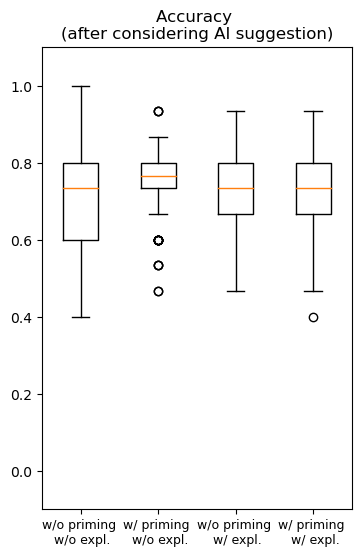

In [45]:
compare_all_groups("final_accuracy", violin = False, 
                   title = "Accuracy \n(after considering AI suggestion)", y_range = [-0.1, 1.1])

TOTAL_TRUST
Difference based on priming/no priming:
TtestResult(statistic=1.3564553159955146, pvalue=0.1759880378170022, df=296.0)
- for without explanation group:
TtestResult(statistic=-0.5121742881738043, pvalue=0.6092924888935385, df=148.0)
- for with explanation group
TtestResult(statistic=2.1473331757795844, pvalue=0.03341784800462773, df=146.0)

Difference based on explanation/no explanation:
TtestResult(statistic=-0.08069996691032538, pvalue=0.9357350989347074, df=296.0)
- for without priming group:
TtestResult(statistic=-1.4393339944618317, pvalue=0.15222615684687588, df=144.0)
- for with priming group
TtestResult(statistic=1.41100770492706, pvalue=0.16031300504658583, df=150.0)



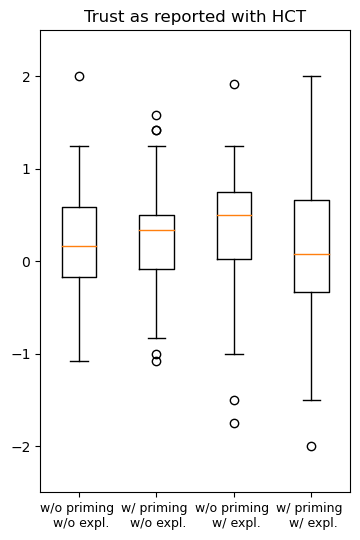

In [46]:
compare_all_groups("total_trust", violin = False, title = "Trust as reported with HCT", y_range = [-2.5, 2.5])

AI_AGREEMENT
Difference based on priming/no priming:
TtestResult(statistic=1.888099187901052, pvalue=0.059990498800962896, df=296.0)
- for without explanation group:
TtestResult(statistic=0.9216690176730125, pvalue=0.3582012329969604, df=148.0)
- for with explanation group
TtestResult(statistic=1.7241033399192687, pvalue=0.08680579489702236, df=146.0)

Difference based on explanation/no explanation:
TtestResult(statistic=1.0789406066158955, pvalue=0.28149261710802526, df=296.0)
- for without priming group:
TtestResult(statistic=-1.209784707368115, pvalue=0.2283438062719416, df=144.0)
- for with priming group
TtestResult(statistic=-0.3347633991365567, pvalue=0.7382712259539868, df=150.0)



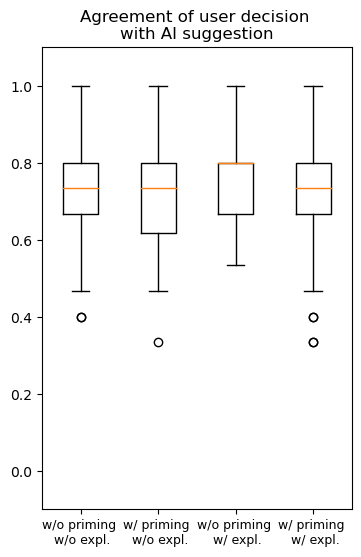

In [47]:
compare_all_groups("ai_agreement", title = "Agreement of user decision \nwith AI suggestion", y_range = [-0.1, 1.1])

## Correlations

In [48]:
def scatter(column_x, column_y, dfs, labels, title = None, x_range = [-0.1,1.1], y_range = [-0.1,1.1]):

    fig, ax = plt.subplots(figsize = (8, 6))
    
    for i, df in enumerate(dfs):
        data_x = []
        data_y = []
        for j, x in enumerate(list(df[column_x])):
            y = list(df[column_y])[j]
            if not (np.isnan(x) or np.isnan(y)):
                data_x.append(x)
                data_y.append(y)
                
        SC = ax.scatter(data_x, data_y, label = labels[i], s = 4)
        print(labels[i])
        pearsons, p = stats.pearsonr(data_x, data_y)
        print(pearsons, "p =", p)
        #if p < 0.05:
        #    m, b = np.polyfit(df[column_x], df[column_y], 1)
        #    trend = ax.plot(x, m*x+b)
    ax.set_xlabel(column_x)
    ax.set_ylabel(column_y)
    ax.set_xlim(x_range[0], x_range[1])
    ax.set_ylim(y_range[0], y_range[1])
    if not title is None:
        ax.set_title(title)
    ax.legend(loc='lower right') #, ncols=3)
    plt.show()
    
def scatter_subplots(column_x, column_y, dfs, labels, ncols, nrows, 
                     x_range = [-0.1,1.1], y_range = [-0.1,1.1]):
    
    fig, axs = plt.subplots(ncols = ncols, nrows = nrows, figsize = (8, 4*nrows))
    if nrows == 1:
        axs = np.array([axs])
    
    for row in range(nrows):
        for col in range(ncols):
            df = dfs[row][col]
            
            data_x = []
            data_y = []
            for j, x in enumerate(list(df[column_x])):
                y = list(df[column_y])[j]
                if not (np.isnan(x) or np.isnan(y)):
                    data_x.append(x)
                    data_y.append(y)
            
            pearsons, p = stats.pearsonr(data_x, data_y)
            print(labels[row][col], pearsons, p)
            if p < 0.05:
                color = "green"
            else:
                color = "grey"
            axs[row, col].scatter(data_x, data_y, c = color)
            axs[row, col].set_title(labels[row][col])
            if row == nrows - 1:
                axs[row, col].set_xlabel(column_x)
            if col == 0:
                axs[row, col].set_ylabel(column_y)
            axs[row, col].set_xlim(x_range[0], x_range[1])
            axs[row, col].set_ylim(y_range[0], y_range[1])
    

w/o priming, w/o explanation 0.1705830251170467 0.15196175485572871
w/o priming, w/ explanation 0.30656418638364796 0.007894208132065457


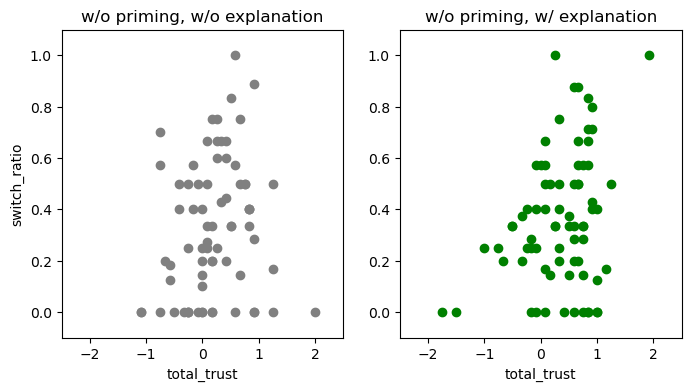

In [49]:
scatter_subplots("total_trust", "switch_ratio", [[results_wo_0, results_w_0]], 
        [["w/o priming, w/o explanation", "w/o priming, w/ explanation"]], 2, 1, x_range = [-2.5,2.5])

w/o priming, w/o explanation 0.26004272977279475 0.02738257376289528
w/o priming, w/ explanation 0.17776480220635602 0.12970832265063986
w/ priming, w/o explanation 0.048601205283689795 0.6726206552955785
w/ priming, w/ explanation 0.3971436254299766 0.000459252313321541


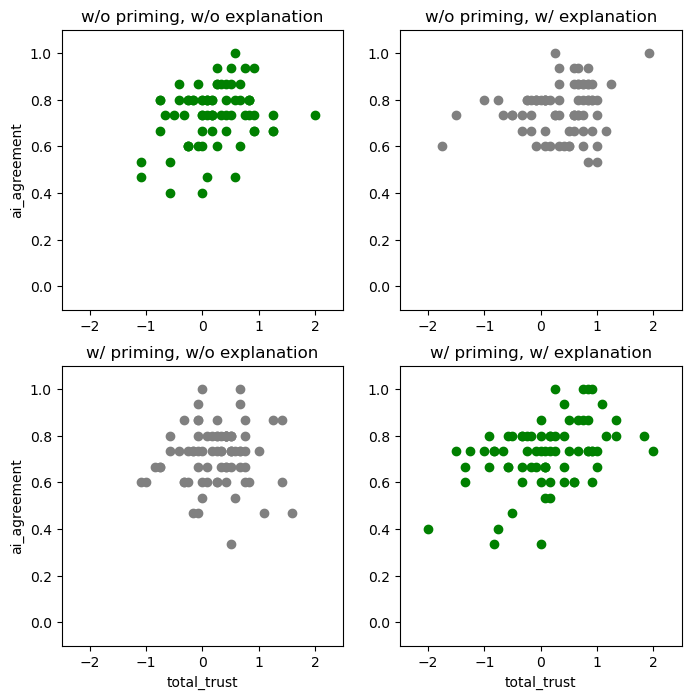

In [50]:
scatter_subplots("total_trust", "ai_agreement", [[results_wo_0, results_w_0],[results_wo_1, results_w_1]], 
        [["w/o priming, w/o explanation", "w/o priming, w/ explanation"],
         ["w/ priming, w/o explanation", "w/ priming, w/ explanation"]],
        ncols = 2, nrows = 2, x_range = [-2.5,2.5])

w/o explanation 0.6801959922524328 4.9772568412359444e-11
w/ explanation 0.717639227714872 6.266153822693965e-13


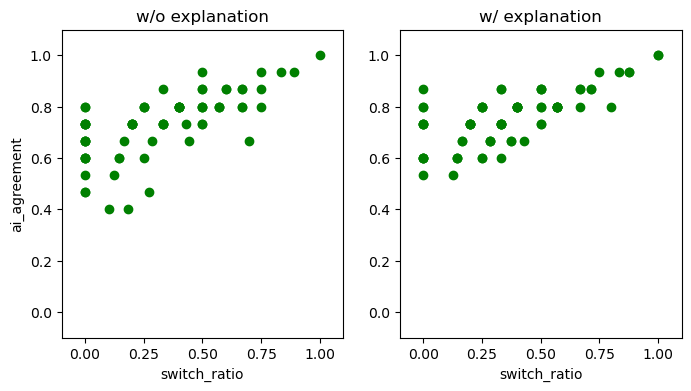

In [51]:
scatter_subplots("switch_ratio", "ai_agreement", [[results_wo_0, results_w_0]], 
        [["w/o explanation", "w/ explanation"]], nrows = 1, ncols = 2)

In [52]:
# Overall correlations:

print("Correlation between reported trust and actual switch ratio:\n")
dfs = [results_0, results_wo_0, results_w_0]
labels = ["all w/o priming", "w/o priming, w/o explanation", "w/o priming, w/ explanation"]
for i, df in enumerate(dfs):
    r, p = stats.pearsonr(df["total_trust"], df["switch_ratio"])
    if p < 0.0125: s = "**"
    elif p < 0.05: s = " *"
    else: s = "  "
    print(labels[i])
    print("Pears:", s, r, p)
    r, p = stats.spearmanr(df["total_trust"], df["switch_ratio"])
    if p < 0.0125: s = "**"
    elif p < 0.05: s = " *"
    else: s = "  "
    print("Spear:", s, r, p)
    print()
    

print("\nCorrelation between reported trust and agreement with AI suggestion:\n")
dfs = [results, results_0, results_1, results_wo, results_w, results_wo_0, results_wo_1, results_w_0, results_w_1]
labels = ["all", "w/o priming", "w/ priming", "w/o explanation", "w/ explanation", 
          "w/o priming, w/o explanation", "w/ priming, w/o explanataion", 
          "w/o priming, w/ explanation", "w/ priming, w/ explanation"]
for i, df in enumerate(dfs):
    r, p = stats.pearsonr(df["total_trust"], df["ai_agreement"])
    if p < 0.0125: s = "**"
    elif p < 0.05: s = " *"
    else: s = "  "
    print(labels[i])
    print("Pears:", s, r, p)
    r, p = stats.spearmanr(df["total_trust"], df["ai_agreement"])
    if p < 0.0125: s = "**"
    elif p < 0.05: s = " *"
    else: s = "  "
    print("Spear:", s, r, p)
    print()


Correlation between reported trust and actual switch ratio:

all w/o priming
Pears: ** 0.24653326564770217 0.002702372709123665
Spear: ** 0.2118684775032796 0.010251616338133386

w/o priming, w/o explanation
Pears:    0.1705830251170467 0.15196175485572871
Spear:    0.2274200376864491 0.054705715306928894

w/o priming, w/ explanation
Pears: ** 0.30656418638364796 0.007894208132065457
Spear:    0.20295648000317787 0.08286957466622527


Correlation between reported trust and agreement with AI suggestion:

all
Pears: ** 0.24896121626049733 1.3717594616823235e-05
Spear: ** 0.21511307343693042 0.00018276653966894723

w/o priming
Pears: ** 0.22849434066772367 0.005537650892408633
Spear:  * 0.1700400885092151 0.04017846503405905

w/ priming
Pears: ** 0.25335809563387357 0.0016362199193791739
Spear: ** 0.23865905615055819 0.003066350649781583

w/o explanation
Pears:    0.1512821574207649 0.06460647102456907
Spear:    0.14620119587255345 0.07422601191278368

w/ explanation
Pears: ** 0.331680669

w/o priming, w/o explanation
0.26004272977279475 p = 0.02738257376289528
w/ priming, w/o explanataion
0.048601205283689795 p = 0.6726206552955785
w/o priming, w/ explanation
0.17776480220635602 p = 0.12970832265063986
w/ priming, w/ explanation
0.3971436254299766 p = 0.000459252313321541


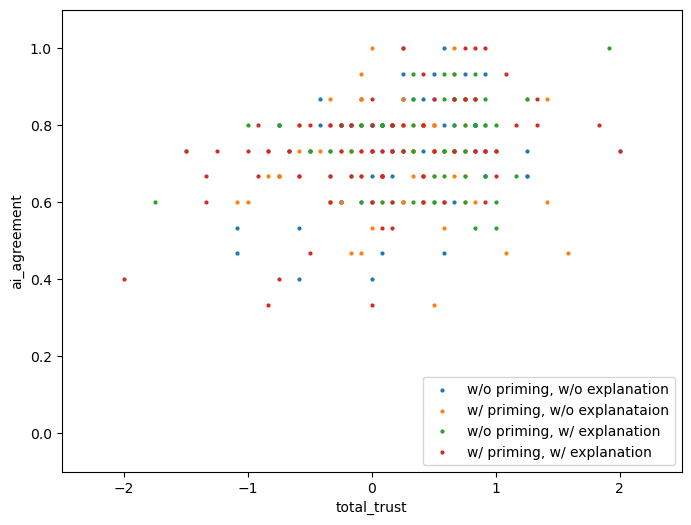

In [53]:
dfs = [results_wo_0, results_wo_1, results_w_0, results_w_1]
labels = ["w/o priming, w/o explanation", "w/ priming, w/o explanataion", 
          "w/o priming, w/ explanation", "w/ priming, w/ explanation"]
scatter("total_trust", "ai_agreement", dfs, labels, x_range = [-2.5,2.5])

w/o priming, w/o explanation 0.051079512849620465 0.6700227100673323
w/o priming, w/ explanation 0.2114652608817427 0.07050751066628114
w/ priming, w/o explanation -0.15748749237127763 0.16849803287495635
w/ priming, w/ explanation 0.033859683890445295 0.7745753617450305


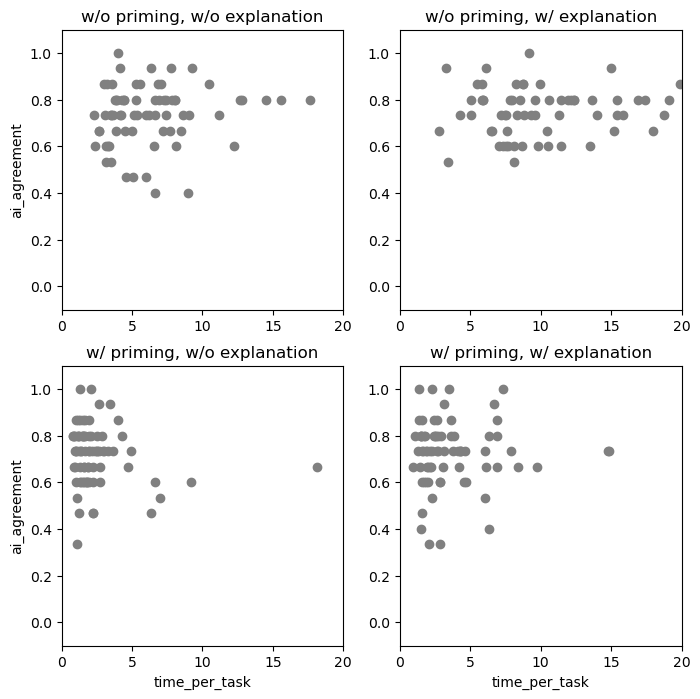

In [54]:
scatter_subplots("time_per_task", "ai_agreement", [[results_wo_0, results_w_0],[results_wo_1, results_w_1]], 
        [["w/o priming, w/o explanation", "w/o priming, w/ explanation"],
         ["w/ priming, w/o explanation", "w/ priming, w/ explanation"]],
        ncols = 2, nrows = 2, x_range = [0,20])

w/o priming, w/o explanation
0.051079512849620465 p = 0.6700227100673323
w/ priming, w/o explanataion
-0.15748749237127763 p = 0.16849803287495635
w/o priming, w/ explanation
0.2114652608817427 p = 0.07050751066628114
w/ priming, w/ explanation
0.033859683890445295 p = 0.7745753617450305


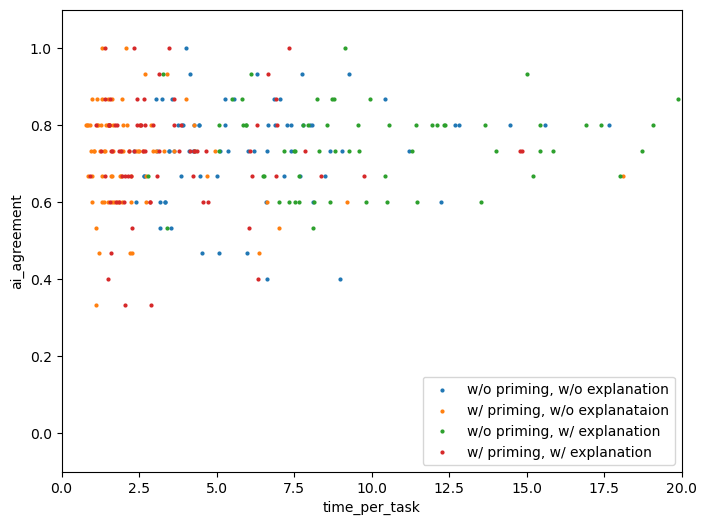

In [55]:
dfs = [results_wo_0, results_wo_1, results_w_0, results_w_1]
labels = ["w/o priming, w/o explanation", "w/ priming, w/o explanataion", 
          "w/o priming, w/ explanation", "w/ priming, w/ explanation"]
scatter("time_per_task", "ai_agreement", dfs, labels, x_range = [0,20])

w/o priming, w/o explanation
-0.05975154231968132 p = 0.6180745164877719
w/ priming, w/o explanataion
-0.1351754895628758 p = 0.2380050077340698
w/o priming, w/ explanation
0.15583840632054546 p = 0.18488392661662212
w/ priming, w/ explanation
0.009023737331061571 p = 0.9391763600058786


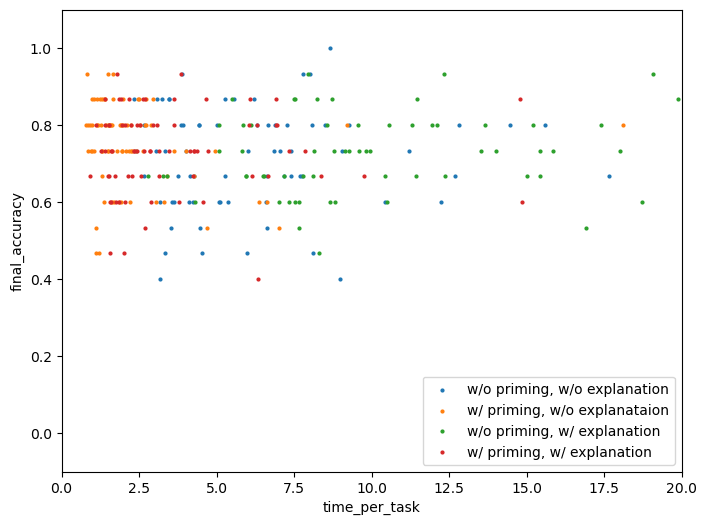

In [56]:
dfs = [results_wo_0, results_wo_1, results_w_0, results_w_1]
labels = ["w/o priming, w/o explanation", "w/ priming, w/o explanataion", 
          "w/o priming, w/ explanation", "w/ priming, w/ explanation"]
scatter("time_per_task", "final_accuracy", dfs, labels, x_range = [0,20])

In [57]:
print("Effect of time per task (average, all)")
print("on user-AI-agreement:", stats.pearsonr(results["time_per_task"], results["ai_agreement"]))
print("on accuracy:", stats.pearsonr(results["time_per_task"], results["final_accuracy"]))

print("\n Effect of time for first decision, group 0")
print("on user-AI-agreement:", stats.pearsonr(results_0["time_per_task_user"], results_0["ai_agreement"]))
print("on accuracy:", stats.pearsonr(results_0["time_per_task_user"], results_0["final_accuracy"]))

print("\n Effect of time for with-ai-decision, group 0")
print("on user-AI-agreement:", stats.pearsonr(results_0["time_per_task_final"], results_0["ai_agreement"]))
print("on accuracy:", stats.pearsonr(results_0["time_per_task_final"], results_0["final_accuracy"]))

Effect of time per task (average, all)
on user-AI-agreement: PearsonRResult(statistic=0.1287319754039687, pvalue=0.026271632076915064)
on accuracy: PearsonRResult(statistic=0.007048450446055395, pvalue=0.9035601439740715)

 Effect of time for first decision, group 0
on user-AI-agreement: PearsonRResult(statistic=0.007603434276254771, pvalue=0.927425637473499)
on accuracy: PearsonRResult(statistic=-0.11273567811463706, pvalue=0.17547976508837415)

 Effect of time for with-ai-decision, group 0
on user-AI-agreement: PearsonRResult(statistic=0.22865770738363358, pvalue=0.005503065847043742)
on accuracy: PearsonRResult(statistic=0.22837163386743808, pvalue=0.005563755663175162)


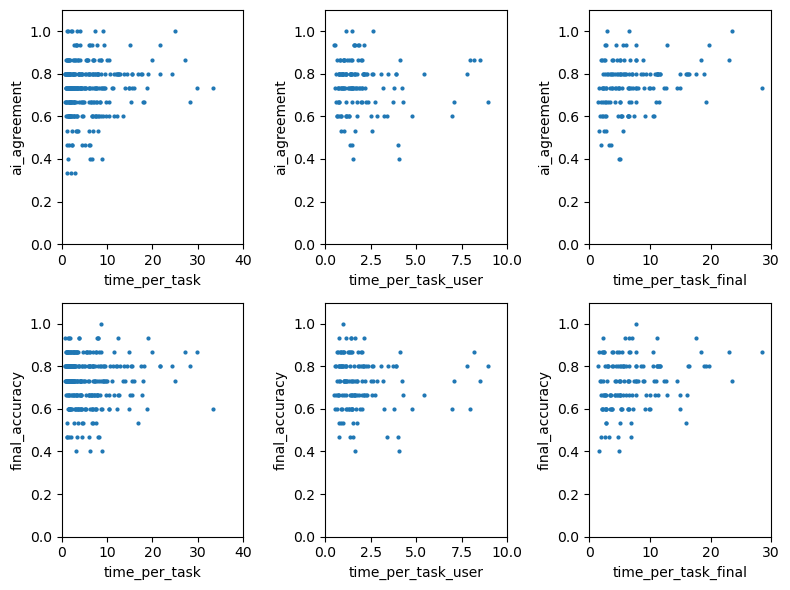

In [58]:
x_attributes = ["time_per_task", "time_per_task_user", "time_per_task_final"]
x_lims = [40, 10, 30]
y_attributes = ["ai_agreement", "final_accuracy"]
dfs = [results, results_0, results_0]
titles = [["Overtrust \n(based on switches)", "Undertrust \n(based on switches)"], 
          ["Overtrust \n(based on agreement with AI)", "Undertrust \n(based on agreement with AI)"]]

fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (8, 6))

for row in range(2):
    for col in range(3):
        
        df = dfs[col]
        data_y = df[y_attributes[row]]
        data_x = df[x_attributes[col]]
        
        axs[row, col].scatter(data_x, data_y, s = 4)
        axs[row, col].set_xlabel(x_attributes[col])
        axs[row, col].set_ylabel(y_attributes[row])
        axs[row, col].set_xlim(0, x_lims[col])
        axs[row, col].set_ylim(0, 1.1)
        #axs[row, col].set_title(titles[row][col])
        #axs[row, col].set_xticks([1, 2], labels=["w/o explanation", "w/ explanation"])

plt.tight_layout()
plt.show()

**Summary**:

There are a few important considerations for the correlation between reported trust and switch ratio/ai agreement:

- while switch ratio and ai agreement seem like continuous variables, they aren't really. E.g. for AI agreement: the possible values are [0, 1, ..., 15]/15, thus there are only 15 possible values. This seems more like an ordinal value, doesn't it? It's very visible in the picture. For non-continuous variables, Spearman's rank correlation shoul be used. I calculated both just to be sure, maybe we should ask someone what would be appropriate here.

- We're doing several comparisons here, so an alpha level of 0.05 might be too high. I believe since in total there are four subgroups it would make sense to divide by four and use 0.0125 as a cutoff if we're looking at all the individual groups. 

- For correlation, it might be more appropriate to look at the actual r value rather than only at whether or not p is significant. 1 is a strong correlation. Our values are always more around 0.2-0.3 if there is a correlation.

- There are some things that can lead to it looking like there is a correlation when that is not the case: one is outliers, the other is subgroups that behave differently (see here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079093/). This certainly seems to be the case. That would also explain why even though we calculate a significant correlation, on visual inspection the scatter plot looks rather more like a blob than a nice linear relationship (compare this to the plots for switch ratio to ai agreement, where there really does seem to be a linear correlation, as would be expected). 

What do we learn from this?
If we consider the spearman rank correlation, look at the r values and keep in mind the multiple comparisons:


- if there is a relation between reported trust and switch ratio, it is weak at best, and likely only is the case when participants get presented with an explanation. This seems reasonable: When presented with a convincing explanation, we might expect that participants a) are more inclined to switch and b) increase their trust, meaning that there would be a correlation here because both measures are directly influenced by a third factor: the convincing-ness of the explanation. Thus, I hypothesize that reported trust is only a good proxy when participants are presented with explanations that they find convincing. This would also indicate that it is likely that the form of the explanation (rather than just whether one is present) would also have an impact on whether or not reported trust is a good proxy for switch ratio. But since the relationship is still weak (look at the blob!), we can conclude that in general, it is not a good idea to try to conclude whether or not AI suggestions can change participants minds based on the participants stated trust.

- there seems to be slightly more of a realtion between reported trust and overall agreement with the ai suggestion. Still, when splitting the population apart, this relationship is only maintained for those who were presented with explanations, and out of those only for those who were presented with explanations directly (priming condition). This also does seem reasonable: if participants immediately see a reasoned suggestion that they find convincing, before thinking about it for themselves, this might very well increase how much they simply go with the ai suggestion as well as how much they feel that the ai is trustworthy and report trust in it. I propose that in this case also both measures are influenced by the presentation of the ai suggestion and the explanation. Again however the picture looks quite blobby: there are many participants who select the same option as the ai often but report negative trust, and many others who report good trust but agree with the ai barely more than half the time.


Conclusion: reported trust measures something (maybe how convincing the explanations/overall presentation looks?), but unless the presentation is just right, it likely does not measure how often participants will go with the ai suggestion or how willing they will be to change their minds based on the ai suggestion.

## Trust Comparisons 

We can also compare in more detail how the presence of explanation influences overtrust, undertrust, etc.:

In [61]:
dfs = [results_wo_0, results_w_0, results_wo_1, results_w_1]
labels = ["w/o priming, w/o explanation","w/o priming, w/ explanation", 
          "w/ priming, w/o explanation","w/ priming, w/ explanation"]
scatter("total_trust", "wt_ratio", dfs, labels, likert_x = True, likert_y = False)

TypeError: scatter() got an unexpected keyword argument 'likert_x'

In [ ]:
dfs = [results_wo_0, results_w_0, results_wo_1, results_w_1]
labels = ["w/o priming, w/o explanation","w/o priming, w/ explanation", 
          "w/ priming, w/o explanation","w/ priming, w/ explanation"]
scatter("total_trust", "ut_ratio", dfs, labels, likert_x = True, likert_y = False)

In [ ]:
dfs = [results_wo_0, results_w_0, results_wo_1, results_w_1]
labels = ["w/o priming, w/o explanation","w/o priming, w/ explanation", 
          "w/ priming, w/o explanation","w/ priming, w/ explanation"]
scatter("total_trust", "ot_ratio", dfs, labels, likert_x = True, likert_y = False)

In [ ]:
dfs = [results_wo_0, results_w_0, results_wo_1, results_w_1]
labels = ["w/o priming, w/o explanation","w/o priming, w/ explanation", 
          "w/ priming, w/o explanation","w/ priming, w/ explanation"]
scatter("ut_ratio", "ot_ratio", dfs, labels, likert_x = False, likert_y = False)

In [ ]:
dfs = [[results_wo_0, results_w_0], [results_wo_1, results_w_1]]
labels = [["w/o priming, w/o explanation","w/o priming, w/ explanation"], 
          ["w/ priming, w/o explanation","w/ priming, w/ explanation"]]
scatter_subplots("ut_ratio", "ot_ratio", dfs, labels, 2, 2, 
                     likert_x = False, likert_y = False)

In [60]:
# Only for group 0 do you actually know whether people switched their minds

def compare_0(column):
    
    print(column.upper())
    
    print(stats.ttest_ind(results_w_0[column], results_wo_0[column]))

    fig, ax = plt.subplots()
    VP = ax.boxplot([results_w_0[column], results_wo_0[column]], labels = ["w/ explanation", "w/o explanation"])
    ax.set_title(column)
    plt.show()
    
def compare_0_multiple(columns, labels, nrows, ncols):
    
    fig, axs = plt.subplots(ncols = ncols, nrows = nrows, figsize = (8, 4*nrows))
    if nrows == 1:
        axs = np.array([axs])
    for row in range(nrows):
        for col in range(ncols):
            c = columns[row][col]
            print(labels[row][col], c.upper())
            print(stats.ttest_ind(results_wo_0[c].dropna(), results_w_0[c].dropna()))
            axs[row, col].boxplot([results_wo_0[c].dropna(), results_w_0[c].dropna()])
            axs[row, col].set_title(labels[row][col])
            axs[row, col].set_xticks([1, 2], labels=["w/o explanation", "w/ explanation"])
    plt.show()
    
def compare_1_multiple(columns, labels, nrows, ncols):
    
    fig, axs = plt.subplots(ncols = ncols, nrows = nrows, figsize = (8, 4*nrows))
    if nrows == 1:
        axs = np.array([axs])
    for row in range(nrows):
        for col in range(ncols):
            c = columns[row][col]
            print(labels[row][col], c.upper())
            print(stats.ttest_ind(results_wo_1[c].dropna(), results_w_1[c].dropna()))
            axs[row, col].boxplot([results_wo_1[c].dropna(), results_w_1[c].dropna()])
            axs[row, col].set_title(labels[row][col])
            axs[row, col].set_xticks([1, 2], labels=["w/o explanation", "w/ explanation"])
    plt.show()

In [ ]:
compare_0_multiple([["n_wt", "n_wmt"], ["n_ot", "n_ut"]], 
                   [["Warranted Trust", "Warranted Mistrust"], ["Overtrust", "Undertrust"]], 
                   nrows = 2, ncols = 2)


In [ ]:
compare_0_multiple([["switch_ratio", "ai_agreement"]], 
                   [["switch_ratio", "ai_agreement"]], 
                   nrows = 1, ncols = 2)

In [ ]:
compare_0_multiple([["ot_ratio", "ut_ratio"]], 
                   [["Overtrust", "Undertrust"]], 
                   nrows = 1, ncols = 2)

In [ ]:
compare_1_multiple([["ot_ratio", "ut_ratio"]], 
                   [["Overtrust", "Undertrust"]], 
                   nrows = 1, ncols = 2)

In [ ]:
# And again for everybody

ncols = 2
nrows = 2

cols = ["ot_ratio", "ut_ratio"]
titles = [["Overtrust \n(based on switches)", "Undertrust \n(based on switches)"], 
          ["Overtrust \n(based on agreement with AI)", "Undertrust \n(based on agreement with AI)"]]

fig, axs = plt.subplots(ncols = ncols, nrows = nrows, figsize = (8, 8))

for row in range(2):
    for col in range(2):
        
        attribute = cols[col]
        if row == 0:
            data = [results_wo_0[attribute].dropna(), results_w_0[attribute].dropna()]
        else:
            data = [results_wo_1[attribute].dropna(), results_w_1[attribute].dropna()]
        
        axs[row, col].boxplot(data)
        axs[row, col].set_title(titles[row][col])
        axs[row, col].set_xticks([1, 2], labels=["w/o explanation", "w/ explanation"])

plt.tight_layout()
plt.show()

# Qualitative Data

In [42]:
AI_exp_wo_0 = {
    'wo_0_3.csv': ["ChatGPT","Social Media"],
    'wo_0_4.csv': ["Uni"],
    'wo_0_5.csv': ["ChatBots"],
    'wo_0_6.csv': ["ChatGPT","Daily"],
    'wo_0_7.csv': ["Work"],
    'wo_0_8.csv': ["ChatGPT"],
    'wo_0_9.csv': ["ChatGPT", "Photoshop AI"],
    'wo_0_11.csv': ["ChatBots"],
    'wo_0_13.csv': ["Whatsapp"],
    'wo_0_14.csv': ["ChatGPT","Image Generators"],
    'wo_0_15.csv': ["Uni"],
    'wo_0_17.csv': ["Internet"],
    'wo_0_18.csv': ["ChatGPT","Writing Emails"],
    'wo_0_19.csv': ["ChatGPT"],
    'wo_0_22.csv': ["ChatGPT","Literature"],
    'wo_0_24.csv': ["OpenAI", "Work","Personal"],
    'wo_0_25.csv': ["Online Course"],
    'wo_0_26.csv': ["Phone","Content Generation"],
    'wo_0_27.csv': ["Work"],
    'wo_0_33.csv': ["Uni"],
    'wo_0_38.csv': ["ChatGPT"],
    'wo_0_39.csv': ["ChatGPT","Daily"],
    'wo_0_40.csv': ["ChatGPT","PlaygroundAI"],
    'wo_0_41.csv': ["Research Tool"],
    'wo_0_42.csv': ["ChatGPT","Coding"],
    'wo_0_45.csv': ["BardAI","Stable Diffusion"],
    'wo_0_46.csv': ["Work"],
    'wo_0_49.csv': ["ChatGPT","Work"],
    'wo_0_50.csv': ["Uni","Unsupervised Learning"],
    'wo_0_53.csv': ["ChatGPT"],
    'wo_0_55.csv': ["ChatGPT","Internet"],
    'wo_0_56.csv': ["Assignment"],
    'wo_0_57.csv': ["Daily"],
    'wo_0_59.csv': ["ChatGPT"],
    'wo_0_60.csv': ["Research Tool"],
    'wo_0_64.csv': ["Media","Work"],
    'wo_0_65.csv': ["ChatBots","Service Robot"],
    'wo_0_66.csv': ["Internet"],
    'wo_0_67.csv': ["ChatGPT","Midjourney"],
    'wo_0_68.csv': ["Social Media","ChatGPT"],
    'wo_0_69.csv': ["ChatGPT","Work"],
    'wo_0_70.csv': ["Internet","Surveys"],
    'wo_0_71.csv': ["Banking App"],
    'wo_0_72.csv': ["Internet"],
    'wo_0_73.csv': ["ChatGPT","Image Generation"],
    'wo_0_74.csv': ["Social circle"],
    'wo_0_75.csv': ["Unsupervised Learning"],
    'wo_0_76.csv': ["ChatGPT","Work"],
    'wo_0_81.csv': ["ChatGPT","Content Generation"]
}

AI_exp_wo_1 = {
    'wo_1_0.csv': ["ChatGPT"],
    'wo_1_1.csv': ["Exploration","School"],
    'wo_1_2.csv': ["Social Media"],
    'wo_1_6.csv': ["Language Models","Uni"],
    'wo_1_7.csv': ["ChatGPT"],
    'wo_1_8.csv': ["Social Circle"],
    'wo_1_9.csv': ["Youtube"],
    'wo_1_10.csv': ["ChatGPT"],
    'wo_1_13.csv': ["ChatGPT"],
    'wo_1_14.csv': ["ChatGPT"],
    'wo_1_15.csv': ["ChatGPT"],
    'wo_1_17.csv': ["ChatGPT", "Image Generation", "ChatBots"],
    'wo_1_21.csv': ["Language Models", "ChatGPT"],
    'wo_1_22.csv': ["ChatGPT", "Copilot AI"],
    'wo_1_23.csv': ["ChatGPT"],
    'wo_1_25.csv': ["ChatGPT"],
    'wo_1_26.csv': ["ChatGPT"],
    'wo_1_27.csv': ["Uni"],
    'wo_1_28.csv': ["ChatGPT","LeonardoAI"],
    'wo_1_29.csv': ["ChatGPT"],
    'wo_1_30.csv': ["ChatGPT","Midjourney"],
    'wo_1_31.csv': ["ChatGPT","Google Bard","Regular"],
    'wo_1_32.csv': ["Videos about AI","AI Generated Videos"],
    'wo_1_33.csv': ["ChatGPT"],
    'wo_1_34.csv': ["ChatGPT"],
    'wo_1_35.csv': ["ChatGPT","Research Tool"],
    'wo_1_36.csv': ["Work"],
    'wo_1_39.csv': ["Internet"],
    'wo_1_40.csv': ["ChatGPT"],
    'wo_1_41.csv': ["ChatGPT"],
    'wo_1_42.csv': ["Image Generation","ChatGPT"],
    'wo_1_44.csv': ["ChatBots"],
    'wo_1_45.csv': ["ChatGPT"],
    'wo_1_47.csv': ["ChatGPT"],
    'wo_1_48.csv': ["ChatGPT"],
    'wo_1_50.csv': ["ChatGPT","Research Tool"],
    'wo_1_51.csv': ["Uni"],
    'wo_1_53.csv': ["Cortana","Siri","Alex","Google Assistant","Bing" "Microsoft Azure", "Photoshop AI"],
    'wo_1_54.csv': ["ChatGPT","DSS","Language Model"],
    'wo_1_55.csv': ["ChatGPT"],
    'wo_1_56.csv': ["Image Generation","ChatBots"],
    'wo_1_58.csv': ["Messaging App"],
    'wo_1_59.csv': ["Personal"],
    'wo_1_60.csv': ["Image and Video Editing"],
    'wo_1_61.csv': ["ChatGPT","Bing"],
    'wo_1_63.csv': ["Work"],
    'wo_1_64.csv': ["ChatGPT"],
    'wo_1_65.csv': ["Testing","Work"],
    'wo_1_66.csv': ["ChatGPT","Robot"],
    'wo_1_69.csv': ["ChatGPT"],
    'wo_1_70.csv': ["ChatGPT"],
    'wo_1_72.csv': ["ChatGPT","Bard"],
    'wo_1_73.csv': ["Organization"],
    'wo_1_76.csv': ["ChatGPT","Bing"],
    'wo_1_77.csv': ["ChatGPT","Bard","Image Generation"],
    'wo_1_79.csv': ["Research Tool","School","Work"],
    'wo_1_81.csv': ["ChatGPT","Image Generation"],
}

ai_exp_w_0 = {
    'w_0_0.csv': ["Google"],
    'w_0_1.csv': ["ChatGPT"],
    'w_0_3.csv': ["Work"],
    'w_0_6.csv': ["ChatGPT","Stable Diffusion"],
    'w_0_7.csv': ["Daily","Everywhere","Life"],
    'w_0_9.csv': ["Excel"],
    'w_0_10.csv': ["Work","Marketing"],
    'w_0_12.csv': ["Image Generation","Text generation","Uni","AI Generated news articles","Article summaries"],
    'w_0_13.csv': ["ChatBots","Image Generation"],
    'w_0_14.csv': ["ChatGPT"],
    'w_0_17.csv': ["Chatting","Research Tool"],
    'w_0_18.csv': ["Tech Store"],
    'w_0_20.csv': ["Search Engine","Social Media"],
    'w_0_23.csv': ["ChatGPT","Tortoise TTS"],
    'w_0_25.csv': ["Article"],
    'w_0_27.csv': ["Data analysis"],
    'w_0_28.csv': ["Hearsay"],
    'w_0_29.csv': ["Literature"],
    'w_0_32.csv': ["Work","Inspiration"],
    'w_0_33.csv': ["Videogames","Videos about AI","Youtube"],
    'w_0_34.csv': ["Image Generation"],
    'w_0_35.csv': ["ChatGPT","Bard","SEO"],
    'w_0_37.csv': ["ChatGPT","ChatBots","Customer Service Chatbots"],
    'w_0_38.csv': ["Assignment"],
    'w_0_39.csv': ["ChatGPT"],
    'w_0_41.csv': ["ChatGPT"],
    'w_0_42.csv': ["ChatGPT"],
    'w_0_44.csv': ["Virtual Platforms"],
    'w_0_45.csv': ["ChatBots"],
    'w_0_46.csv': ["ChatGPT","Spell/Grammar Check"],
    'w_0_47.csv': ["ChatGPT"],
    'w_0_50.csv': ["Every day"],
    'w_0_51.csv': ["Studying","Notetaking","Notion"],
    'w_0_54.csv': ["ChatGPT"],
    'w_0_56.csv': ["ChatGPT","Inspiration"],
    'w_0_58.csv': ["ChatGPT"],
    'w_0_59.csv': ["ChatGPT"],
    'w_0_61.csv': ["ChatGPT"],
    'w_0_62.csv': ["ChatBots"],
    'w_0_65.csv': ["ChatBots"],
    'w_0_66.csv': ["ChatGPT"],
    'w_0_68.csv': ["ChatGPT"],
    'w_0_69.csv': ["Varsity"],
    'w_0_70.csv': ["Work","ChatBots","ChatGPT"],
    'w_0_71.csv': ["Media"],
    'w_0_72.csv': ["Uni"],
    'w_0_73.csv': ["ChatBots","Voice Assistants"],
    'w_0_74.csv': ["Uni"],
    'w_0_75.csv': ["ChatGPT","Work","Uni"],
    'w_0_77.csv': ["OpenAI"],
    'w_0_78.csv': ["Videos made by AI","Youtube"]
}

ai_exp_w_1 = {
    'w_1_0.csv': ["Bixby","Content Recommendations", "Fraud Detection"],
    'w_1_2.csv': ["work","personal projects"],
    'w_1_3.csv': ["prolific", "school assignment"],
    'w_1_7.csv': ["ChatGPT"],
    'w_1_8.csv': ["ChatGPT","Vocal isolation"],
    'w_1_10.csv': ["ChatGPT"],
    'w_1_13.csv': ["Everywhere", "Smartphone Apps"],
    'w_1_14.csv': ["Work", "Surveys"],
    'w_1_15.csv': ["ChatGPT"],
    'w_1_16.csv': ["ChatGPT"],
    'w_1_17.csv': ["Workplace"],
    'w_1_19.csv': ["Assignments"],
    'w_1_20.csv': ["Websites","Literature"],
    'w_1_21.csv': ["ChatGPT"],
    'w_1_22.csv': ["Work"],
    'w_1_23.csv': ["ChatGPT"],
    'w_1_25.csv': ["ChatGPT"],
    'w_1_27.csv': ["Internet","Unsupervised Learning"],
    'w_1_31.csv': ["ChatGPT","Assignment"],
    'w_1_32.csv': ["ChatBots"],
    'w_1_33.csv': ["Internet","Social Media","Literature"],
    'w_1_36.csv': ["ChatGpt","Grammarly"],
    'w_1_37.csv': ["ChatGPT","Daily"],
    'w_1_39.csv': ["Work"],
    'w_1_40.csv': ["ChatGPT"],
    'w_1_41.csv': ["Assignment"],
    'w_1_42.csv': ["Internet"],
    'w_1_43.csv': ["Uni"],
    'w_1_45.csv': ["ChatGPT"],
    'w_1_46.csv': ["Social Circle"],
    'w_1_47.csv': ["ChatGPT"],
    'w_1_49.csv': ["Online Sources"],
    'w_1_50.csv': ["ChatGPT","DeepFake","Voice-based solutions"],
    'w_1_51.csv': ["ChatGPT"],
    'w_1_52.csv': ["Surveys","AI written text"],
    'w_1_55.csv': ["Image Generators"],
    'w_1_56.csv': ["ChatGPT"],
    'w_1_57.csv': ["Podcasts","AI Tools"],
    'w_1_59.csv': ["Surveys"],
    'w_1_60.csv': ["Work","Surveys"],
    'w_1_61.csv': ["Internet"],
    'w_1_63.csv': ["ChatGPT","Content generation", "Micro-Tasking"],
    'w_1_65.csv': ["ChatGPT"],
    'w_1_66.csv': ["OpenAI"],
    'w_1_67.csv': ["ChatBots","Uni"],
    'w_1_69.csv': ["Hearsay"],
    'w_1_71.csv': ["CodeWriting","Grammar Check"],
    'w_1_73.csv': ["Casual","Work"],
    'w_1_74.csv': ["ChatGPT"],
    'w_1_76.csv': ["ChatGPT"],
    'w_1_77.csv': ["Medical Image Diagnostics"],
}

In [41]:
for i,v in results["AI_knowledge"].items():
    print('',i, '- ', v)

 wo_0_0 -  ['NO', '']
 wo_0_1 -  ['NO', '']
 wo_0_3 -  ['YES', 'Through ChatGPT', ' as well as discussions on Reddit']
 wo_0_4 -  ['YES', 'I am in a master of artificial inteligence engeenering']
 wo_0_5 -  ['YES', 'I come into contact with ai in chat bots']
 wo_0_6 -  ['YES', 'through daily usage of chatgpt']
 wo_0_7 -  ['YES', 'I rely on some artificial intelligences to facilitate part of my work but always auditing the results.']
 wo_0_8 -  ['YES', 'I have used chat GPT']
 wo_0_9 -  ['YES', 'I have used chat gpt and photoshop ai']
 wo_0_10 -  ['NO', '']
 wo_0_11 -  ['YES', 'chatting mostly']
 wo_0_12 -  ['NO', '']
 wo_0_13 -  ['YES', 'Well', ' theres one on my whatsapp.']
 wo_0_14 -  ['YES', 'ChatGPT', ' more than one Ai images generators.']
 wo_0_15 -  ['YES', "I'm studying Data Science and I took a course regarding AI"]
 wo_0_16 -  ['NO', '']
 wo_0_17 -  ['YES', 'Internet']
 wo_0_18 -  ['YES', 'I have used ChatGPT for writing emails']
 wo_0_19 -  ['YES', 'Mostly with CHAT GPT']
 w

In [ ]:


# Useless answers wo
# wo_0_30, wo_0_61 -> Yes + No
# wo_1_67, w_0_16, w_0_49, w_1_1, w_1_9, w_1_68 -> Yes + Yes
# wo_0_35, wo_0_47 -> Yes + No elaboration
# wo_1_5 -> Yes + probably
# wo_0_51 -> STatement about perceived bias of the study AI
# wo_1_38 -> ['NO', '13'] ?????

In [ ]:
# Categories
# Context AI Was encountered in
# Specific tool
# General category of tool
# Specific purpose AI is used for
# Frequency of Use

Frequency of use
	"Daily"
	"Regular"

Specific Tool
	"ChatGpt"/"OpenAI"
	"Photoshop AI"
	"Playground AI"
	"Bard AI"
	"Stable Diffusion"
	"Midjourney"
	"Copilot AI"
	"Cortana"
	"Siri"
	"Alex"
	"Google Assistant"
	"Bing"
	"Microsoft Azure"
	"Google"
	"Tortoise TTS"
 
Category of Tool
	"ChatBots"
	"Voice Assistant"
	"Image Generation"
	"Service Robot"/"Robot"
	"DSS" -> Decision Support Systems
	"Excel analysis"
	"Language Models"/"LLM"
 
Task AI is used for/Specific purpose
	"Writing Emails"
	"Content Generation"/"Text generation"
	"Coding"
	"Assignment"/"Homework"
	"Research Tool"
	"Image and Video Editing"
	"Testing"
	"Chatting"
	"Data analysis"
	"Inspiration"
	"Spell/Grammar check"
	"Studying"
	"Notetaking"
	"Medical Image Diagnostics"
 
Context
	"Social Media"
		Reddit
		Youtube
	"Uni/Academia/School"
	"Online Course"
	"Podcasts"
	"Unsupervised Learning"
	"Messaging App"
	"Internet"
	"Media"
	"Literature/Articles"
	"Work"
	"Personal"
	"Phone"
	"Videos about AI"
	"AI Generated Videos"
	"Surveys"
	"Social Circle"
	"Exploration"
	"Everywhere"
	"Life"
	"Tech store"
	"Search engines"
	"Hearsay"
	"Youtube"
	"Videogames"
	"Smartphone Apps"
    "Banking App"
	
Honorable mentions: wo_0_7 -> Auditing results

In [113]:
# Maximum of same answers in a row

def read_file(participant):
    
    filename = participant.replace("w_", "w/").replace("wo_", "wo/")
    filename = "explanations_" + filename + ".csv"

    with open(filename) as file:
        lines = file.readlines()
    return lines

In [114]:
from itertools import groupby

likert_max = []
for user in results.index:
    file_content = read_file(user)[18:]
    likert_numbers = [likert_calc[x.split(',')[1].strip()] for x in file_content]
    max_number = max([(sum(1 for i in g)) for _, g in groupby(likert_numbers)])
    likert_max.append(max_number)
results['likert_max'] = likert_max

In [115]:
results['likert_max']

wo_0_0    3
wo_0_1    3
wo_0_3    2
wo_0_4    2
wo_0_5    2
         ..
w_1_74    6
w_1_75    3
w_1_76    2
w_1_77    2
w_1_79    3
Name: likert_max, Length: 298, dtype: int64

In [121]:
df.loc[results['likert_max'] >=8]

,file,explanation_group,priming_group,participant_number,final_accuracy,ai_agreement,n_na,n_wt,n_wmt,n_ut,...,wt_ratio,total_trust,fai,com,rel,time_per_task,time_per_task_user,time_per_task_final,time_per_task_median,grad_ratio
wo_0_6,explanations_wo/0_6.csv,wo,0,6,0.866667,0.733333,11,0,3,1,...,0.000000,2.000000,2.0,2.00,2.000000,3.089640,0.870383,2.219257,2.704810,0.866667
wo_0_24,explanations_wo/0_24.csv,wo,0,24,0.666667,0.800000,10,2,1,2,...,0.500000,0.833333,0.6,1.00,1.000000,3.772313,1.127703,2.644611,2.436883,0.666667
wo_0_61,explanations_wo/0_61.csv,wo,0,61,0.800000,0.800000,11,0,2,1,...,0.000000,0.000000,0.0,0.00,0.000000,15.607393,3.859308,11.748084,7.866779,0.533333
w_0_10,explanations_w/0_10.csv,w,0,10,0.800000,0.800000,10,2,2,1,...,0.666667,0.916667,0.8,1.00,1.000000,5.063197,1.138296,3.924901,3.290438,0.666667
w_0_15,explanations_w/0_15.csv,w,0,15,0.800000,0.800000,8,3,2,1,...,0.750000,0.833333,0.6,1.00,1.000000,12.127473,0.876746,11.250727,8.855679,0.800000
w_0_31,explanations_w/0_31.csv,w,0,31,0.733333,0.733333,9,2,2,2,...,0.500000,0.583333,0.6,0.50,0.666667,9.608446,1.602764,8.005682,7.445951,0.733333
w_0_32,explanations_w/0_32.csv,w,0,32,0.866667,0.733333,11,0,3,1,...,0.000000,1.000000,0.6,1.25,1.333333,7.482945,2.012736,5.470210,5.620231,0.733333
w_0_58,explanations_w/0_58.csv,w,0,58,0.600000,0.600000,9,0,2,4,...,0.000000,-1.750000,-2.0,-2.00,-1.000000,10.510132,1.296029,9.214103,6.659668,0.733333
w_0_62,explanations_w/0_62.csv,w,0,62,0.733333,0.600000,9,0,3,3,...,0.000000,1.000000,1.0,1.00,1.000000,9.826831,2.520172,7.306659,5.397407,0.600000
w_0_74,explanations_w/0_74.csv,w,0,74,0.666667,0.666667,9,1,2,3,...,0.250000,1.166667,1.4,1.00,1.000000,2.789783,0.573354,2.216429,1.955503,0.533333
